In [1]:
# import packages
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statistics
import warnings
from pandas.core.common import SettingWithCopyWarning

# COVID Data

In [2]:
# read in covid death data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
stateTimeSeries = pd.read_csv(url, error_bad_lines=False)
stateTimeSeries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,55,55,55,61,61,62,62,62,65,67
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,182,183,184,188,188,189,189,189,216,217
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,36,36,36,36,37,38,38,38,40,40
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,47,47,47,48,48,48,48,48,51,51
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,83,83,83,86,86,86,86,86,94,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,4,5,5,5,5,5,5,5,6,6
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,9,10,10,10,12,12,12,12,12,12
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,23,24,24,24,25,25,25,25,25,25


In [3]:
# read in covid cases
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
stateTimeCases = pd.read_csv(url, error_bad_lines=False)
stateTimeCases

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,5198,5227,5257,5270,5327,5358,5376,5407,5440,5499
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,16346,16513,16653,16798,16981,17128,17256,17333,17496,17629
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1730,1738,1760,1778,1793,1805,1827,1834,1882,1898
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,2162,2170,2188,2198,2212,2223,2223,2229,2247,2261
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,5308,5320,5376,5411,5439,5462,5473,5485,5517,5568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,2753,2769,2788,2847,2870,2870,2931,2981,2993,3020
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,1833,1843,1852,1874,1887,1887,1900,1913,1925,1948
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,844,846,846,848,853,853,858,861,863,864


In [4]:
# determination of first death and first case
state = "Colorado"
# caseData variable holds an array of timeseries data starting 1/22/2020
# this essentially adds up all of the rows from the state of Colorado to get the aggregate number of cases
caseData = stateTimeCases.loc[stateTimeCases['Province_State'] == state].sum()['1/22/20':].values.astype(int)
# deathData variable holds an array of death data starting 1/22/2020
# this adds up all of the rows from the state of CO to get the aggregate number of deaths
deathData = stateTimeSeries.loc[stateTimeSeries['Province_State'] == state].sum()['1/22/20':'9/10/20'].values.astype(int)
firstCase = 0
firstDeath = 0
for ind, case in enumerate(caseData):
    if case > 0:
        firstCase = ind + 1
        break

for ind, death in enumerate(deathData):
    if death > 0:
        firstDeath = ind + 1
        break

In [5]:
# COVID Data
numCounty = 64
deathData = stateTimeSeries.loc[stateTimeSeries['Province_State'] == state]
deathData = deathData.sort_values(by=['FIPS'])
labelsData = deathData[['FIPS', 'Admin2']][:-2]
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
deathData['FIPS'] = deathData['FIPS'].astype(int)
# gets fips columns and then the days of deaths
countyTime = deathData.iloc[:, [4] + list (range(12, len(deathData.columns)))][:-2]
# gets total number of deaths
covidCounty = countyTime['9/10/20'].values.astype(int)
# covidCounty = countyTime.iloc[:, -1].values.astype(int)
# Dictionary of the county names and FIPS
labelsDict = dict()
for ind, row in labelsData.iterrows():
    labelsDict [int(row['FIPS'])] = row['Admin2']
# county labels ordered by FIPS
labels = list(labelsDict.values())

In [6]:
# Column index for the start of each month
febInt = countyTime.columns.get_loc('2/1/20')
marInt = countyTime.columns.get_loc('3/1/20')
aprInt = countyTime.columns.get_loc('4/1/20')
mayInt = countyTime.columns.get_loc('5/1/20')
juneInt = countyTime.columns.get_loc('6/1/20')
julyInt = countyTime.columns.get_loc('7/1/20')
augInt = countyTime.columns.get_loc('8/1/20')
sepInt = countyTime.columns.get_loc('9/1/20')
aprEndInt = countyTime.columns.get_loc('4/6/20')
finalInt = countyTime.columns.get_loc('9/10/20')

# COVID Deaths for each county during each month from Feb to August
febCountyTime = countyTime.iloc[:, [febInt] + list (range(febInt + 1, marInt))]
febCOVID = febCountyTime.iloc[:, -1].values.astype(int) - febCountyTime.iloc[:, 0].values.astype(int)
marCountyTime = countyTime.iloc[:, [marInt] + list (range(marInt + 1, aprInt))]
marCOVID = marCountyTime.iloc[:, -1].values.astype(int) - marCountyTime.iloc[:, 0].values.astype(int)
aprCountyTime = countyTime.iloc[:, [aprInt] + list (range(aprInt + 1, mayInt))]
aprCOVID = aprCountyTime.iloc[:, -1].values.astype(int) - aprCountyTime.iloc[:, 0].values.astype(int)
mayCountyTime = countyTime.iloc[:, [mayInt] + list (range(mayInt + 1, juneInt))]
mayCOVID = mayCountyTime.iloc[:, -1].values.astype(int) - mayCountyTime.iloc[:, 0].values.astype(int)
juneCountyTime = countyTime.iloc[:, [juneInt] + list (range(juneInt + 1, julyInt))]
juneCOVID = juneCountyTime.iloc[:, -1].values.astype(int) - juneCountyTime.iloc[:, 0].values.astype(int)
julyCountyTime = countyTime.iloc[:, [julyInt] + list (range(julyInt + 1, finalInt))]
julyCOVID = julyCountyTime.iloc[:, -1].values.astype(int) - julyCountyTime.iloc[:, 0].values.astype(int)
augCountyTime = countyTime.iloc[:, [augInt] + list (range(augInt + 1, sepInt))]
augCOVID = augCountyTime.iloc[:, -1].values.astype(int) - augCountyTime.iloc[:, 0].values.astype(int)
aprEndTime = countyTime.iloc[:, [aprEndInt] + list (range(aprEndInt + 1, finalInt))]
aprEndCOVID = aprEndTime.iloc[:, -1].values.astype(int) - aprEndTime.iloc[:, 0].values.astype(int)

# COVID Deaths each week from Feb 1st to Sept 10th
weeklyCountyTime = countyTime.iloc[:, [febInt] + list (range(febInt + 1, finalInt))]
weeklyCOVID = []
for i in range(len(weeklyCountyTime.columns)): 
    if i == 0:
        weeklyCOVID.append(np.zeros(64))
    elif i % 7 == 0:
        weeklyCOVID.append(weeklyCountyTime.iloc[:, i].values.astype(int) - sum(weeklyCOVID))
weeklyCOVID = weeklyCOVID [1:]

In [7]:
# NYT COVID cases used as a comparison to Johns Hopkins data (missing 8061)
URL_County = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
county = pd.read_csv(URL_County, error_bad_lines=False)
indexState = county['state']
indexState = indexState.values.astype(str)
indexState = indexState == 'Colorado'
countyState = county.iloc[indexState, :]
countyState['fips'] = countyState['fips'].astype(float)
countyState = countyState.loc[countyState['date'] == '2020-09-10']
countyState = countyState.sort_values(by=['fips'])
covidCountyNYT = countyState['deaths'].values.astype(int)

In [8]:
# There is no signficant difference in overall COVID cases between JHU except the NYT is missing one county in 
# Colorado up until 9/10/20
missing = [8061]
crudeDict = dict()
for ind, item in enumerate (covidCounty):
    crudeDict [list(labelsDict.keys())[ind]] = item
for item in missing:
    crudeDict.pop(item)
JHUNYT = np.array(list(crudeDict.values()))
print (covidCountyNYT - JHUNYT)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
# USA Facts Comparison shows that COVID Deaths are the same in JHU and USA Facts
path = 'csv_data/covid_deaths_usafacts.csv'
USAFacts = pd.read_csv(path, error_bad_lines=False)
USAFacts = USAFacts.loc[USAFacts['State'] == 'CO'][1:]
USAFacts = USAFacts['9/10/20'].values.astype(int)
USAFacts - covidCounty

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
# Compares JHU COVID deaths to COVID deaths as reported by Colorado DOH
path = 'csv_data/co_deaths_daysum_20 2.csv'
raw = pd.read_csv(path, error_bad_lines=False)
raw = raw.loc[raw['sexgr'] == 'Total - Both Sexes']
raw = raw.loc[raw['agegr'] == 'All Ages']
raw = raw[raw.dday != 'Annual total']
covid2020 = raw.groupby('fips')['covid'].sum().values.astype(int)[1:]
dictDifference = dict(zip(labels, covid2020-covidCounty))
Struct= pd.DataFrame.from_dict(dictDifference, orient='index', columns = ['Difference Between JHU and DOH Data'])
writer = pd.ExcelWriter('Colorado_COVID_Compare.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Struct.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# All-Cause Excess Deaths Calculation

In [11]:
# 2020 deaths per county
# 66 is the first case (March 5th), 96 is first positive value (April 6), 122 is the start of May, 153 is the start of
# June, 183 is the start of july, 214 is the start of August, 253 is September 10th and the final day that we 
# have reliable data

# read in daily data data and add rows to the dataframe to ensure all counties are included even if they have 0 deaths
path = 'csv_data/co_deaths_daysum_20 2.csv'
raw = pd.read_csv(path, error_bad_lines=False)
for i in list(labelsDict.keys()) + [8000]:
    raw = raw.append({'fips': i, 'year':'2020', 'dday': 500, 'sexgr': 'Total - Both Sexes', 'racegr': 'All races', 
                 'hispgr': 'All ethnicities', 'agegr': 'All Ages', 'd': 0, 'mva': 0, 'wrk': 0, 'uod': 0, 'sui': 0,
                 'hom': 0, 'flu': 0, 'pne': 0, 'covid': 0, 'can': 0, 'hd': 0, 'cvd': 0, 'copd': 0, 'diab': 0, 
                 'alz': 0}, ignore_index=True)
    
# All mortality for both sexes, all ages, races, and ethnicities
raw = raw.loc[raw['sexgr'] == 'Total - Both Sexes']
raw = raw.loc[raw['agegr'] == 'All Ages']
raw = raw.loc[raw['racegr'] == 'All races']
raw = raw.loc[raw['hispgr'] == 'All ethnicities']

# Gets rid of total data (we want the data by day)
raw2 = raw[raw.dday != 'Annual total']
# Converts all relevant data to int
raw2['dday'] = raw2['dday'].astype(int)
raw2['d'] = raw2['d'].astype(int)
# data is not reliable after the 253rd day up to the 10th of September
raw2 = raw2[raw2['dday'].isin(list(range(32, 253)) + [500])] 
febRaw = raw2[raw2['dday'].isin(list(range(32, 61))+ [500])]
marRaw = raw2[raw2['dday'].isin(list(range(61, 92))+ [500])]
aprRaw = raw2[raw2['dday'].isin(list(range(92, 122))+ [500])]
mayRaw = raw2[raw2['dday'].isin(list(range(122, 153))+ [500])]
juneRaw = raw2[raw2['dday'].isin(list(range(153, 183))+ [500])]
julyRaw = raw2[raw2['dday'].isin(list(range(183, 214))+ [500])]
augRaw = raw2[raw2['dday'].isin(list(range(214, 245))+ [500])]
# Takes data from the first case
marAprRaw = raw2[raw2['dday'].isin(list(range(66, 253))+ [500])]
# Takes data after excess deaths exceed total COVID deaths in the week
positiveRaw = raw2[raw2['dday'].isin(list(range(96, 253))+ [500])]

# Sums the deaths over the entire range
death2020 = raw2.groupby('fips')['d'].sum().values.astype(int)[1:]
marApr2020 = marAprRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
feb2020 = febRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
mar2020 = marRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
apr2020 = aprRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
may2020 = mayRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
june2020 = juneRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
july2020 = julyRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
aug2020 = augRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
positive2020 = positiveRaw.groupby('fips')['d'].sum().values.astype(int)[1:]

# Calculates weekly deaths up until September 6th
weekDeath2020 = np.zeros ((numCounty, 31))
weekCOVID2020 = np.zeros ((numCounty, 31))
for i in range (31):
    marAprRaw2 = raw2[raw2['dday'].isin(list(range((32 + (i*7)), (32 + ((i+1)*7))))+ [500])]
    weekDeath = marAprRaw2.groupby('fips')['d'].sum().values.astype(int)[1:]
    weekCOVID = marAprRaw2.groupby('fips')['covid'].sum().values.astype(int)[1:]
    weekDeath2020 [:, i] = weekDeath
    weekCOVID2020 [:, i] = weekCOVID

In [12]:
# 2015-2019 deaths
# initialize baseline values for each time range
baseline = np.zeros(numCounty)
baselineMarApr = np.zeros(numCounty)
baselineFeb = np.zeros (numCounty)
baselineMar = np.zeros(numCounty)
baselineApr = np.zeros(numCounty)
baselineMay = np.zeros(numCounty)
baselineJune = np.zeros(numCounty)
baselineJuly = np.zeros(numCounty)
baselineAug = np.zeros(numCounty)
baselinePositive = np.zeros(numCounty)
baselineWeek = np.zeros((numCounty, 31))

# Stores the deaths for each county in the year
overallDeath = []
overallDeathMarApr = []
overallDeathPos = []
years = ['15', '16', '17', '18', '19']

# Sums up deaths from each year to calculate the average deaths
for year in years:
    # takes each years csv files
    path = 'csv_data/co_deaths_daysum_' + year + '.csv'
    raw = pd.read_csv(path, error_bad_lines=False)
    # All mortality for both sexes and all ages (no race/ethnicity designation as in the 2020 data)
    raw = raw.loc[raw['sexgr'] == 'Total - Both Sexes']
    raw = raw.loc[raw['agegr'] == 'All Ages']
    raw2 = raw[raw.dday != 'Annual total']
    raw2['dday'] = raw2['dday'].astype(int)
    # data is not reliable after the 253rd day up to the 10th of September
    raw2 = raw2[raw2['dday'].isin(list(range(32, 253)))]
    
    # Same time frames as in 2020
    marAprRaw = raw2[raw2['dday'].isin(list(range(66, 253)))]
    positiveRaw = raw2[raw2['dday'].isin(list(range(96, 253)))]
    febRaw = raw2[raw2['dday'].isin(list(range(32, 61)))]
    marRaw = raw2[raw2['dday'].isin(list(range(61, 92)))]
    aprRaw = raw2[raw2['dday'].isin(list(range(92, 122)))]
    mayRaw = raw2[raw2['dday'].isin(list(range(122, 153)))]
    juneRaw = raw2[raw2['dday'].isin(list(range(153, 184)))]
    julyRaw = raw2[raw2['dday'].isin(list(range(184, 214)))]
    augRaw = raw2[raw2['dday'].isin(list(range(214, 245)))]
    
    # Sums the deaths over the entire range
    countyDeath = raw2.groupby('fips')['d'].sum().values.astype(int)[1:]
    marAprDeath = marAprRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
    febDeath = febRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
    marDeath = marRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
    aprDeath = aprRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
    mayDeath = mayRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
    juneDeath = juneRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
    julyDeath = julyRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
    augDeath = augRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
    positiveDeath = positiveRaw.groupby('fips')['d'].sum().values.astype(int)[1:]
    
    # Stores the deaths for each county in the year
    overallDeath.append(countyDeath)
    overallDeathMarApr.append(marAprDeath)
    overallDeathPos.append(positiveDeath)
    
    # Calculates weekly deaths up until September 6th
    weekDeathCounty = np.zeros ((numCounty, 31))
    for i in range (31):
        marAprRaw2 = raw2[raw2['dday'].isin(list(range((32 + (i*7)), (32 + ((i+1)*7)))))]
        weekDeath = marAprRaw2.groupby('fips')['d'].sum().values.astype(int)[1:]
        weekDeathCounty [:, i] = weekDeath
    
    # Accumulates deaths for the year for eventual mean calculation
    baseline += countyDeath
    baselineMarApr += marAprDeath
    baselineWeek += weekDeathCounty
    baselineFeb += febDeath
    baselineMar += marDeath
    baselineApr += aprDeath
    baselineMay += mayDeath
    baselineJune += juneDeath
    baselineJuly += julyDeath
    baselineAug += augDeath
    baselinePositive += positiveDeath
    
# Averages over the 5 years
baseline /= len(years)
baselineMarApr /= len(years)
baselineWeek /= len(years)
baselineFeb /= len(years)
baselineMar /= len(years)
baselineApr /= len(years)
baselineMay /= len(years)
baselineJune /= len(years)
baselineJuly /= len(years)
baselineAug /= len(years)
baselinePositive /= len(years)

# Adds 2020 deaths at the end to preserve year order
overallDeath.append(death2020)
overallDeathMarApr.append(marApr2020)
overallDeathPos.append(positive2020)

/Users/JayChandra/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# Population per 100,000 persons for each county for 2014-2019 and 2017
numCounty = 64
numYears = 6
path = 'csv_data/CountyRankings.xls'
popDf = pd.read_excel(path, index_col = None)
popDf = popDf.iloc[:, 6:12]
# 2017
pop = popDf['July 2017'].values.astype(float) / 100000.
# 2014-2019
popArr = np.zeros((numYears, numCounty))
yearN = list(popDf.columns)
for i, year in enumerate(yearN):
    popArr[i, :] = popDf[year].values.astype(float)
popArr = popArr / 100000.

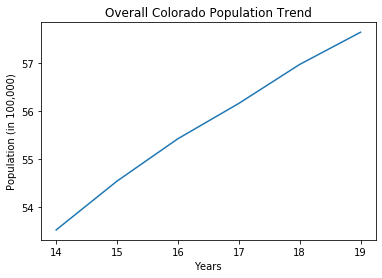

In [14]:
# Plot of population in Colorado (Rising)
allYears = ['14', '15', '16', '17', '18', '19']
plt.xlabel("Years")
plt.ylabel("Population (in 100,000)")  
plt.title("Overall Colorado Population Trend")
plt.plot(allYears, np.sum(popArr, axis = 1))
plt.show()

In [15]:
# Population Normalized deaths in each year for each county
overallDeath2017 = overallDeath/pop
overallDeathYears = overallDeath/popArr
overallDeathMarAprYears = overallDeathMarApr/popArr
overallDeathPosYears = overallDeathPos/popArr

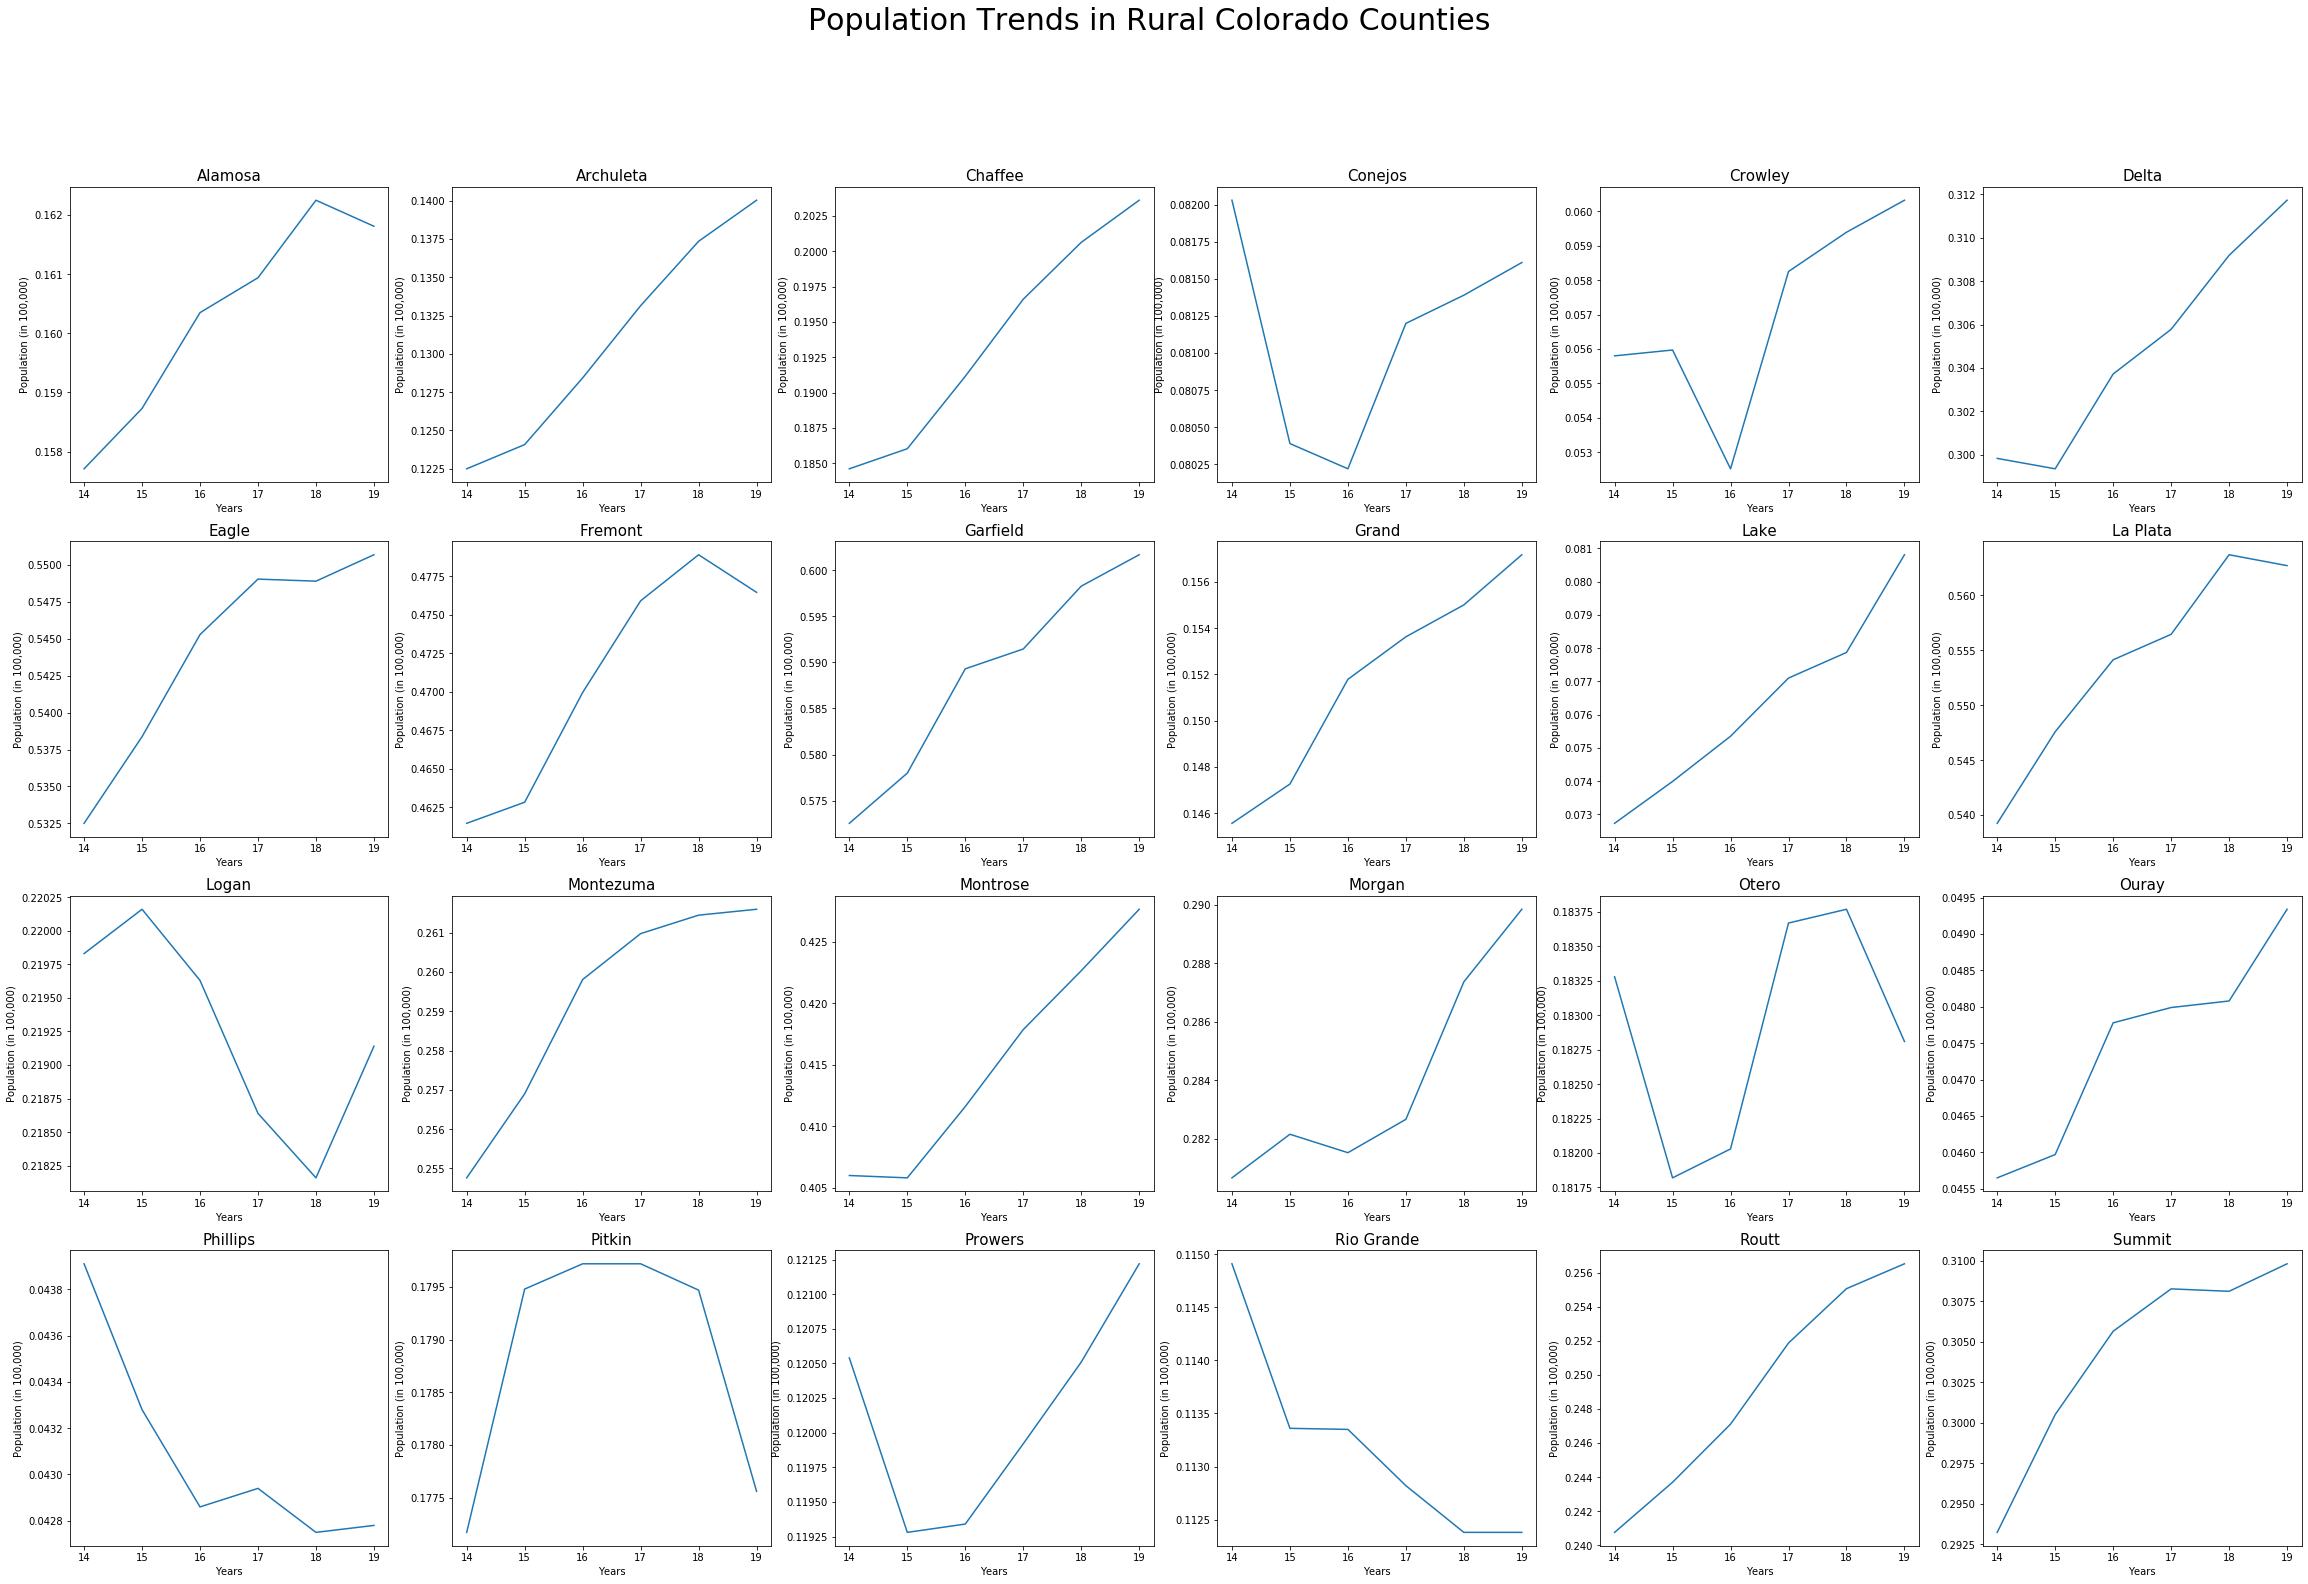

In [16]:
# http://coruralhealth.wpengine.netdna-cdn.com/wp-content/uploads/2013/10/2018-map.pdf
# urban, rural, and frontier classifications are based on the above link
urban = ['Larimer', 'Weld', 'Broomfield', 'Boulder', 'Adams','Denver', 'Jefferson', 'Gilpin', 'Clear Creek', 
        'Arapahoe', 'Elbert', 'Douglas', 'Park', 'Teller', 'El Paso', 'Pueblo', 'Mesa']

rural = ['Routt', 'Grand', 'Morgan', 'Logan', 'Phillips', 'Garfield', 'Eagle', 'Summit', 'Pitkin', 'Lake', 'Delta', 
         'Chaffee', 'Fremont', 'Crowley', 'Montrose', 'Ouray', 'Otero', 'Prowers', 'Montezuma', 'La Plata',
        'Archuleta', 'Conejos', 'Rio Grande', 'Alamosa']

# Plots Population in Colorado for either Urban, Rural or Frontier Counties
urbanLog = [label in urban for label in labels]
ruralLog = [label in rural for label in labels]
urban2 = urban.copy()
urban2.extend(rural)
frontLog = [label not in urban2 for label in labels]
fig, ax = plt.subplots(nrows = 4, ncols = 6, figsize = (40, 25))
index = 0
for row in ax:
    for col in row:
        # replace "ruralLog" with "frontLog" or "urbanLog" for different counties
        col.plot(allYears, popArr.T[ruralLog][index, :])
        col.set_title([i for indx,i in enumerate(labels) if ruralLog[indx] == True][index], fontsize = 15)
        col.set(xlabel="Years", ylabel='Population (in 100,000)')
        index += 1
fig.suptitle("Population Trends in Rural Colorado Counties", fontsize = 30)
plt.savefig('Population Trends.png')
plt.show(fig)

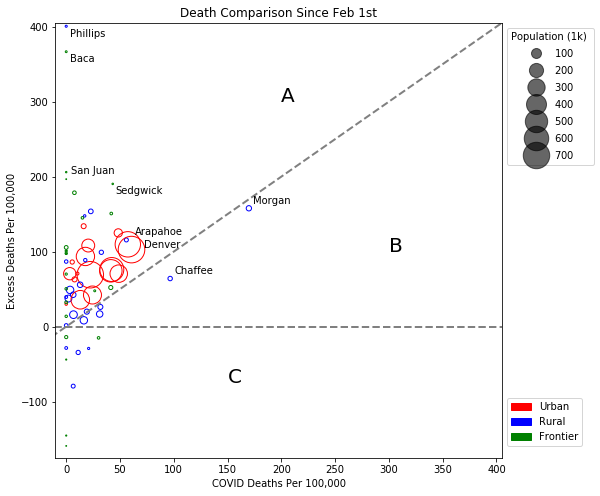

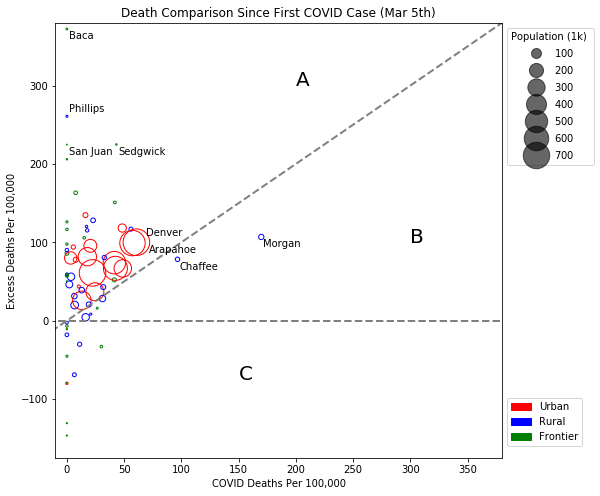

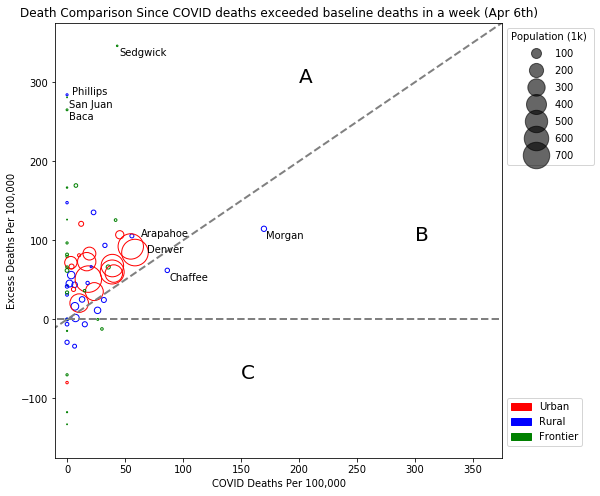

In [17]:
# Excess Deaths Calculations
excessDeaths = (death2020-baseline).astype(float)
excessDeaths2 = (death2020-baseline-covidCounty).astype(float)
excessDeathsPop = excessDeaths / pop
excessDeathsPop2 = excessDeaths2 / pop
covidCountyPop = covidCounty/pop
excessDeathsMarApr = (marApr2020-baselineMarApr).astype(float)
excessDeathsPopMarApr = excessDeathsMarApr / pop
excessDeathsPos = (positive2020-baselinePositive).astype(float)
excessDeathsPosPop = excessDeathsPos / pop

# Normalized COVID Time Series Deaths
febCOVIDPop = febCOVID / pop
marCOVIDPop = marCOVID / pop
aprCOVIDPop = aprCOVID / pop
mayCOVIDPop = mayCOVID / pop
juneCOVIDPop = juneCOVID / pop
julyCOVIDPop = julyCOVID / pop
augCOVIDPop = augCOVID / pop
aprEndCOVIDPop = aprEndCOVID / pop
weeklyCOVIDPop = weeklyCOVID / pop
sumWeeklyCOVID = np.sum(weeklyCOVID, axis = 1) / sum(pop)
sum2020COVID = np.sum(weekCOVID2020, axis = 0) / sum(pop)

# Sets color for each county based on urban, rural, frontier designation
color = []
for element in labels:
    if element in urban:
        color.append('r')
    elif element in rural:
        color.append('b')  
    else:
        color.append('g')
red_patch = mpatches.Patch(color='red', label='Urban')
blue_patch = mpatches.Patch(color='blue', label='Rural')
green_patch = mpatches.Patch(color='green', label='Frontier')

# Interesting Counties to Label on the Graphs
labelsList = ['Baca', 'Morgan', 'Chaffee', 'Arapahoe', 'Denver', 'Phillips', 'Sedgwick', 'San Juan']

# Graphs COVID Deaths vs Excess Deaths using the population from 2017
def Feb1 (part, shade):
    fig, ax = plt.subplots(figsize = (8, 8))
    scatter = ax.scatter(covidCountyPop, excessDeathsPop, edgecolors = color, facecolors='none', s = pop*100)
    for i, txt in enumerate(labels):
        if txt in labelsList:
            if txt == 'Morgan' or txt == 'Chaffee':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsPop[i]), textcoords="offset points", xytext=(4,5))
            elif txt == 'Denver':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsPop[i]), textcoords="offset points", xytext=(12,2))
            elif txt == 'Phillips' or txt == 'Baca':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsPop[i]), textcoords="offset points", xytext=(4,-10))
            elif txt == 'San Juan':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsPop[i]), textcoords="offset points", xytext=(5,5))
            elif txt == 'Arapahoe':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsPop[i]), textcoords="offset points", xytext=(7,10))
            else:
                ax.annotate(txt, (covidCountyPop[i], excessDeathsPop[i]), textcoords="offset points", xytext=(3,-10))
    ax.hlines(y=0, xmin=-100, xmax=500, linewidth=2, color='grey', linestyle= '--')
    xpoints = ypoints = range(int(ax.get_xlim()[0]), int(ax.get_xlim()[1]))
    ax.plot(xpoints, ypoints, linestyle='--', color='grey', lw=2, scalex=False, scaley=False)
    handles, labelsSize = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)
    legend2 = ax.legend(handles, labelsSize, title="Population (1k) ", loc='upper left', bbox_to_anchor=(1, 1))
    ax.add_artist(legend2)
    if shade:
        if part == 1:
            ax.fill_between(xpoints, 0, -1000, facecolor='grey', alpha=0.2)
        elif part == 2:
            ax.fill_between(xpoints, 0, ypoints, facecolor='grey', alpha=0.2)
        elif part == 3:
            ax.fill_between(xpoints, ypoints, 1000, facecolor='grey', alpha=0.2)
    plt.annotate('A', (200, 300), fontsize=20)
    plt.annotate('B', (300, 100), fontsize=20)
    plt.annotate('C', (150, -75), fontsize=20)
    plt.xlabel('COVID Deaths Per 100,000')
    plt.ylabel('Excess Deaths Per 100,000')
    plt.xlim(-10, 405)
    plt.ylim(-175, 405)
    plt.title('Death Comparison Since Feb 1st')
    plt.legend(handles=[red_patch, blue_patch, green_patch], loc='upper left', bbox_to_anchor=(1, 0.15))
    plt.show()

Feb1(1, False)

# Graphs COVID Deaths vs Excess Deaths Since First Case
def fCase (part , shade):
    fig, ax = plt.subplots(figsize = (8, 8))
    scatter = ax.scatter(covidCountyPop, excessDeathsPopMarApr, edgecolors = color, facecolors='none', s = pop*100)
    for i, txt in enumerate(labels):
        if txt in labelsList:
            if txt == 'Phillips':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsPopMarApr[i]), textcoords="offset points", xytext=(2,5))
            elif txt == 'Denver':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsPopMarApr[i]), textcoords="offset points", xytext=(10,7))
            elif txt == 'Arapahoe':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsPopMarApr[i]), textcoords="offset points", xytext=(16,-10))
            else:
                ax.annotate(txt, (covidCountyPop[i], excessDeathsPopMarApr[i]), textcoords="offset points", xytext=(2,-10))
    ax.hlines(y=0, xmin=-100, xmax=500, linewidth=2, color='grey', linestyle= '--')
    xpoints = ypoints = ax.get_xlim()
    ax.plot(xpoints, ypoints, linestyle='--', color='grey', lw=2, scalex=False, scaley=False)
    handles, labelsSize = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)
    legend2 = ax.legend(handles, labelsSize, title="Population (1k) ", loc='upper left', bbox_to_anchor=(1, 1))
    ax.add_artist(legend2)
    if shade:
        if part == 1:
            ax.fill_between(xpoints, 0, -1000, facecolor='grey', alpha=0.2)
        elif part == 2:
            ax.fill_between(xpoints, 0, ypoints, facecolor='grey', alpha=0.2)
        elif part == 3:
            ax.fill_between(xpoints, ypoints, 1000, facecolor='grey', alpha=0.2)
    plt.annotate('A', (200, 300), fontsize=20)
    plt.annotate('B', (300, 100), fontsize=20)
    plt.annotate('C', (150, -75), fontsize=20)
    plt.xlabel('COVID Deaths Per 100,000')
    plt.ylabel('Excess Deaths Per 100,000')
    plt.xlim(-10, 380)
    plt.ylim(-175, 380)
    plt.title('Death Comparison Since First COVID Case (Mar 5th)')
    plt.legend(handles=[red_patch, blue_patch, green_patch], loc='upper left', bbox_to_anchor=(1, 0.15))
    plt.show()
    
fCase(1, False)

# Graphs COVID Deaths vs Excess Deaths Since COVID Deaths is Large
def Apr6 (part, shade):
    fig, ax = plt.subplots(figsize = (8, 8))
    scatter = ax.scatter(aprEndCOVIDPop, excessDeathsPosPop, edgecolors = color, facecolors='none', s = pop * 100)
    for i, txt in enumerate(labels):
        if txt in labelsList:
            if txt == 'Arapahoe':
                ax.annotate(txt, (aprEndCOVIDPop[i], excessDeathsPosPop[i]), textcoords="offset points", xytext=(10,10))
            elif txt == 'Denver':
                ax.annotate(txt, (aprEndCOVIDPop[i], excessDeathsPosPop[i]), textcoords="offset points", xytext=(12,0))
            elif txt == 'Phillips':
                ax.annotate(txt, (aprEndCOVIDPop[i], excessDeathsPosPop[i]), textcoords="offset points", xytext=(5,0))
            else:
                ax.annotate(txt, (aprEndCOVIDPop[i], excessDeathsPosPop[i]), textcoords="offset points", xytext=(2,-10))
    ax.hlines(y=0, xmin=-100, xmax=500, linewidth=2, color='grey', linestyle= '--')
    xpoints = ypoints = ax.get_xlim()
    ax.plot(xpoints, ypoints, linestyle='--', color='grey', lw=2, scalex=False, scaley=False)
    handles, labelsSize = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)
    legend2 = ax.legend(handles, labelsSize, title="Population (1k) ", loc='upper left', bbox_to_anchor=(1, 1))
    ax.add_artist(legend2)
    if shade:
        if part == 1:
            ax.fill_between(xpoints, 0, -1000, facecolor='grey', alpha=0.2)
        elif part == 2:
            ax.fill_between(xpoints, 0, ypoints, facecolor='grey', alpha=0.2)
        elif part == 3:
            ax.fill_between(xpoints, ypoints, 1000, facecolor='grey', alpha=0.2)
    plt.annotate('A', (200, 300), fontsize=20)
    plt.annotate('B', (300, 100), fontsize=20)
    plt.annotate('C', (150, -75), fontsize=20)
    plt.xlabel('COVID Deaths Per 100,000')
    plt.ylabel('Excess Deaths Per 100,000')
    plt.xlim(-10, 375)
    plt.ylim(-175, 375)
    plt.title('Death Comparison Since COVID deaths exceeded baseline deaths in a week (Apr 6th)')
    plt.legend(handles=[red_patch, blue_patch, green_patch], loc='upper left', bbox_to_anchor=(1, 0.15))
    plt.show()

Apr6(2, False)

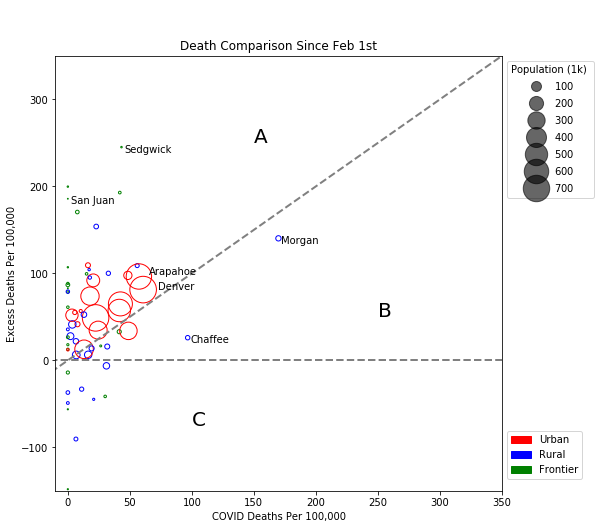

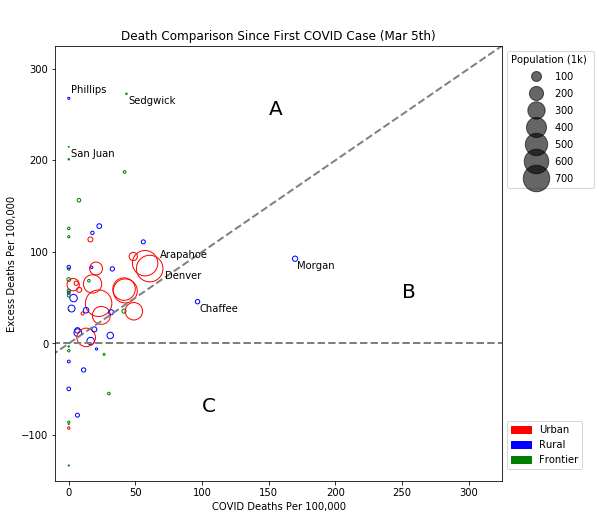

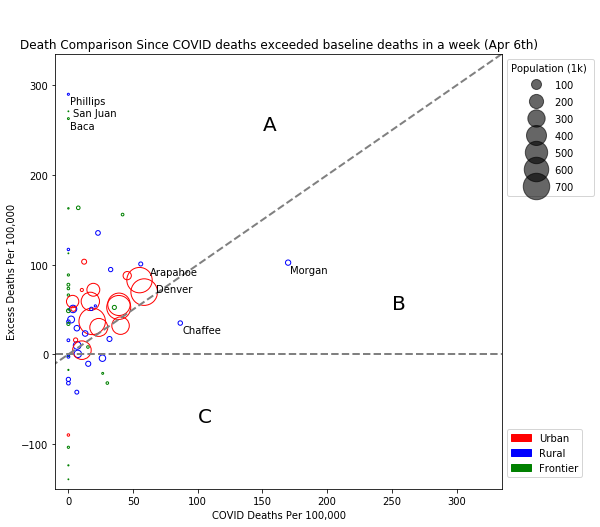

In [18]:
# Calculation of excess deaths with time varying population (sensitivity analysis)
yearsBaseline = np.mean(overallDeathYears[0:len(overallDeathYears) - 1], axis = 0)
yearsBaselineMarApr = np.mean(overallDeathMarAprYears[0:len(overallDeathMarAprYears) - 1], axis = 0)
yearsBaselinePos = np.mean(overallDeathPosYears[0:len(overallDeathMarAprYears) - 1], axis = 0)
excessDeathsAllPop = overallDeathYears[-1, :] - yearsBaseline
excessDeathsMarAprAllPop = overallDeathMarAprYears[-1, :] - yearsBaselineMarApr
excessDeathsPosAllPop = overallDeathPosYears[-1, :] - yearsBaselinePos
# Graphs COVID Deaths vs Excess Deaths for Population from the year before.
def Feb1 (part, shade):
    fig, ax = plt.subplots(figsize = (8, 8))
    scatter = ax.scatter(covidCountyPop, excessDeathsAllPop, edgecolors = color, facecolors='none', s = pop*100)
    for i, txt in enumerate(labels):
        if txt in labelsList:
            if txt == 'Arapahoe':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsAllPop[i]), textcoords="offset points", xytext=(10,2))
            elif txt == 'Denver':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsAllPop[i]), textcoords="offset points", xytext=(15,0))
            elif txt == 'Phillips':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsAllPop[i]), textcoords="offset points", xytext=(4,-10))
            else:
                ax.annotate(txt, (covidCountyPop[i], excessDeathsAllPop[i]), textcoords="offset points", xytext=(3,-5))
    ax.hlines(y=0, xmin=-100, xmax=500, linewidth=2, color='grey', linestyle= '--')
    xpoints = ypoints = range(int(ax.get_xlim()[0]), int(ax.get_xlim()[1]))
    ax.plot(xpoints, ypoints, linestyle='--', color='grey', lw=2, scalex=False, scaley=False)
    handles, labelsSize = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)
    legend2 = ax.legend(handles, labelsSize, title="Population (1k) ", loc='upper left', bbox_to_anchor=(1, 1))
    ax.add_artist(legend2)
    if shade:
        if part == 1:
            ax.fill_between(xpoints, 0, -1000, facecolor='grey', alpha=0.2)
        elif part == 2:
            ax.fill_between(xpoints, 0, ypoints, facecolor='grey', alpha=0.2)
        elif part == 3:
            ax.fill_between(xpoints, ypoints, 1000, facecolor='grey', alpha=0.2)
    plt.annotate('A', (150, 250), fontsize=20)
    plt.annotate('B', (250, 50), fontsize=20)
    plt.annotate('C', (100, -75), fontsize=20)
    plt.xlabel('COVID Deaths Per 100,000')
    plt.ylabel('Excess Deaths Per 100,000')
    plt.xlim(-10, 350)
    plt.ylim(-150, 350)
    plt.title('Death Comparison Since Feb 1st')
    plt.legend(handles=[red_patch, blue_patch, green_patch], loc='upper left', bbox_to_anchor=(1, 0.15))
    plt.show()

Feb1(1, False)

# Graphs COVID Deaths vs Excess Deaths Since First Case
def fCase (part , shade):
    fig, ax = plt.subplots(figsize = (8, 8))
    scatter = ax.scatter(covidCountyPop, excessDeathsMarAprAllPop, edgecolors = color, facecolors='none', s = pop*100)
    for i, txt in enumerate(labels):
        if txt in labelsList:
            if txt == 'Phillips':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsMarAprAllPop[i]), textcoords="offset points", xytext=(2,5))
            elif txt == 'Arapahoe':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsMarAprAllPop[i]), textcoords="offset points", xytext=(15,5))
            elif txt == 'Denver':
                ax.annotate(txt, (covidCountyPop[i], excessDeathsMarAprAllPop[i]), textcoords="offset points", xytext=(15,-10))
            else:
                ax.annotate(txt, (covidCountyPop[i], excessDeathsMarAprAllPop[i]), textcoords="offset points", xytext=(2,-10))
    ax.hlines(y=0, xmin=-100, xmax=500, linewidth=2, color='grey', linestyle= '--')
    xpoints = ypoints = ax.get_xlim()
    ax.plot(xpoints, ypoints, linestyle='--', color='grey', lw=2, scalex=False, scaley=False)
    handles, labelsSize = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)
    legend2 = ax.legend(handles, labelsSize, title="Population (1k) ", loc='upper left', bbox_to_anchor=(1, 1))
    ax.add_artist(legend2)
    if shade:
        if part == 1:
            ax.fill_between(xpoints, 0, -1000, facecolor='grey', alpha=0.2)
        elif part == 2:
            ax.fill_between(xpoints, 0, ypoints, facecolor='grey', alpha=0.2)
        elif part == 3:
            ax.fill_between(xpoints, ypoints, 1000, facecolor='grey', alpha=0.2)
    plt.annotate('A', (150, 250), fontsize=20)
    plt.annotate('B', (250, 50), fontsize=20)
    plt.annotate('C', (100, -75), fontsize=20)
    plt.xlabel('COVID Deaths Per 100,000')
    plt.ylabel('Excess Deaths Per 100,000')
    plt.xlim(-10, 325)
    plt.ylim(-150, 325)
    plt.title('Death Comparison Since First COVID Case (Mar 5th)')
    plt.legend(handles=[red_patch, blue_patch, green_patch], loc='upper left', bbox_to_anchor=(1, 0.15))
    plt.show()
    
fCase(1, False)

# Graphs COVID Deaths vs Excess Deaths Since COVID Deaths is Large
def Apr6 (part, shade):
    fig, ax = plt.subplots(figsize = (8, 8))
    scatter = ax.scatter(aprEndCOVIDPop, excessDeathsPosAllPop, edgecolors = color, facecolors='none', s = pop * 100)
    for i, txt in enumerate(labels):
        if txt in labelsList:
            if txt == 'Arapahoe':
                ax.annotate(txt, (aprEndCOVIDPop[i], excessDeathsPosAllPop[i]), textcoords="offset points", xytext=(10,5))
            elif txt == 'Denver':
                ax.annotate(txt, (aprEndCOVIDPop[i], excessDeathsPosAllPop[i]), textcoords="offset points", xytext=(12,0))
            elif txt == 'San Juan':
                ax.annotate(txt, (aprEndCOVIDPop[i], excessDeathsPosAllPop[i]), textcoords="offset points", xytext=(5,-5))
            else:
                ax.annotate(txt, (aprEndCOVIDPop[i], excessDeathsPosAllPop[i]), textcoords="offset points", xytext=(2,-10))
    ax.hlines(y=0, xmin=-100, xmax=500, linewidth=2, color='grey', linestyle= '--')
    xpoints = ypoints = ax.get_xlim()
    ax.plot(xpoints, ypoints, linestyle='--', color='grey', lw=2, scalex=False, scaley=False)
    handles, labelsSize = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)
    legend2 = ax.legend(handles, labelsSize, title="Population (1k) ", loc='upper left', bbox_to_anchor=(1, 1))
    ax.add_artist(legend2)
    if shade:
        if part == 1:
            ax.fill_between(xpoints, 0, -1000, facecolor='grey', alpha=0.2)
        elif part == 2:
            ax.fill_between(xpoints, 0, ypoints, facecolor='grey', alpha=0.2)
        elif part == 3:
            ax.fill_between(xpoints, ypoints, 1000, facecolor='grey', alpha=0.2)
    plt.annotate('A', (150, 250), fontsize=20)
    plt.annotate('B', (250, 50), fontsize=20)
    plt.annotate('C', (100, -75), fontsize=20)
    plt.xlabel('COVID Deaths Per 100,000')
    plt.ylabel('Excess Deaths Per 100,000')
    plt.xlim(-10, 335)
    plt.ylim(-150, 335)
    plt.title('Death Comparison Since COVID deaths exceeded baseline deaths in a week (Apr 6th)')
    plt.legend(handles=[red_patch, blue_patch, green_patch], loc='upper left', bbox_to_anchor=(1, 0.15))
    plt.show()

Apr6(2, False)

In [19]:
# Creates a Dataframe with COVID Death Data
dictCOVIDExcel = dict(zip(labels, covidCountyPop))
Struct = pd.DataFrame.from_dict(dictCOVIDExcel, orient='index', columns=['JHU'])
Struct.insert(1, column = 'JHU April 6th Onwards', value = aprEndCOVIDPop)
Struct.insert(2, column = 'Death_Cert', value = covid2020/pop)

writer = pd.ExcelWriter('COVID_County.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Struct.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [20]:
# Creates a Dataframe with Excess Mortality Time-Varying Population
dictExcessAllExcel = dict(zip(labels, excessDeathsAllPop))
Struct = pd.DataFrame.from_dict(dictExcessAllExcel, orient='index', columns=['Feb 1st'])
Struct.insert(1, column = 'First Case', value = excessDeathsMarAprAllPop)
Struct.insert(2, column = 'Apr 6th', value = excessDeathsPosAllPop)

writer = pd.ExcelWriter('Excess_Mortality_VarPop.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Struct.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [21]:
# Sums for all of Colorado 
print ("Fixed Population Death Rate since Feb 1: " + str(sum(excessDeaths) / sum(pop)))
print ("Fixed Population Death Rate since First Case: " + str(sum(excessDeathsMarApr) / sum(pop)))
print ("Time-Varying Excess Death Rate: " + str(sum(excessDeathsMarAprAllPop) / sum(pop)))
print ("COVID Death Rate: " + str(sum(covidCounty) / sum(pop)))

Fixed Population Death Rate since Feb 1: 77.21878465710263
Fixed Population Death Rate since First Case: 71.32106731589046
Time-Varying Excess Death Rate: 62.14365644120669
COVID Death Rate: 35.240285683148706


In [22]:
# Calculates Excess Deaths
excessDeathsWeek = (weekDeath2020 - baselineWeek)
excessDeathsFeb = feb2020 - baselineFeb
excessDeathsMar = mar2020 - baselineMar
excessDeathsApr = apr2020 - baselineApr  
excessDeathsMay = may2020 - baselineMay
excessDeathsJune = june2020 - baselineJune
excessDeathsJuly = july2020 - baselineJuly
excessDeathsAug = aug2020 - baselineAug

# Totals for the state over each relevant time period
sumExcessDeathsWeek = np.sum(excessDeathsWeek, axis = 0)/sum(pop)
sumExcessDeathsFeb =  np.sum(excessDeathsFeb)/sum(pop)
sumExcessDeathsMar =  np.sum(excessDeathsMar)/sum(pop)
sumExcessDeathsApr =  np.sum(excessDeathsApr)/sum(pop)
sumExcessDeathsMay =  np.sum(excessDeathsMay)/sum(pop)
sumExcessDeathsJune =  np.sum(excessDeathsJune)/sum(pop)
sumExcessDeathsJuly =  np.sum(excessDeathsJuly)/sum(pop)
sumExcessDeathsAug =  np.sum(excessDeathsAug)/sum(pop)
sumExcessDeaths =  np.sum(excessDeaths)/sum(pop)
sumExcessDeathsMarApr =  np.sum(excessDeathsMarApr)/sum(pop)
sumExcessDeathsPos = np.sum(excessDeathsPos)/sum(pop)
allSum = np.append(sumExcessDeaths, 
                   np.append(sumExcessDeathsMarApr,
                             np.append(sumExcessDeathsPos,
                                np.append(sumExcessDeathsFeb,
                                 np.append(sumExcessDeathsMar, 
                                       np.append(sumExcessDeathsApr, 
                                            np.append(sumExcessDeathsMay, 
                                                      np.append(sumExcessDeathsJune, 
                                                                np.append(sumExcessDeathsJuly, 
                                                                          np.append(sumExcessDeathsAug, 
                                                                                    sumExcessDeathsWeek))))))))))

# Population Adjustment
excessDeathsWeekPop = (excessDeathsWeek.T / pop).T
excessDeathsMarPop = excessDeathsMar / pop
excessDeathsAprPop = excessDeathsApr / pop
excessDeathsMayPop = excessDeathsMay / pop
excessDeathsJunePop = excessDeathsJune / pop
excessDeathsJulyPop = excessDeathsJuly / pop
excessDeathsAugPop = excessDeathsAug / pop

# Dictionaries with the labels and excess deaths
dictExcess = dict(zip(labels, tuple(zip(excessDeathsPop, color))))
dictExcess2 = dict(zip(labels, tuple(zip(excessDeathsPop2, color))))
dictCOVID = dict(zip(labels, covidCountyPop))
dictMarApr = dict(zip(labels, excessDeathsPopMarApr))
dictWeek = dict(zip(labels, excessDeathsWeekPop))
dictMar = dict(zip(labels, excessDeathsMarPop))
dictApr = dict(zip(labels, excessDeathsAprPop))
dictDeath = dict(zip(labels, death2020))
dictBaseline = dict(zip(labels, baseline))

In [23]:
# Creates a Dataframe with Excess Death Data
Struct= pd.DataFrame.from_dict(dictWeek, orient='index', columns=['Feb1', 'Feb2', 'Feb3', 'Feb4','Mar1', 'Mar2', 'Mar3', 'Mar4', 'Mar/Apr', 'Apr1', 'Apr2', 'Apr3', 'Apr/May', 'May1', 'May2', 'May3', 'May4', 'June1', 'June2', 'June3', 'June4', 'July1', 'July2', 'July3', 'July4', 'July/Aug', 'Aug1', 'Aug2', 'Aug3', 'Aug4', 'Sep1'])
Struct.insert(0, column = 'Feb 1st', value = excessDeathsPop)
Struct.insert(1, column = 'Since First Case', value = excessDeathsPopMarApr)
Struct.insert(2, column = 'Since Apr 6th', value = excessDeathsPosPop)
Struct.insert(3, column = 'March', value = excessDeathsMarPop)
Struct.insert(4, column = 'April', value = excessDeathsAprPop)
Struct.insert(5, column = 'May', value = excessDeathsMayPop)
Struct.insert(6, column = 'June', value = excessDeathsJunePop)
Struct.insert(7, column = 'July', value = excessDeathsJulyPop)
Struct.insert(8, column = 'August', value = excessDeathsAugPop)

writer = pd.ExcelWriter('Excess_Mortality.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Struct.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [24]:
# Cumulative Excess Deaths and COVID Deaths
weeklyCOVID = np.array(weeklyCOVID)
cumulativeCOVID = np.zeros ((numCounty, 31))
cumulativeExcess = np.zeros ((numCounty, 31))
cumulativeBaseline = np.zeros ((numCounty, 31))
sumCumDOH = []
for i, _ in enumerate(excessDeathsWeek.T):
    cumulativeExcess[:, i] = ((sum(excessDeathsWeek.T[0:i + 1])))
    cumulativeBaseline[:, i] = ((sum(baselineWeek.T[0:i + 1])))
    cumulativeCOVID[:, i] = ((sum(weeklyCOVID[0:i + 1])))
    sumCumDOH.append(sum (sum2020COVID[0:i + 1]))
    
# Population Normalization    
cumulativeExcessPop = (cumulativeExcess.T / pop).T
cumulativeCOVIDPop = (cumulativeCOVID.T / pop).T
cumulativeBaselinePop = (cumulativeBaseline.T / pop).T
sumCumExcess = sum(cumulativeExcess) / sum(pop)
sumCumCOVID = sum(cumulativeCOVID)/ sum(pop)
sumCumBaseline = sum(cumulativeBaseline) / sum (pop)

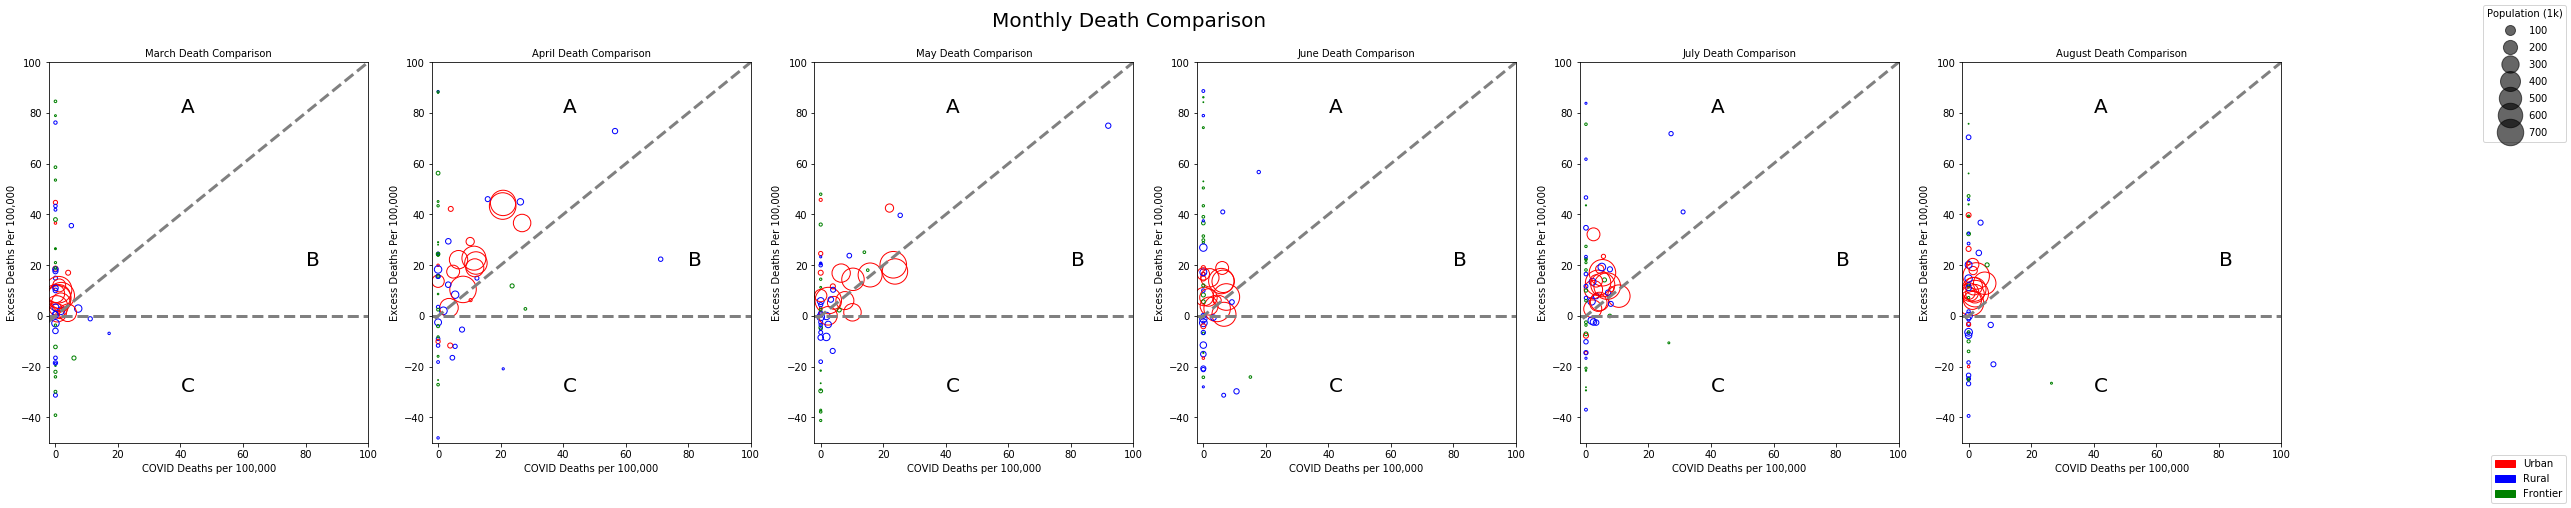

In [25]:
# Color by urban, rural, or green
color = []
for element in labels:
    if element in urban:
        color.append('r')
    elif element in rural:
        color.append('b')  
    else:
        color.append('g')

red_patch = mpatches.Patch(color='red', label='Urban')
blue_patch = mpatches.Patch(color='blue', label='Rural')
green_patch = mpatches.Patch(color='green', label='Frontier')

combinedCOVID = [marCOVIDPop, aprCOVIDPop, mayCOVIDPop, juneCOVIDPop, julyCOVIDPop, augCOVIDPop]
combinedExcess = [excessDeathsMarPop, excessDeathsAprPop, excessDeathsMayPop, excessDeathsJunePop, excessDeathsJulyPop, excessDeathsAugPop]
Months = ['March', 'April', 'May', 'June', 'July', 'August']
# Graphs COVID Deaths vs Excess Deaths in each month
def MonthPlot (part, shade):
    fig, ax= plt.subplots(nrows = 1, ncols = 6, figsize = (40, 7))
    k = 0
    for col in ax:
        scatter = col.scatter(combinedCOVID [k], combinedExcess[k], edgecolors = color, facecolors='none', s = pop * 100)
        col.hlines(y=0, xmin=-100, xmax=500, linewidth=3, color='grey', linestyle= '--')
        xpoints = ypoints = col.get_xlim()
        col.plot(xpoints, ypoints, linestyle='--', color='grey', lw=3, scalex=False, scaley=False)
        if shade:
            if part == 1:
                col.fill_between(xpoints, 0, -1000, facecolor='g', alpha=0.2)
            elif part == 2:
                col.fill_between(xpoints, 0, ypoints, facecolor='g', alpha=0.2)
            elif part == 3:
                col.fill_between(xpoints, ypoints, 1000, facecolor='g', alpha=0.2)
        col.set_title(Months[k] + ' Death Comparison', fontsize = 10)
        col.set(xlim = (-2, 100), ylim = (-50, 100))
        col.set_xlabel("COVID Deaths per 100,000", fontsize = 10)
        col.set_ylabel('Excess Deaths Per 100,000', fontsize = 10)
        col.tick_params(axis='both', which='major', labelsize=10)
        col.annotate('A', (40, 80), fontsize=20)
        col.annotate('B', (80, 20), fontsize=20)
        col.annotate('C', (40, -30), fontsize=20)
        handles, labelsSize = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)
        k += 1

    fig.suptitle("Monthly Death Comparison", fontsize = 20)
    plt.savefig('Monthly Excess Deaths.png')
    fig.legend(handles, labelsSize, loc='upper right', title = 'Population (1k)')
    fig.legend(handles=[red_patch, blue_patch, green_patch], loc='lower right')
    plt.show(fig)

MonthPlot(3, False)              

In [26]:
# Creates a Dataframe with COVID Death Data
dictCOVIDLong = dict(zip(labels, marCOVIDPop))
Struct = pd.DataFrame.from_dict(dictCOVIDLong, orient='index', columns=['March'])
for i, item in enumerate(combinedCOVID[1:]):
    Struct.insert(i + 1, column = Months[i + 1], value = item)

writer = pd.ExcelWriter('COVID_Long_County.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Struct.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [27]:
# Creates a Dataframe with COVID Excess Death Data
dictExcessLong = dict(zip(labels, excessDeathsMarPop))
Struct = pd.DataFrame.from_dict(dictExcessLong, orient='index', columns=['March'])
for i, item in enumerate(combinedExcess[1:]):
    Struct.insert(i + 1, column = Months[i + 1], value = item)

writer = pd.ExcelWriter('Excess_Long_County.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Struct.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

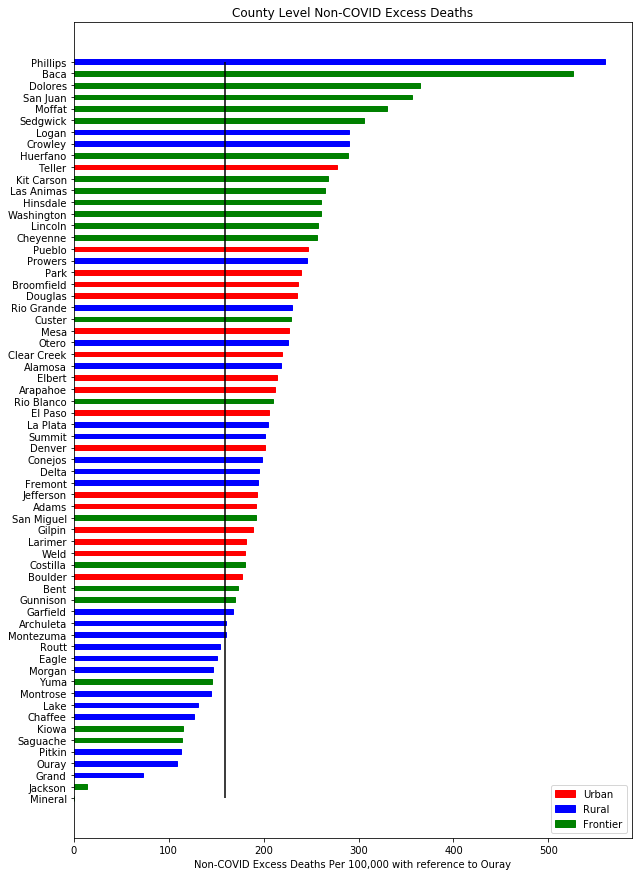

In [28]:
# Ordered plot of Non-COVID Excess Deaths in each County
plt.figure(figsize = (10, 15))
sorted_deaths2 = sorted(dictExcess2.items(), key=lambda kv: kv[1][0])
x = [i[0] for i in sorted_deaths2]
y = [j[1][0] for j in sorted_deaths2]
c = [k[1][1] for k in sorted_deaths2]
first = y[0]
y = [j - first for j in y]
y_pos = np.arange(len(sorted_deaths2)) * 5
barlist = plt.barh(y_pos, y, align='center', height = 2)
for i, bar in enumerate(barlist):
    bar.set_color(c[i])
plt.yticks(y_pos, x)
plt.xlabel('Non-COVID Excess Deaths Per 100,000 with reference to Ouray')
plt.title('County Level Non-COVID Excess Deaths')
plt.yticks(rotation = 0)
plt.vlines (-first, y_pos[0], y_pos[-1])
plt.legend(handles=[red_patch, blue_patch, green_patch], loc='lower right')
plt.savefig('ExcessDeaths2.png')
plt.show()

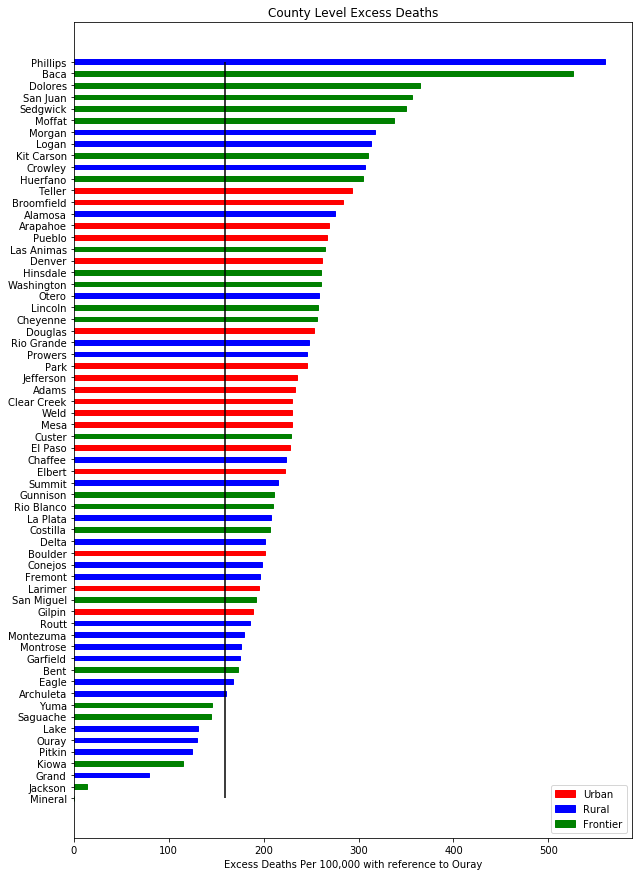

In [29]:
# Ordered plot of Excess Deaths in each County
plt.figure(figsize = (10, 15))
sorted_deaths = sorted(dictExcess.items(), key=lambda kv: kv[1][0])
x = [i[0] for i in sorted_deaths]
y = [j[1][0] for j in sorted_deaths]
c = [k[1][1] for k in sorted_deaths]
first = y[0]
y = [j - first for j in y]
y_pos = np.arange(len(sorted_deaths)) * 5
barlist = plt.barh(y_pos, y, align='center', height = 2)
for i, bar in enumerate(barlist):
    bar.set_color(c[i])
plt.yticks(y_pos, x)
plt.xlabel('Excess Deaths Per 100,000 with reference to Ouray')
plt.title('County Level Excess Deaths')
plt.yticks(rotation = 0)
plt.vlines (-first, y_pos[0], y_pos[-1])
plt.legend(handles=[red_patch, blue_patch, green_patch], loc='lower right')
plt.savefig('ExcessDeathsOrig.png')
plt.show()

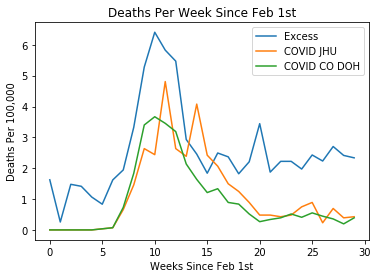

Average Number of Baseline Deaths Each Week: 23.278302077512414


In [30]:
# Plot of weekly deaths
reference = sum(sum(baselineWeek)) / (sum(pop) * 17)
plt.plot(allSum[10:len(allSum) - 1], label = "Excess")
plt.plot(sumWeeklyCOVID[0:len(sumWeeklyCOVID) - 1], label = 'COVID JHU')
plt.plot(sum2020COVID[0:len(sum2020COVID) - 1], label = 'COVID CO DOH')
plt.xlabel('Weeks Since Feb 1st')
plt.ylabel('Deaths Per 100,000')
plt.title('Deaths Per Week Since Feb 1st')
plt.legend()
plt.show()
print ("Average Number of Baseline Deaths Each Week: " + str(reference))

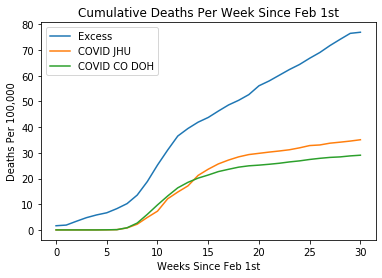

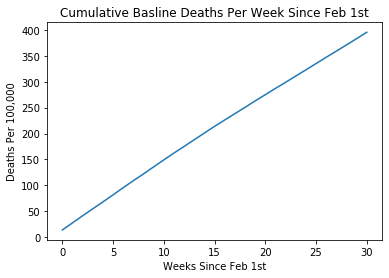

In [31]:
# Cumulative COVID Deaths and Excess Deaths
plt.plot(sumCumExcess, label = "Excess")
plt.plot(sumCumCOVID, label = 'COVID JHU')
plt.plot(sumCumDOH, label = 'COVID CO DOH')
plt.xlabel('Weeks Since Feb 1st')
plt.ylabel('Deaths Per 100,000')
plt.title('Cumulative Deaths Per Week Since Feb 1st')
plt.legend()
plt.show()
plt.plot(sumCumBaseline)
plt.xlabel('Weeks Since Feb 1st')
plt.ylabel('Deaths Per 100,000')
plt.title('Cumulative Basline Deaths Per Week Since Feb 1st')
plt.show()

In [32]:
# Naive Correlation Analysis of basic Vulnerability index factors
url = 'csv_data/Colorado_CDC.csv'
CDC = pd.read_csv(url, index_col = None)
overallCDC = CDC['EP_MINRTY'].values.astype(float)
url = 'csv_data/American Communities.xlsx'
American = pd.read_excel(url, index_col = None)
url = 'csv_data/CCVI.xlsx'
UninsuredRates = American ['Uninsured Rate'].values.astype(float)
ObesityRates = American ['Obesity Rate'].values.astype(float)
Commute = American ['Commute'].values.astype(float)
Income = American ['Income'].values.astype(float)
# plt.scatter(Income, excessDeathsPopMarApr)

CCVI = pd.read_excel(url)
overallCCVI = CCVI['Theme 6'].values.astype(float)

result = scipy.stats.spearmanr(overallCCVI, excessDeathsPop)
result2 = scipy.stats.kendalltau(overallCCVI, excessDeathsPop)
result3 = scipy.stats.linregress(overallCCVI, excessDeathsPop)

In [33]:
# Automation of above correlation analysis for the different columns
url = 'csv_data/CCVI.xlsx'
CCVI = pd.read_excel(url)
Track = []
Lin = []
Spearman = []
Kendall = []
for i in range (4, len(CCVI.columns)):
    Track.append(list(CCVI.columns.values)[i])
    Lin.append((round(scipy.stats.linregress(CCVI.iloc[:, i].values, excessDeathsPopMarApr).rvalue, 3), 
               round(scipy.stats.linregress(CCVI.iloc[:, i].values, excessDeathsPopMarApr).pvalue, 3)))
    Spearman.append((round(scipy.stats.spearmanr(CCVI.iloc[:, i].values, excessDeathsPopMarApr)[0], 3), 
               round(scipy.stats.spearmanr(CCVI.iloc[:, i].values, excessDeathsPopMarApr)[1], 3)))
    Kendall.append((round(scipy.stats.kendalltau(CCVI.iloc[:, i].values, excessDeathsPopMarApr)[0], 3), 
               round(scipy.stats.kendalltau(CCVI.iloc[:, i].values, excessDeathsPopMarApr)[1], 3)))

corr = { 'Index': Track,
        'Linear Correlation, p-value': Lin,
        'Spearman Rank Correlation, p-value': Spearman,
        'Kendall Tau Correlation, p-value': Kendall
        }

dfCorr = pd.DataFrame.from_dict(corr)
writer = pd.ExcelWriter('Correlation.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
dfCorr.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# County Type Visualizations

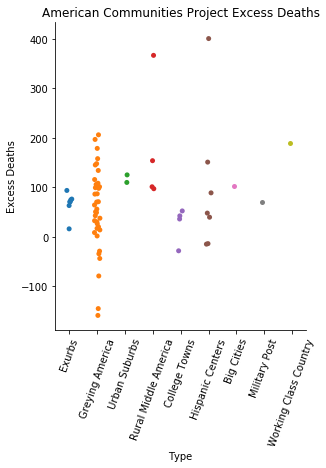

In [34]:
# American Communities Project Classification for each County
types = American['Type'].values
appended = {'Type': types,
            # change excessDeathsPop to change the timeframe
        'Excess Deaths': excessDeathsPop,
        'Excess Deaths Alt': excessDeaths
        }
dfAppended = pd.DataFrame(appended, columns = ['Type', 'Excess Deaths', 'Excess Deaths Alt'])
jitter = sns.catplot(x="Type", y="Excess Deaths", data=dfAppended)
for ax in jitter.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(70)
plt.title('American Communities Project Excess Deaths')
plt.show()

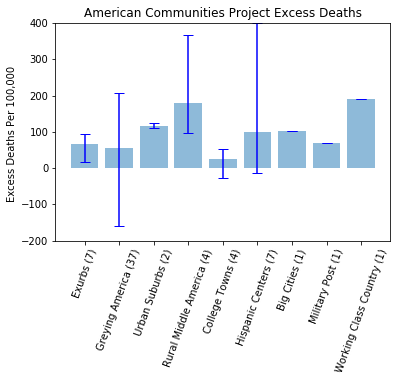

In [35]:
# American Communities Calculations of Excess Deaths
indexA = dict()
indexA2 = dict()
lengthA = dict()
appendedA = dict()
countyA = dict()
for ind, row in dfAppended.iterrows():
    if row['Type'] not in list(indexA.keys()):
        indexA[row['Type']] = row['Excess Deaths']
        indexA2[row['Type']] = row['Excess Deaths Alt']
        lengthA[row['Type']] = 1
        appendedA[row['Type']] = [row['Excess Deaths']]
        countyA [row['Type']] = [ind]
    else:
        indexA[row['Type']] += row['Excess Deaths']
        indexA2[row['Type']] += row['Excess Deaths Alt']
        lengthA[row['Type']] += 1
        appendedA[row['Type']].append(row['Excess Deaths'])
        countyA [row['Type']].append(ind)

AmericanPop = []
excessDeathsAmericanWeek = []
cumExcessDeathsAmericanWeek = []
weeklyCOVIDAmerican = []
cumulativeCOVIDAmerican = []
for key in countyA:
    AmericanPop.append(sum ([pop [i] for i in countyA[key]]))
    excessDeathsAmericanWeek.append(sum ([excessDeathsWeek [i, :] for i in countyA[key]]))
    cumExcessDeathsAmericanWeek.append(sum ([cumulativeExcess[i, :] for i in countyA[key]]))
    weeklyCOVIDAmerican.append(sum ([weeklyCOVID.T[i, :] for i in countyA[key]]))
    cumulativeCOVIDAmerican.append(sum ([cumulativeCOVID[i, :] for i in countyA[key]]))

excessDeathsAmericanWeekPop = (np.array(excessDeathsAmericanWeek).T / np.array(AmericanPop)).T
cumExcessDeathsAmericanWeekPop = (np.array(cumExcessDeathsAmericanWeek).T / np.array(AmericanPop)).T
weeklyCOVIDAmericanPop = (np.array(weeklyCOVIDAmerican).T / np.array(AmericanPop)).T
cumulativeCOVIDAmericanPop = (np.array(cumulativeCOVIDAmerican).T / np.array(AmericanPop)).T

sumAmerican = np.array(list(indexA2.values())) / np.array(AmericanPop)
# max and min error bars
maxMin = np.zeros((2, len(appendedA)))
k = 0
for key, val in appendedA.items():
    maxMin[0][k] = min(val)
    maxMin[1][k] = max(val)
    k +=1

points = np.array(list(indexA.values())) / np.array(list(lengthA.values()))
xlabels = []
finalA = dict(zip(list(indexA.keys()), points))
for i, val in enumerate (appendedA.values()):
    xlabels.append(list(finalA.keys())[i] + ' (' + str(len(val)) + ')')
maxMin = abs(maxMin - points)

y_pos = np.arange(len(indexA))
plt.bar(y_pos, list(finalA.values()), align='center', alpha=0.5)
plt.xticks(y_pos, xlabels)
plt.ylabel('Excess Deaths Per 100,000 ')
plt.title('American Communities Project Excess Deaths')
plt.xticks(rotation=70)
plt.ylim(-200, 400)
plt.errorbar(y_pos, points, yerr = maxMin, ls='none', ecolor = 'blue', capsize = 5)
plt.show()

/Users/JayChandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


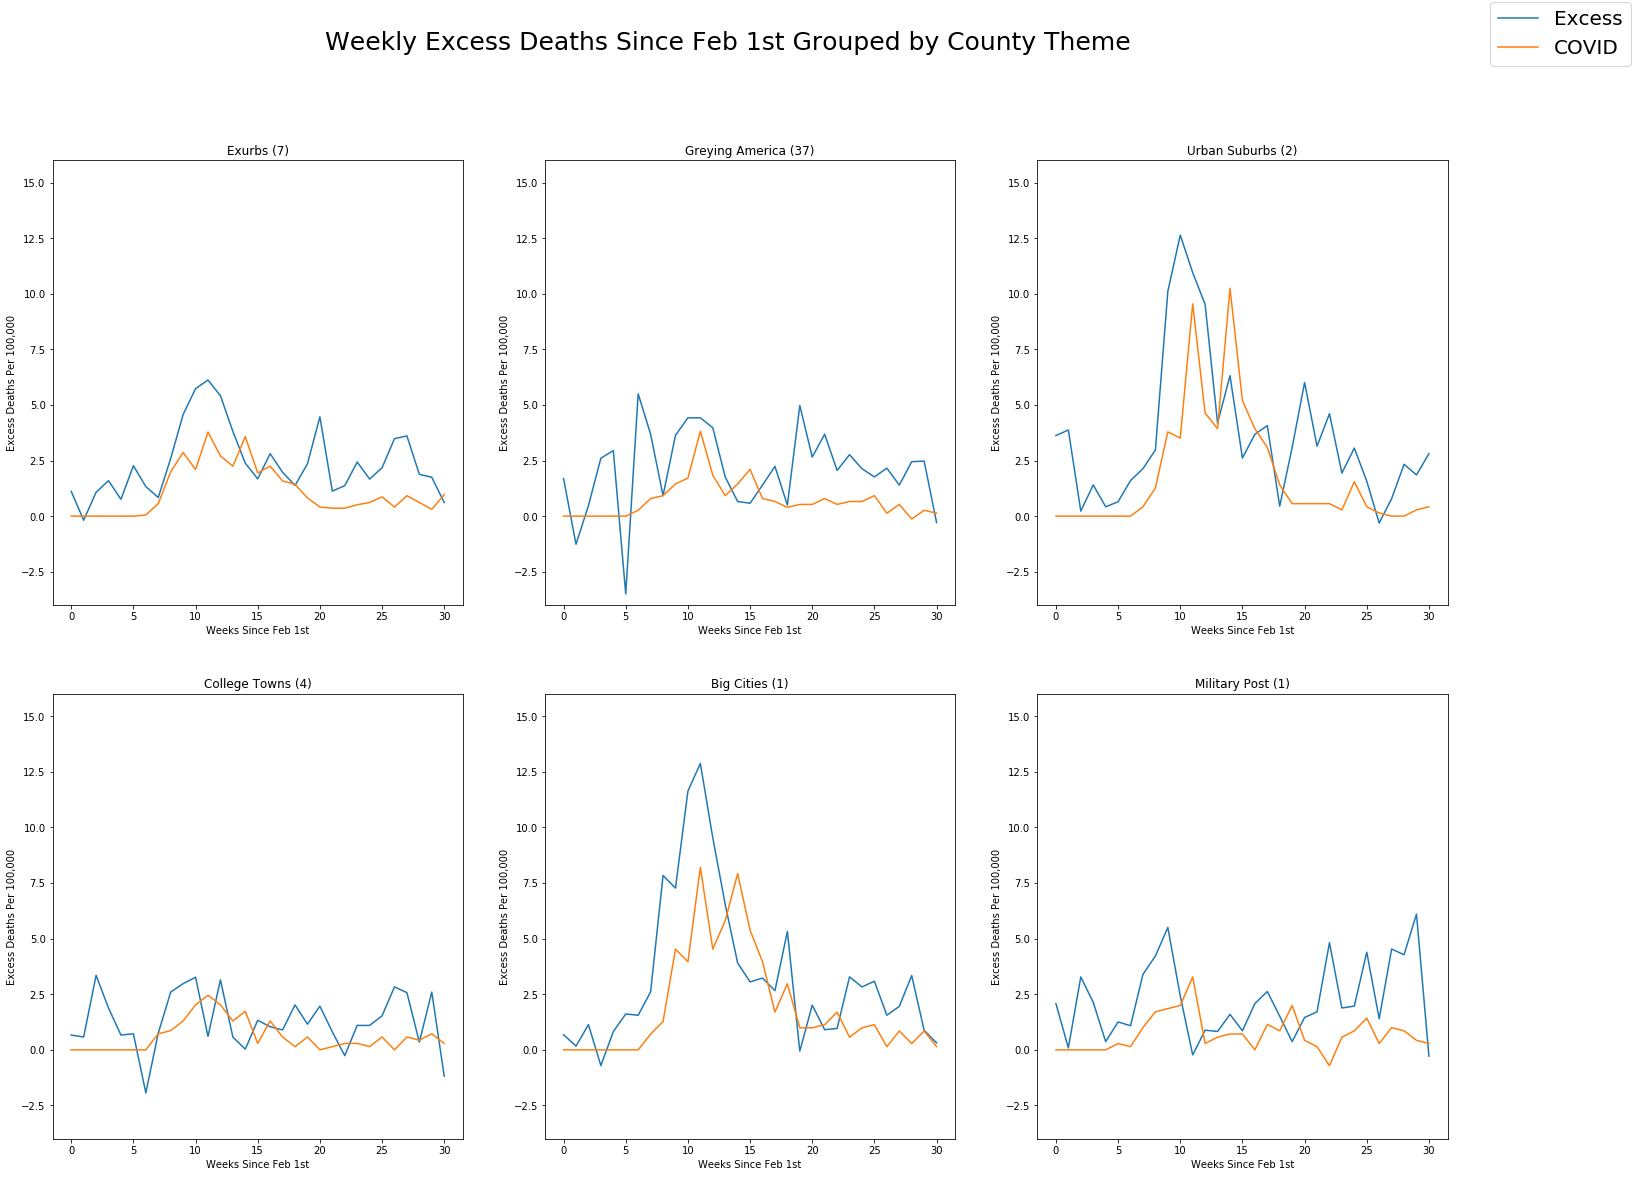

In [36]:
# Visualization of Weekly Excess Deaths by County Type
# Exclude Working Class County, Rural America, and Hispanic centers due to low sample size
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (25, 18))
index = 0
for row in ax:
    for col in row:
        if (index == 3 or index == 5):
            index +=1
        l1 = col.plot(excessDeathsAmericanWeekPop[index, :], label = 'COVID')[0]
        l2 = col.plot(weeklyCOVIDAmericanPop[index, :], label = 'Excess')[0]
        col.set_title(xlabels[index])
        col.set(xlabel="Weeks Since Feb 1st", ylabel='Excess Deaths Per 100,000', ylim = (-4, 16))
        index += 1
fig.suptitle("Weekly Excess Deaths Since Feb 1st Grouped by County Theme", fontsize = 25)
# Create the legend
fig.legend([l1, l2],
           labels=['Excess', 'COVID'],
           loc="upper right",   
           borderaxespad=0.1, 
           prop={'size': 20}
           )
plt.savefig('row_col_total_week_American.png')
plt.show(fig)

/Users/JayChandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


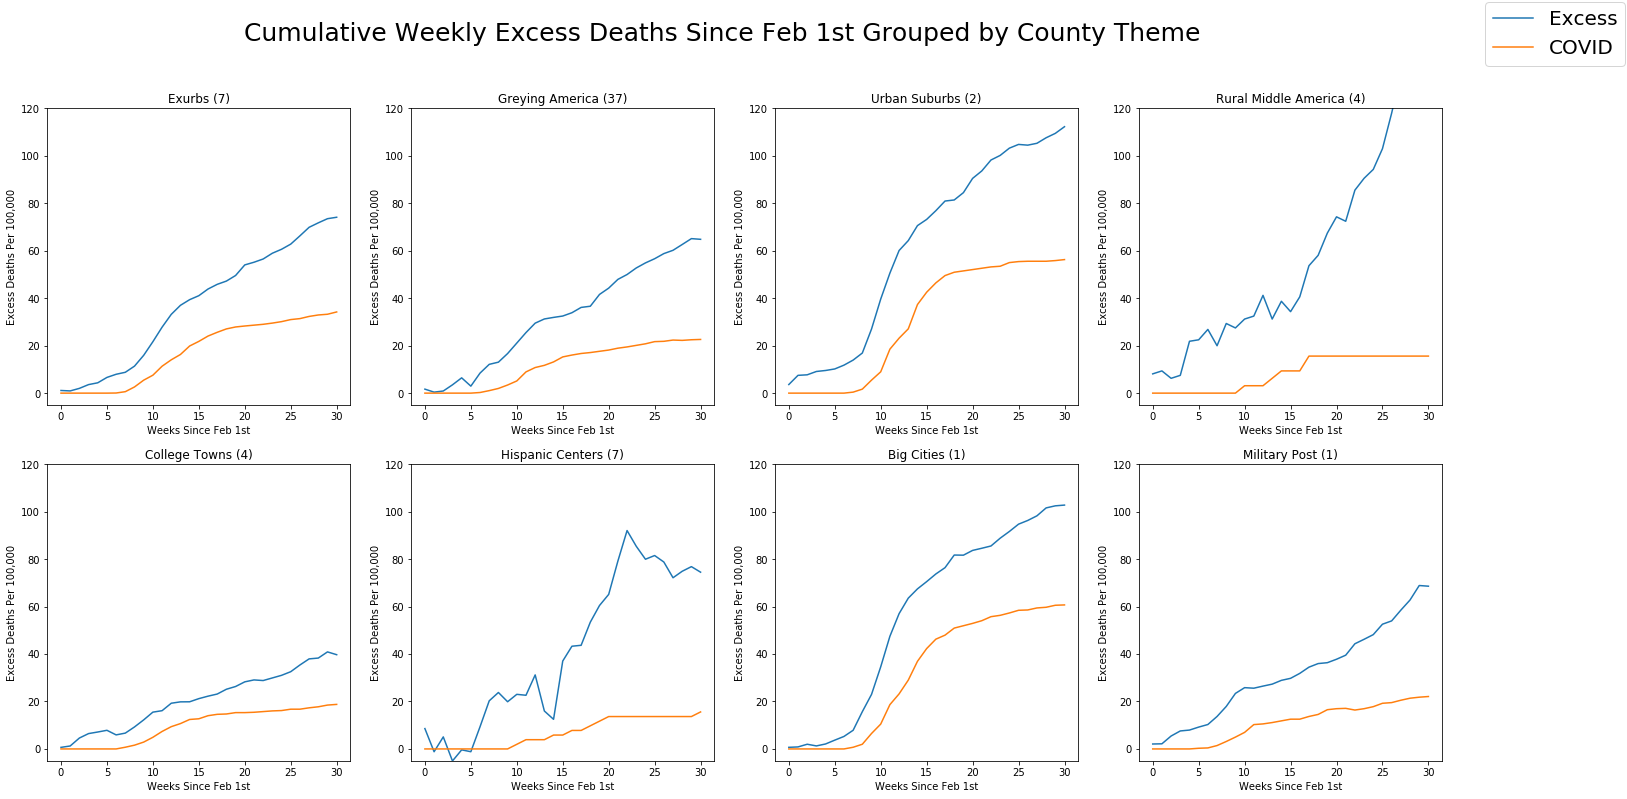

In [37]:
# Visualization of Cumulative Excess Deaths by County Type
# Excludes working class county (Low sample size)
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (25, 12))
index = 0
for row in ax:
    for col in row:
        l1 = col.plot(cumExcessDeathsAmericanWeekPop[index, :])[0]
        l2 = col.plot(cumulativeCOVIDAmericanPop[index, :])[0]
        col.set_title(xlabels[index])
        col.set(xlabel="Weeks Since Feb 1st", ylabel='Excess Deaths Per 100,000', ylim = (-5, 120))
        index += 1
fig.suptitle("Cumulative Weekly Excess Deaths Since Feb 1st Grouped by County Theme", fontsize = 25)
fig.legend([l1, l2],
           labels=['Excess', 'COVID'],
           loc="upper right",   
           borderaxespad=0.1, 
           prop={'size': 20}
           )
plt.savefig('row_col_total_week_American_cumulative.png')
plt.show(fig)

In [38]:
# Calculation of Excess Deaths by Classification of Urban, Rural, and Frontier
countyClass = {'rural': [], 'frontier': [], 'urban': []}
for i, element in enumerate(labels):
    if element in urban:
        countyClass ['urban'].append(i)
    elif element in rural:
        countyClass ['rural'].append(i)
    else:
        countyClass ['frontier'].append(i) 
        
covidClass = []
classPop = []
excessDeathClassWeek = []
cumExcessDeathsClassWeek = []
weeklyCOVIDClass = []
cumulativeCOVIDClass = []
excessDeathClassMarApr = []
for key in countyClass:
    covidClass.append(sum ([covidCounty [i] for i in countyClass[key]]))
    classPop.append(sum ([pop [i] for i in countyClass[key]]))
    excessDeathClassMarApr.append(sum ([excessDeathsMarApr [i] for i in countyClass[key]]))
    excessDeathClassWeek.append(sum ([excessDeathsWeek [i, :] for i in countyClass[key]]))
    cumExcessDeathsClassWeek.append(sum ([cumulativeExcess[i, :] for i in countyClass[key]]))
    weeklyCOVIDClass.append(sum ([weeklyCOVID.T[i, :] for i in countyClass[key]]))
    cumulativeCOVIDClass.append(sum ([cumulativeCOVID[i, :] for i in countyClass[key]]))

covidClassPop = np.array(covidClass) / np.array(classPop)
excessDeathClassMarAprPop = np.array(excessDeathClassMarApr) / np.array(classPop)
excessDeathClassWeekPop = (np.array(excessDeathClassWeek).T / np.array(classPop)).T
cumExcessDeathsClassWeekPop = (np.array(cumExcessDeathsClassWeek).T / np.array(classPop)).T
weeklyCOVIDClassPop = (np.array(weeklyCOVIDClass).T / np.array(classPop)).T
cumulativeCOVIDClassPop = (np.array(cumulativeCOVIDClass).T / np.array(classPop)).T

/Users/JayChandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  from ipykernel import kernelapp as app


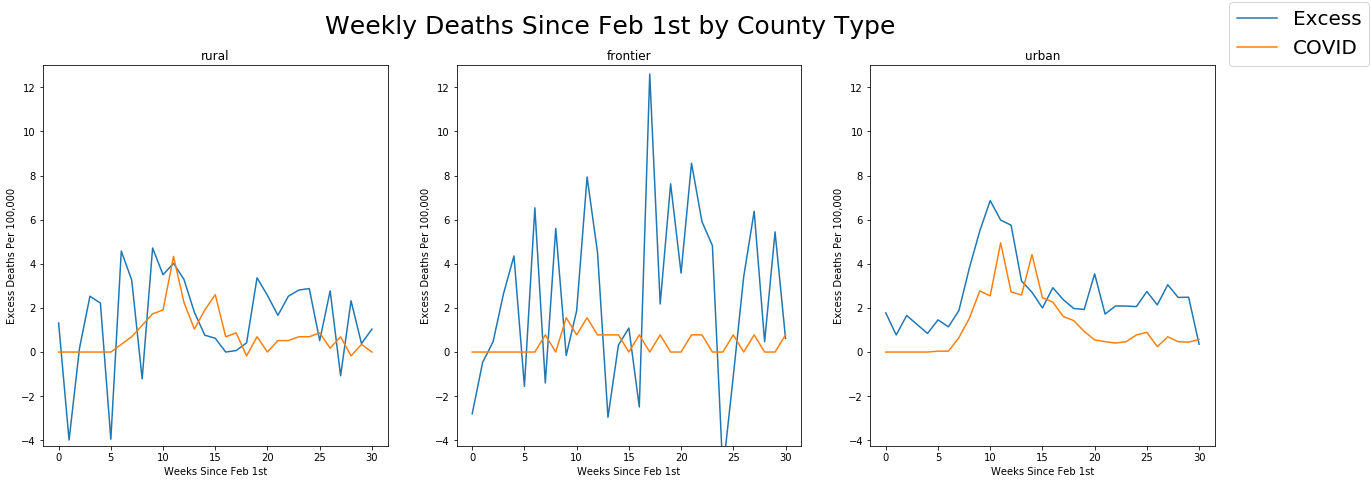

In [39]:
# Visualization of Weekly Excess Deaths by Urban, Rural, Frontier
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (21, 7))
index = 0
for col in ax:
    l1 = col.plot(excessDeathClassWeekPop[index, :])[0]
    l2 = col.plot(weeklyCOVIDClassPop[index, :])[0]
    col.set_title(list(countyClass.keys())[index])
    col.set(xlabel="Weeks Since Feb 1st", ylabel='Excess Deaths Per 100,000', ylim = (-4.25, 13))
    index += 1
fig.suptitle("Weekly Deaths Since Feb 1st by County Type", fontsize = 25)
fig.legend([l1, l2],
           labels=['Excess', 'COVID'],
           loc="upper right",   
           borderaxespad=0.1, 
           prop={'size': 20}
           )
plt.savefig('row_col_total_week_Class.png')
plt.show(fig)

/Users/JayChandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  from ipykernel import kernelapp as app


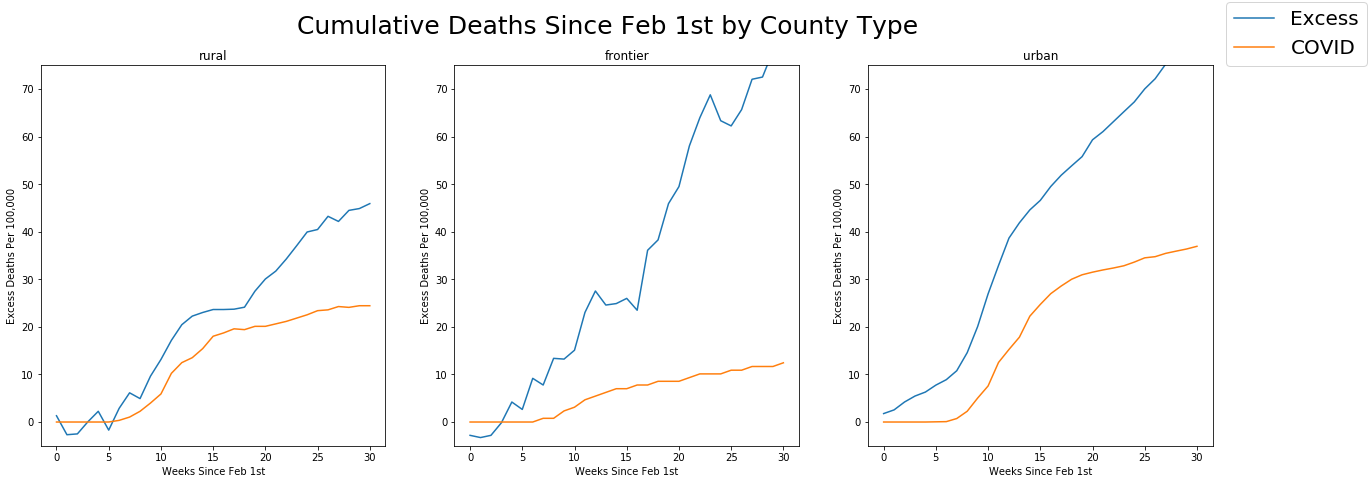

In [40]:
# Visualization of Cumulative Excess Deaths by Urban, Rural, Frontier
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (21, 7))
index = 0
for col in ax:
    l1 = col.plot(cumExcessDeathsClassWeekPop[index, :])[0]
    l2 = col.plot(cumulativeCOVIDClassPop[index, :])[0]
    col.set_title(list(countyClass.keys())[index])
    col.set(xlabel="Weeks Since Feb 1st", ylabel='Excess Deaths Per 100,000', ylim = (-5, 75))
    index += 1
fig.suptitle("Cumulative Deaths Since Feb 1st by County Type", fontsize = 25)
fig.legend([l1, l2],
           labels=['Excess', 'COVID'],
           loc="upper right",   
           borderaxespad=0.1, 
           prop={'size': 20}
           )
plt.savefig('row_col_total_week_Class_Cum.png')
plt.show(fig)

# CBSA Level

In [41]:
# CBSA
path = 'csv_data/CBSA_County_Info.csv'
CBSA = pd.read_csv(path, error_bad_lines=False)
# 8 is for Colorado
CBSA = CBSA.loc[CBSA['STATEFP'] == 8][['FIPS', 'NAME', 'CBSA_TITLE']]
names = list(set(CBSA['CBSA_TITLE'].values))
# Makes alphabetical
CBSA = CBSA.sort_values(by=['CBSA_TITLE'])
titles = []
currTitle = ''
dictCBSA = dict()

# Creates a dictionary with the number of the counties that corresponds with the CBSA
for ind, row in CBSA.iterrows():
    title = row['CBSA_TITLE'] 
    if title not in titles:
        titles.append(title)
        dictCBSA[title] = [row['FIPS']]
    else:
        dictCBSA[title].append(row['FIPS'])

# Creates numpy arrays for each CBSA
for key in dictCBSA:
    dictCBSA[key] = np.array (dictCBSA[key])
    
# Converts the fips number to positions
for key in dictCBSA:
    dictCBSA[key] = [list(labels).index(i) for i in [labelsDict[j] for j in dictCBSA[key]]]

# Cumulates everything for CBSA level
cumPop = []
excessDeathCBSA = []
covidCBSA = []
covid2020CBSA = []
covidAprEndCBSA = []
excessDeathCBSAMarApr = []
excessDeathCBSAPos = []
excessDeathCBSAWeek = []
cumExcessDeathsCBSAWeek = []
weeklyCOVIDCBSA = []
cumulativeCOVIDCBSA = []
excessDeathCBSAMar = []
excessDeathCBSAApr = []
excessDeathCBSAMay = []
excessDeathCBSAJune = []
excessDeathCBSAJuly = []
excessDeathCBSAAug = []
marCOVIDCBSA = []
aprCOVIDCBSA = []
mayCOVIDCBSA = []
juneCOVIDCBSA = []
julyCOVIDCBSA = []
augCOVIDCBSA = []
for key in dictCBSA:
    covidCBSA.append(sum ([covidCounty [i] for i in dictCBSA[key]]))
    covid2020CBSA.append(sum ([covid2020 [i] for i in dictCBSA[key]]))
    covidAprEndCBSA.append(sum ([aprEndCOVID [i] for i in dictCBSA[key]]))
    cumPop.append(sum ([pop [i] for i in dictCBSA[key]]))
    excessDeathCBSA.append(sum ([excessDeaths [i] for i in dictCBSA[key]]))
    excessDeathCBSAMarApr.append(sum ([excessDeathsMarApr [i] for i in dictCBSA[key]]))
    excessDeathCBSAPos.append(sum ([excessDeathsPos [i] for i in dictCBSA[key]]))
    excessDeathCBSAWeek.append(sum ([excessDeathsWeek [i, :] for i in dictCBSA[key]]))
    cumExcessDeathsCBSAWeek.append(sum ([cumulativeExcess[i, :] for i in dictCBSA[key]]))
    weeklyCOVIDCBSA.append(sum ([np.array(weeklyCOVID).T[i, :] for i in dictCBSA[key]]))
    cumulativeCOVIDCBSA.append(sum ([cumulativeCOVID[i, :] for i in dictCBSA[key]]))
    excessDeathCBSAMar.append(sum ([excessDeathsMar[i] for i in dictCBSA[key]]))
    excessDeathCBSAApr.append(sum ([excessDeathsApr[i] for i in dictCBSA[key]]))
    excessDeathCBSAMay.append(sum ([excessDeathsMay[i] for i in dictCBSA[key]]))
    excessDeathCBSAJune.append(sum ([excessDeathsJune[i] for i in dictCBSA[key]]))
    excessDeathCBSAJuly.append(sum ([excessDeathsJuly[i] for i in dictCBSA[key]]))
    excessDeathCBSAAug.append(sum ([excessDeathsAug[i] for i in dictCBSA[key]]))
    marCOVIDCBSA.append(sum ([marCOVID[i] for i in dictCBSA[key]]))
    aprCOVIDCBSA.append(sum ([aprCOVID[i] for i in dictCBSA[key]]))
    mayCOVIDCBSA.append(sum ([mayCOVID[i] for i in dictCBSA[key]]))
    juneCOVIDCBSA.append(sum ([juneCOVID[i] for i in dictCBSA[key]]))
    julyCOVIDCBSA.append(sum ([julyCOVID[i] for i in dictCBSA[key]]))
    augCOVIDCBSA.append(sum ([augCOVID[i] for i in dictCBSA[key]]))

# Population Normalization
excessDeathCBSAPop = np.array(excessDeathCBSA) / np.array(cumPop)
covidCBSAPop = np.array(covidCBSA) / np.array(cumPop)
covid2020CBSAPop = np.array(covid2020CBSA) / np.array(cumPop)
covidAprEndCBSAPop = np.array(covidAprEndCBSA) / np.array(cumPop)
excessDeathCBSAMarAprPop = np.array(excessDeathCBSAMarApr) / np.array(cumPop)
excessDeathCBSAPosPop = np.array(excessDeathCBSAPos) / np.array(cumPop)

excessDeathCBSAWeekPop = (np.array(excessDeathCBSAWeek).T / np.array(cumPop)).T
cumExcessDeathsCBSAWeekPop = (np.array(cumExcessDeathsCBSAWeek).T / np.array(cumPop)).T
weeklyCOVIDCBSAPop = (np.array(weeklyCOVIDCBSA).T / np.array(cumPop)).T
cumulativeCOVIDCBSAPop = (np.array(cumulativeCOVIDCBSA).T / np.array(cumPop)).T
                              
excessDeathCBSAMarPop = np.array(excessDeathCBSAMar) / np.array(cumPop)
excessDeathCBSAAprPop = np.array(excessDeathCBSAApr) / np.array(cumPop)
excessDeathCBSAMayPop = np.array(excessDeathCBSAMay) / np.array(cumPop)
excessDeathCBSAJunePop = np.array(excessDeathCBSAJune) / np.array(cumPop)
excessDeathCBSAJulyPop = np.array(excessDeathCBSAJuly) / np.array(cumPop)
excessDeathCBSAAugPop = np.array(excessDeathCBSAAug) / np.array(cumPop)

marCOVIDCBSAPop = np.array(marCOVIDCBSA) / np.array(cumPop)
aprCOVIDCBSAPop = np.array(aprCOVIDCBSA) / np.array(cumPop)
mayCOVIDCBSAPop = np.array(mayCOVIDCBSA) / np.array(cumPop)
juneCOVIDCBSAPop = np.array(juneCOVIDCBSA) / np.array(cumPop)
julyCOVIDCBSAPop = np.array(julyCOVIDCBSA) / np.array(cumPop)
augCOVIDCBSAPop = np.array(augCOVIDCBSA) / np.array(cumPop)

includeCBSA = np.array(cumPop) > 1.5

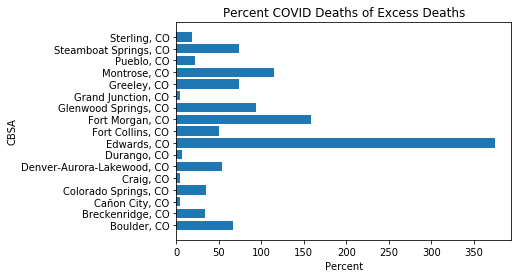

In [42]:
# Plot of Percent of COVID Deaths of Excess Deaths by CBSA
percentCOVID = np.array(covidCBSA)/np.array(excessDeathCBSAMarApr) * 100
x_pos = np.arange(len(list(dictCBSA.keys())))
plt.barh(x_pos, percentCOVID, align='center')
plt.yticks(x_pos, list(dictCBSA.keys()))
plt.ylabel('CBSA')
plt.xlabel('Percent')
plt.title('Percent COVID Deaths of Excess Deaths')
plt.show()

/Users/JayChandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


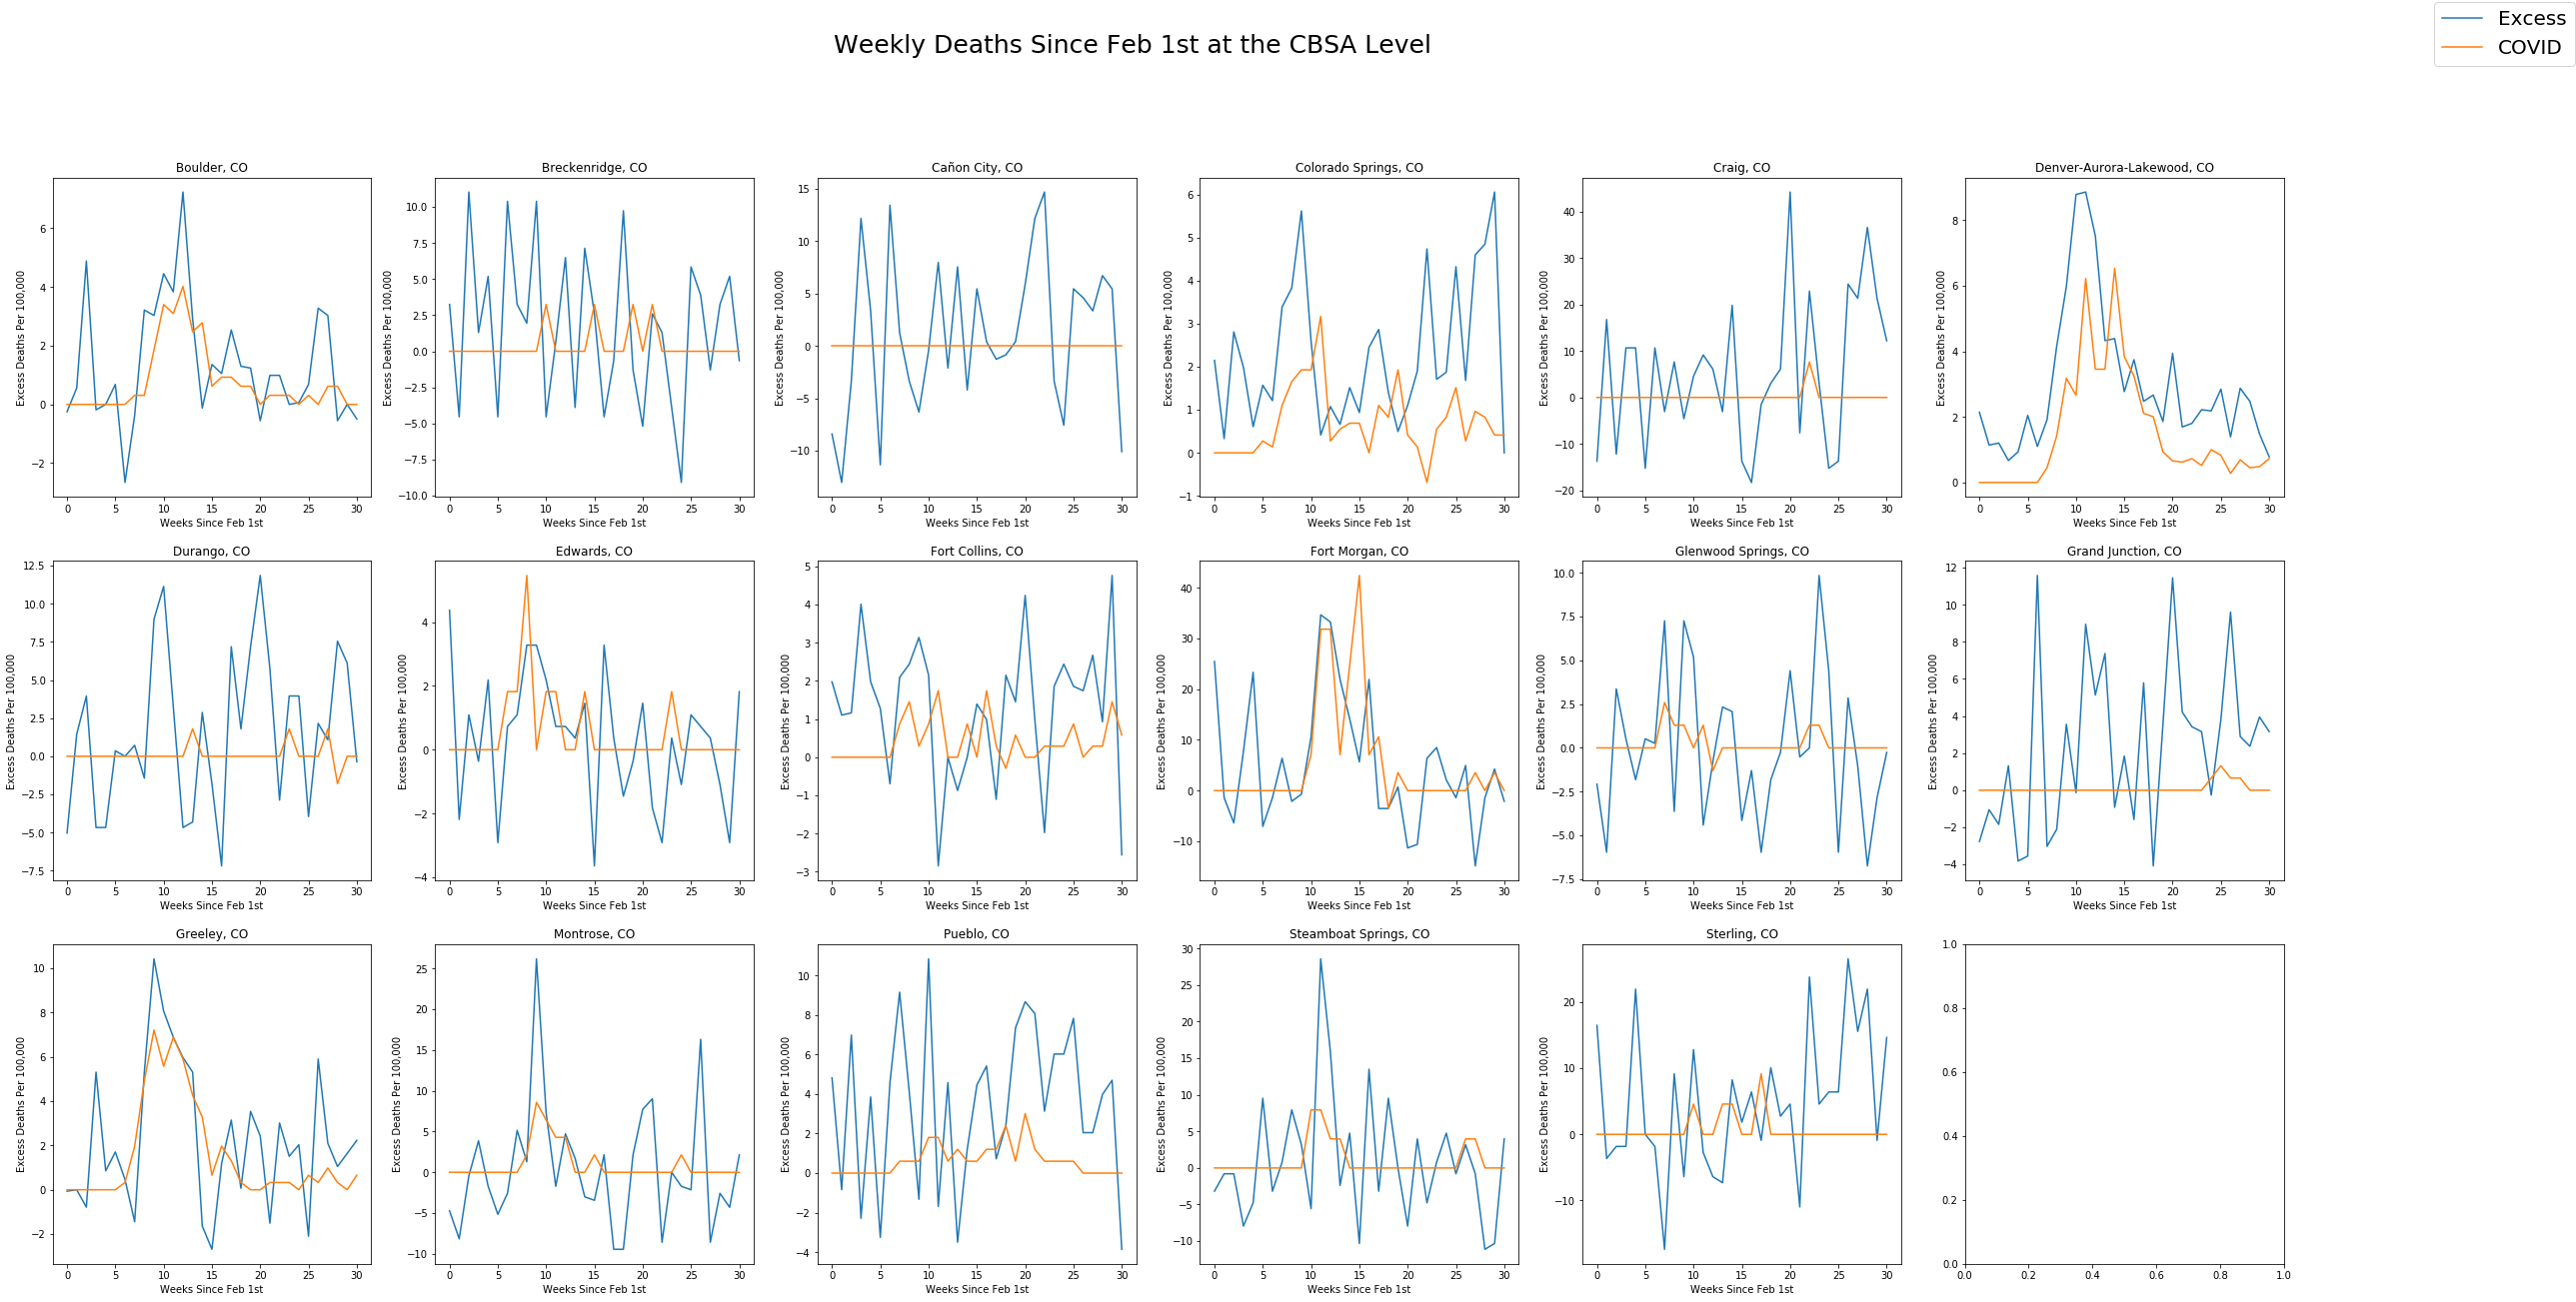

In [43]:
# Weekly Excess Deaths and COVID Deaths by CBSA
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (40, 20))
index = 0
for row in ax:
    for col in row:
        if index == 17:
            break
        l1 = col.plot(excessDeathCBSAWeekPop[index, :])[0]
        l2 = col.plot(weeklyCOVIDCBSAPop[index, :])[0]
        col.set_title(list(dictCBSA.keys())[index])
        col.set(xlabel="Weeks Since Feb 1st", ylabel='Excess Deaths Per 100,000')
        index += 1
fig.suptitle("Weekly Deaths Since Feb 1st at the CBSA Level", fontsize = 25)
fig.legend([l1, l2],
           labels=['Excess', 'COVID'],
           loc="upper right",   
           borderaxespad=0.1, 
           prop={'size': 20}
           )
plt.savefig('row_col_total_week_CBSA.png')
plt.show(fig)

/Users/JayChandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  app.launch_new_instance()


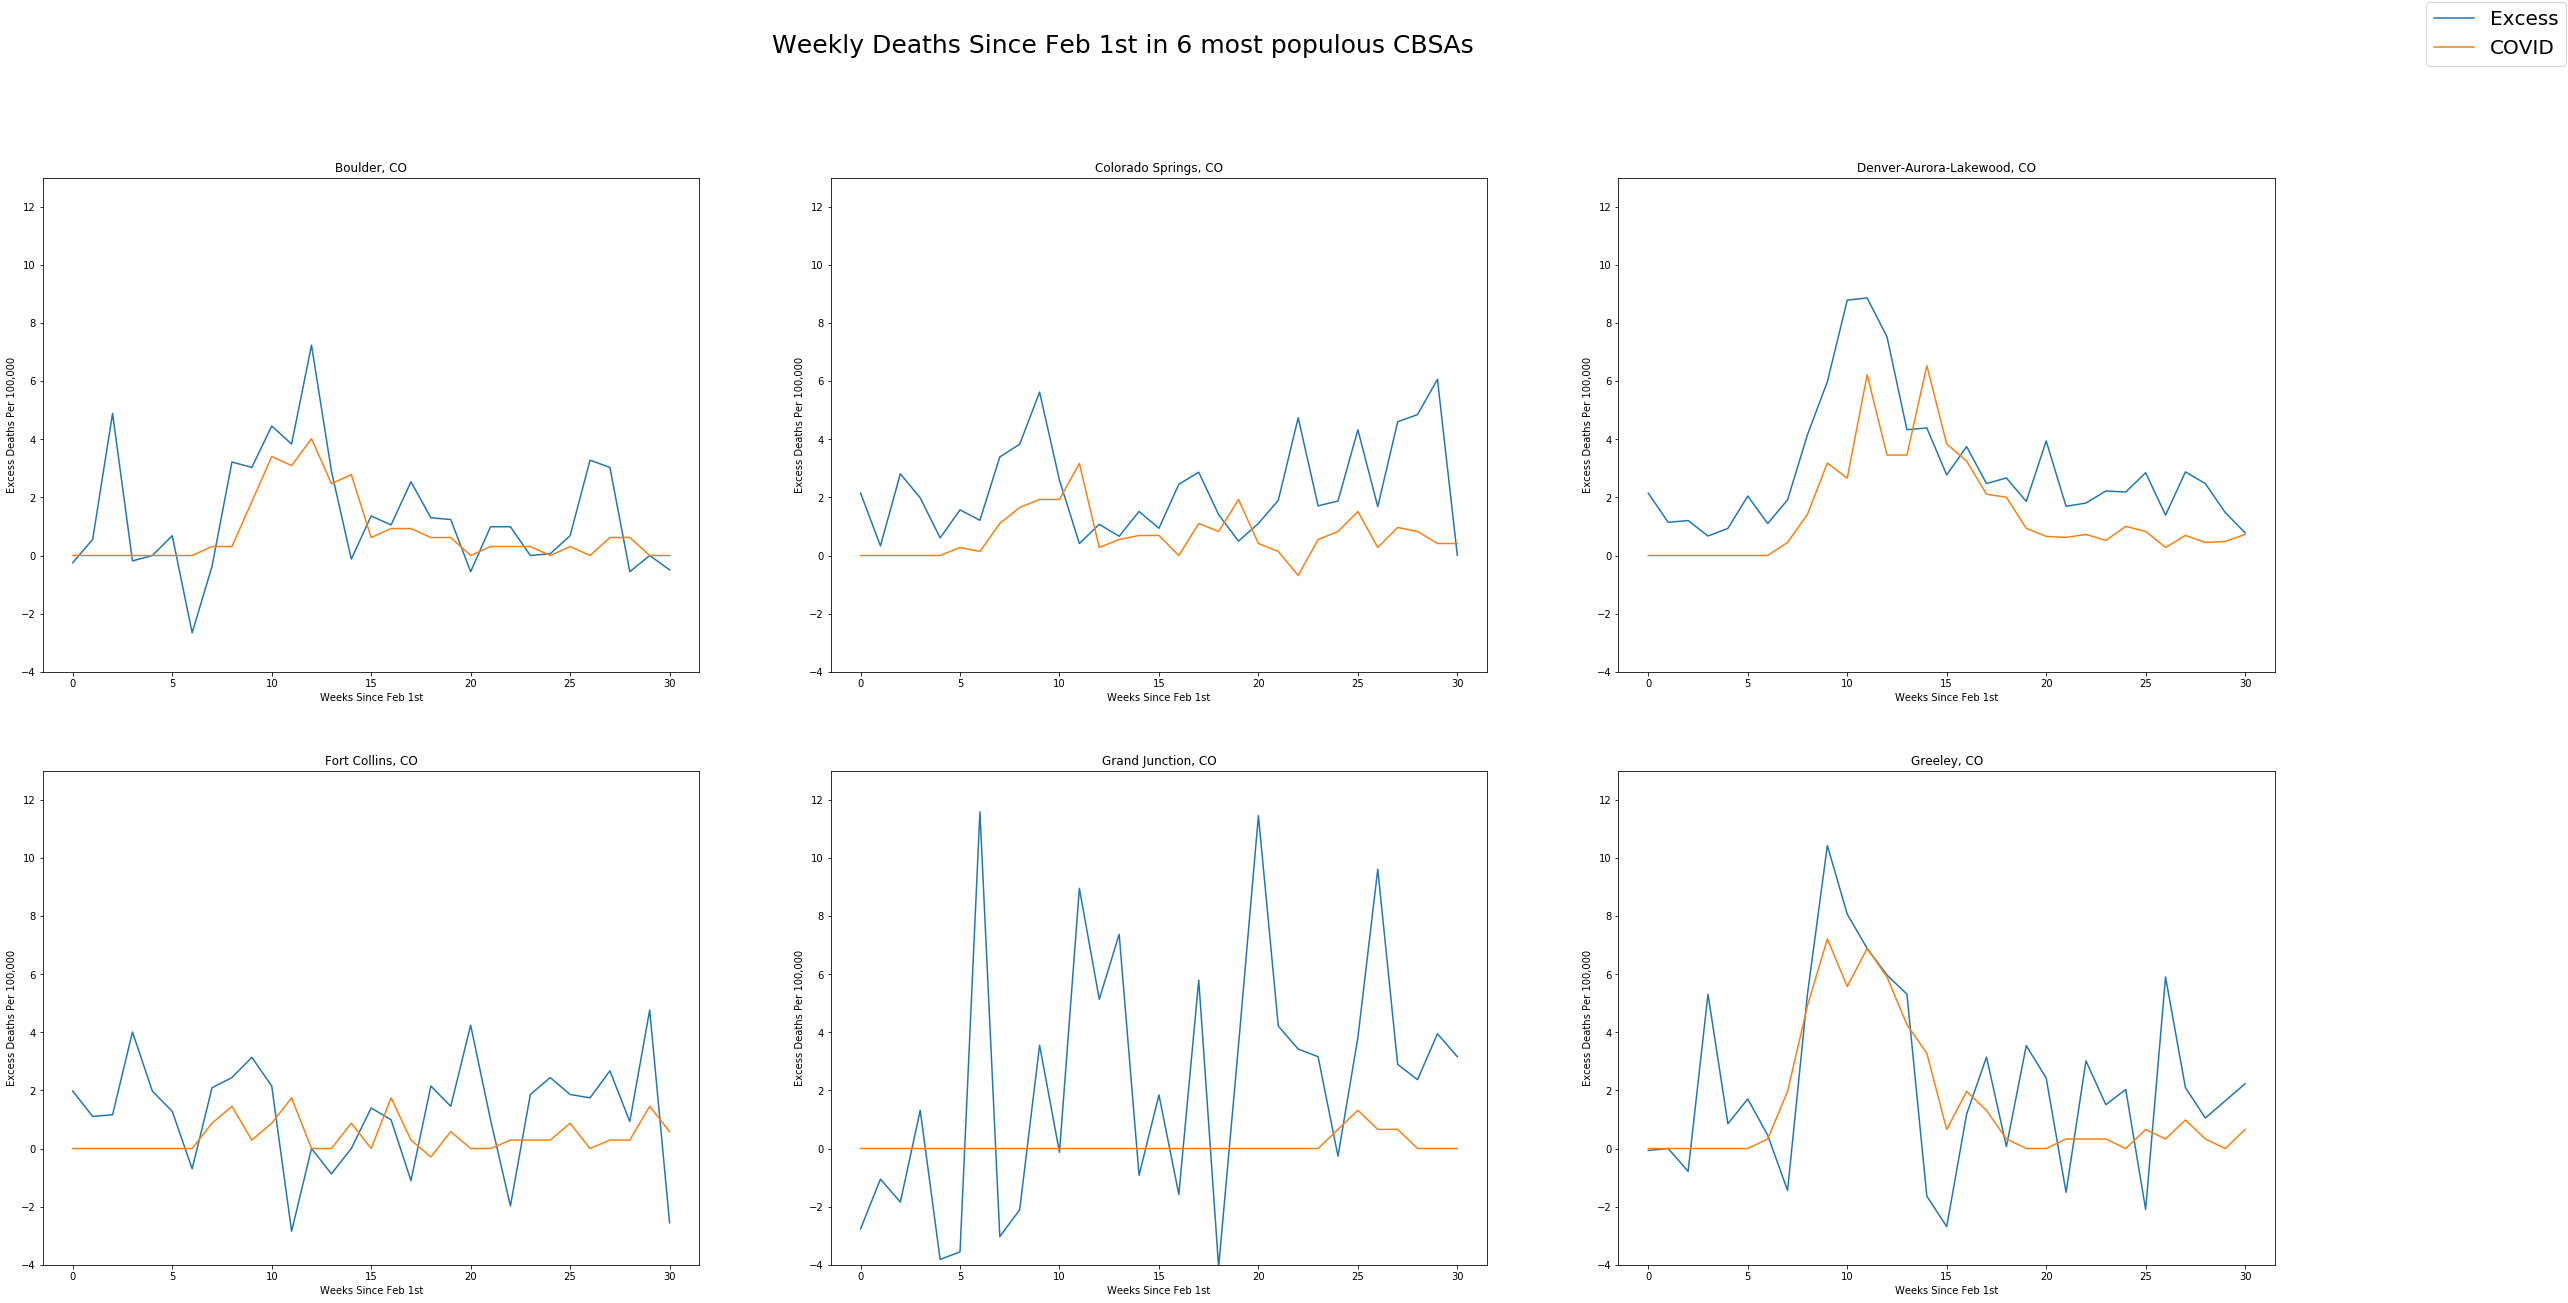

In [44]:
# Weekly Deaths in the 6 most populous CBSAs
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (40, 20))
index = 0
for row in ax:
    for col in row:
        col.plot(excessDeathCBSAWeekPop[includeCBSA][index, :])[0]
        col.plot(weeklyCOVIDCBSAPop[includeCBSA][index, :])[0]
        col.set_title(np.array((list(dictCBSA.keys())))[includeCBSA][index])
        col.set(xlabel="Weeks Since Feb 1st", ylabel='Excess Deaths Per 100,000', ylim = (-4, 13))
        index += 1
fig.suptitle("Weekly Deaths Since Feb 1st in 6 most populous CBSAs", fontsize = 25)
fig.legend([l1, l2],
           labels=['Excess', 'COVID'],
           loc="upper right",   
           borderaxespad=0.1, 
           prop={'size': 20}
           )
plt.savefig('row_col_total_week_CBSA_simple.png')
plt.show(fig)

/Users/JayChandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


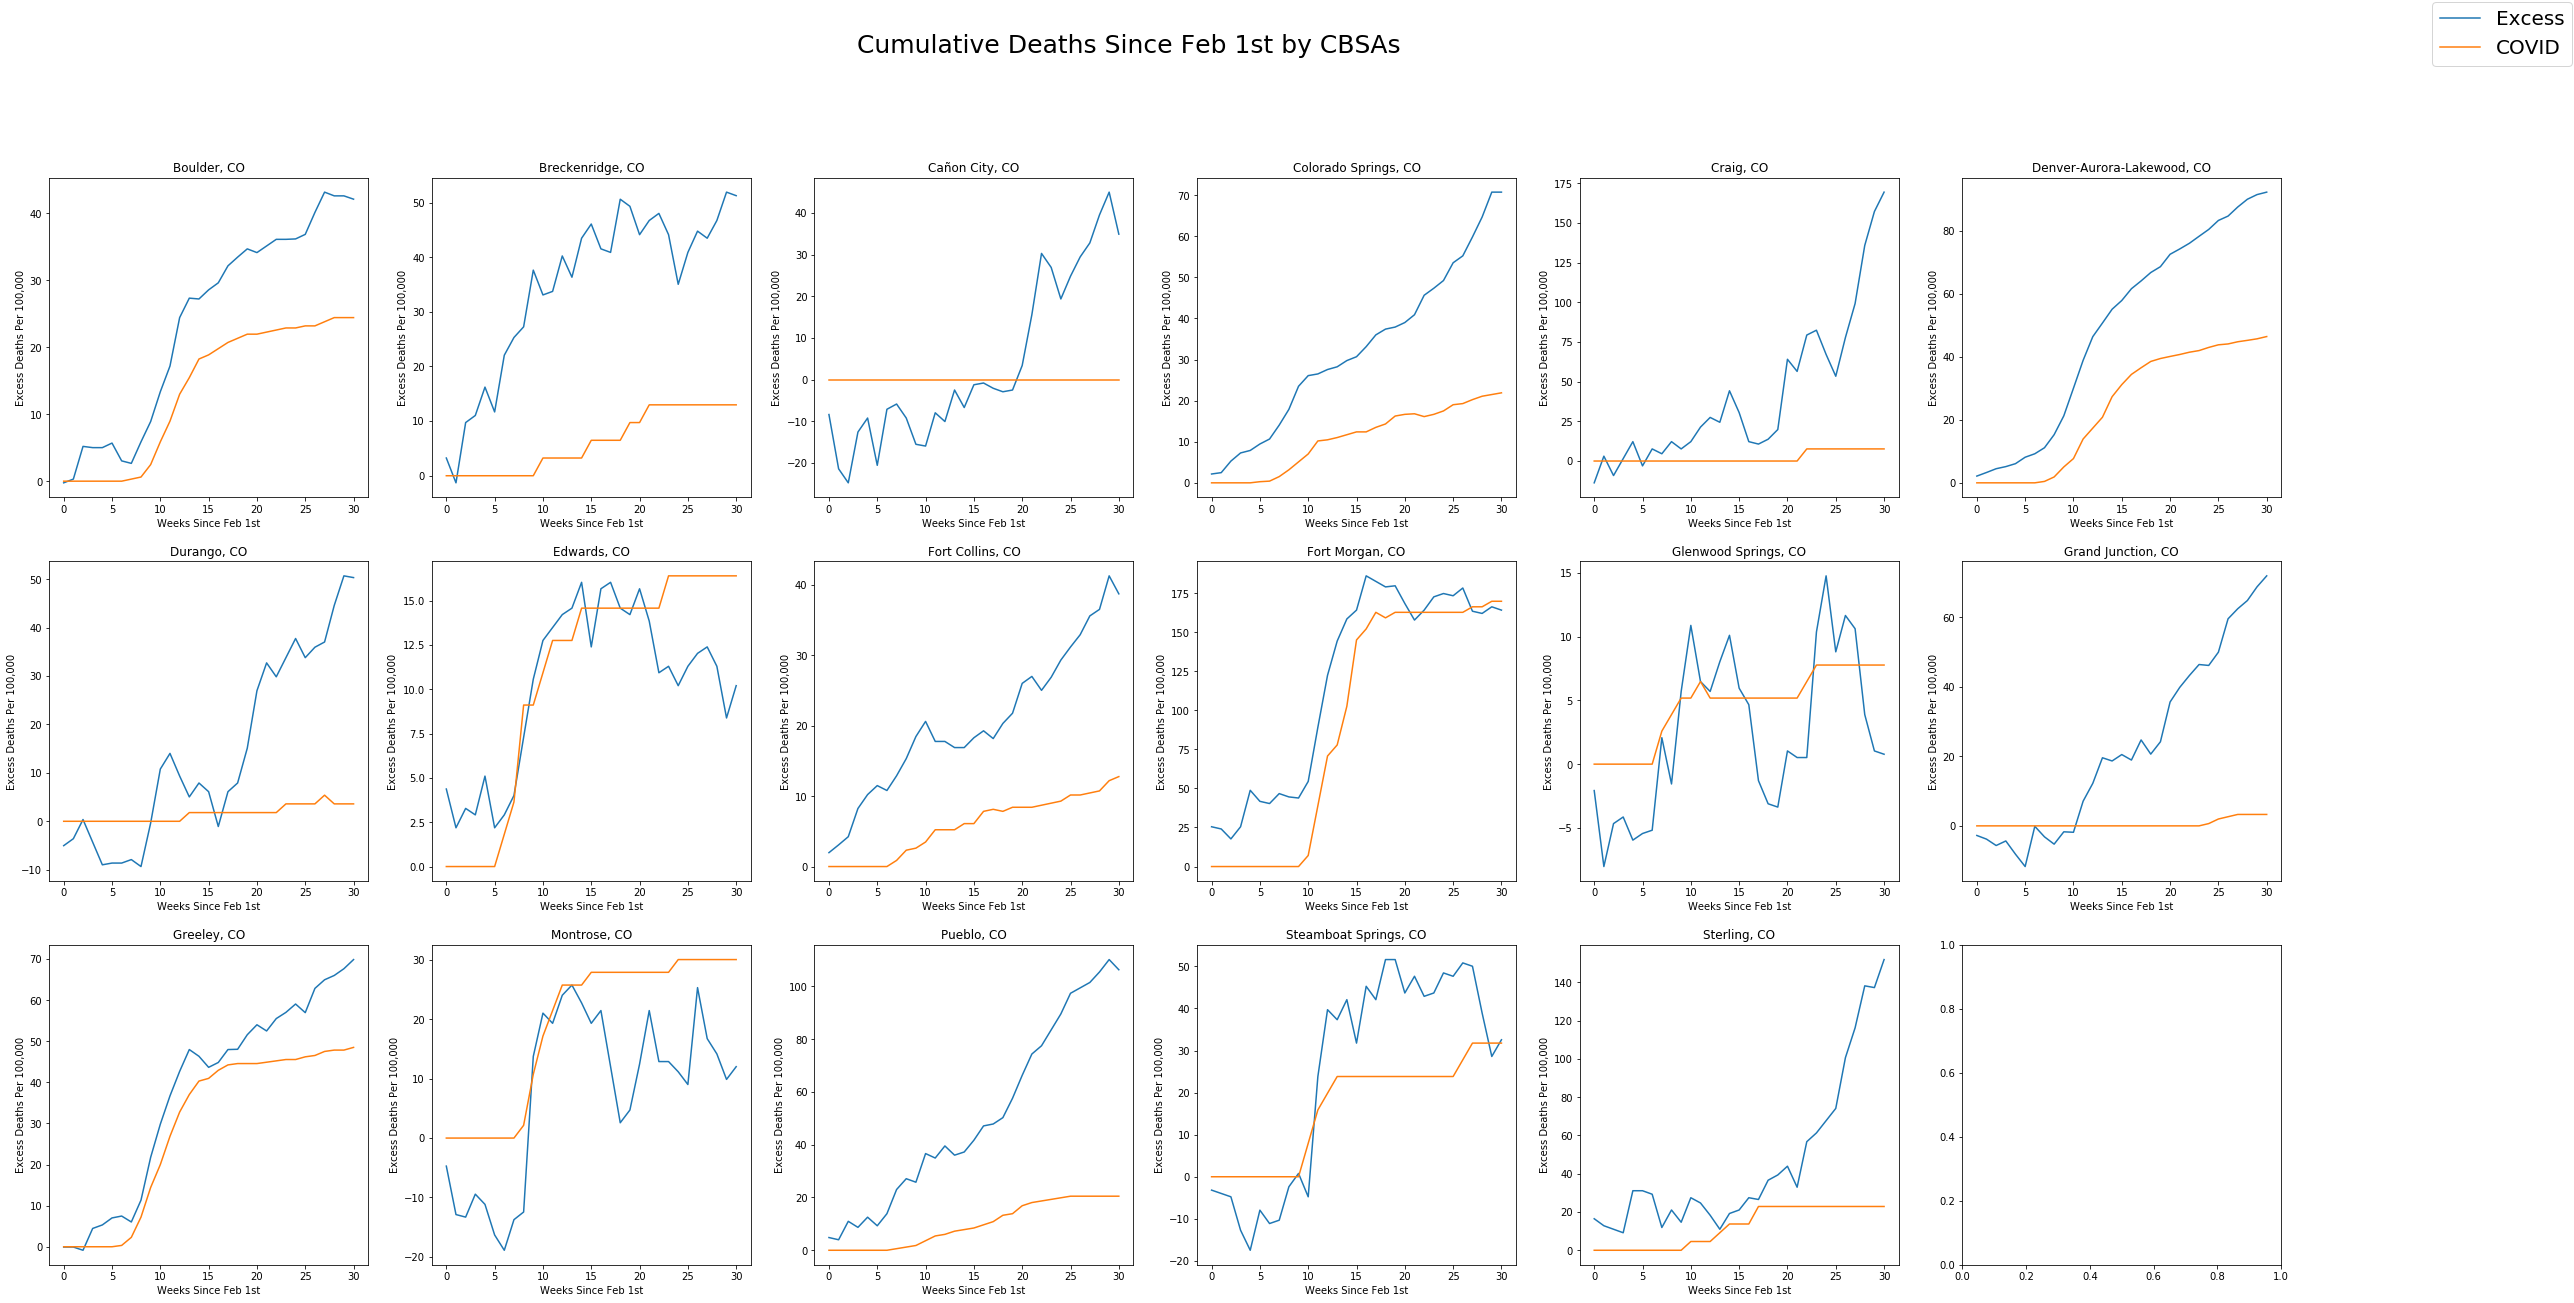

In [45]:
# Cumulative Excess Deaths by CBSA
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (40, 20))
index = 0
for row in ax:
    for col in row:
        if index == 17:
            break
        col.plot(cumExcessDeathsCBSAWeekPop[index, :])[0]
        col.plot(cumulativeCOVIDCBSAPop[index, :])[0]
        col.set_title(np.array((list(dictCBSA.keys())))[index])
        col.set(xlabel="Weeks Since Feb 1st", ylabel='Excess Deaths Per 100,000')
        index += 1
fig.suptitle("Cumulative Deaths Since Feb 1st by CBSAs", fontsize = 25)
fig.legend([l1, l2],
           labels=['Excess', 'COVID'],
           loc="upper right",   
           borderaxespad=0.1, 
           prop={'size': 20}
           )
plt.savefig('row_col_total_week_CBSA_simple.png')
plt.show(fig)

/Users/JayChandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  app.launch_new_instance()


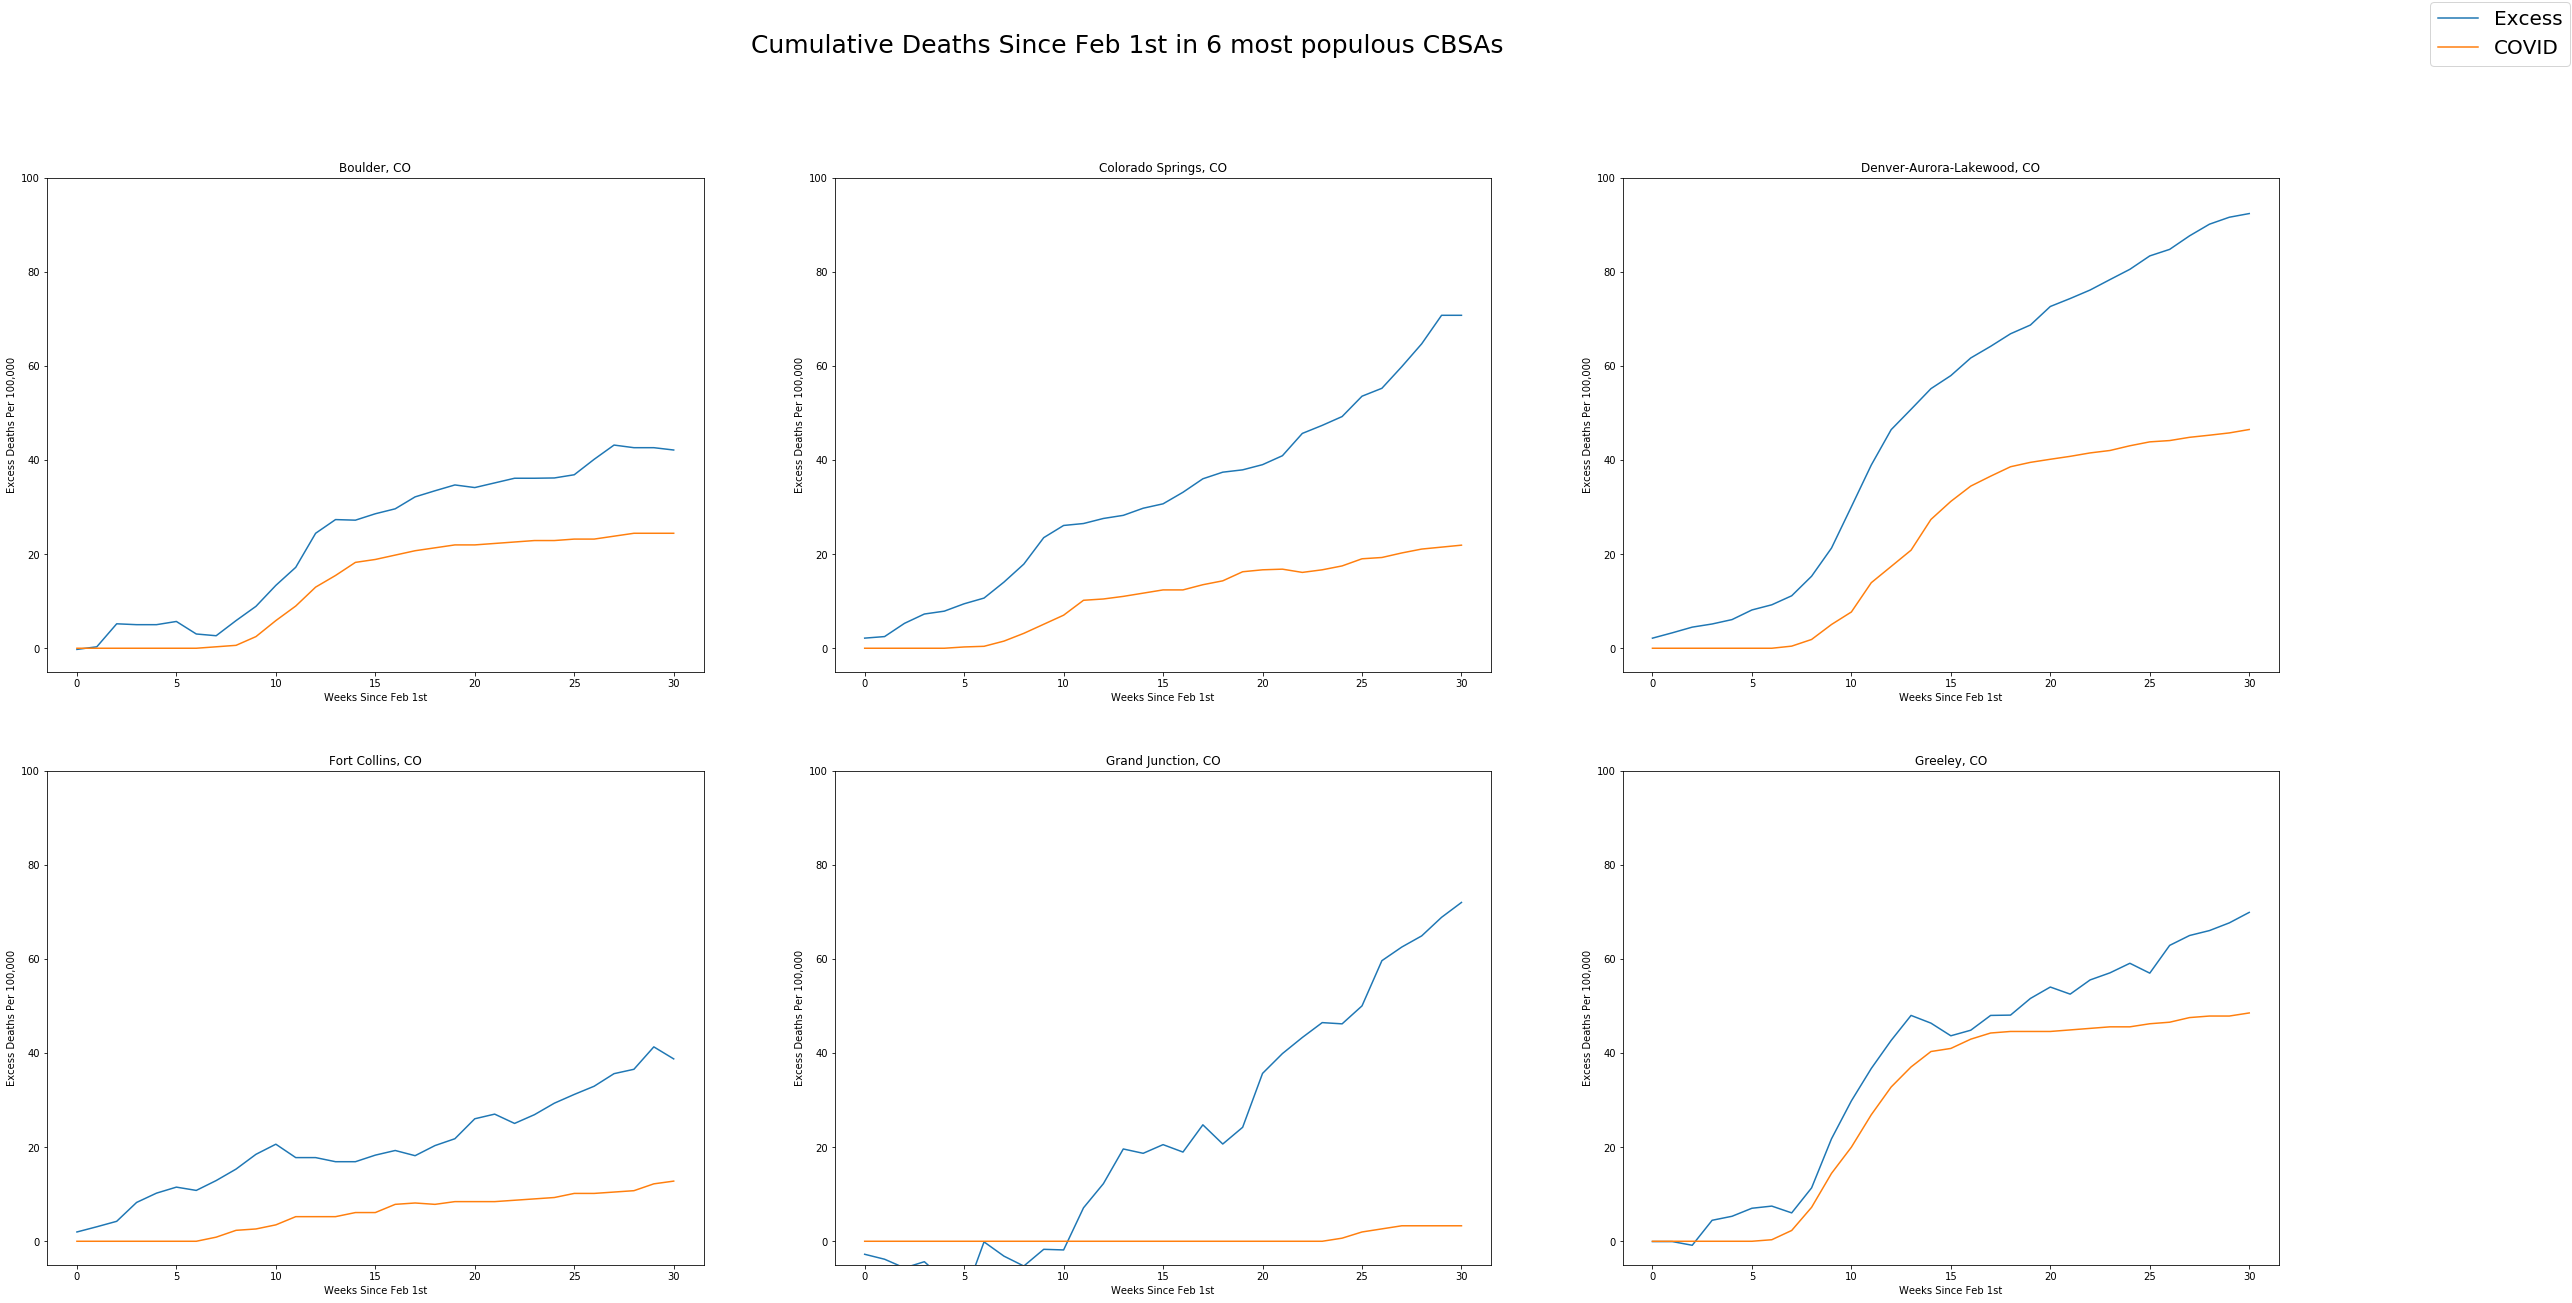

In [46]:
# Cumulative Deaths in the 6 most populous CBSAs
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (40, 20))
index = 0
for row in ax:
    for col in row:
        col.plot(cumExcessDeathsCBSAWeekPop[includeCBSA][index, :])[0]
        col.plot(cumulativeCOVIDCBSAPop[includeCBSA][index, :])[0]
        col.set_title(np.array((list(dictCBSA.keys())))[includeCBSA][index])
        col.set(xlabel="Weeks Since Feb 1st", ylabel='Excess Deaths Per 100,000', ylim = (-5, 100))
        index += 1
fig.suptitle("Cumulative Deaths Since Feb 1st in 6 most populous CBSAs", fontsize = 25)
fig.legend([l1, l2],
           labels=['Excess', 'COVID'],
           loc="upper right",   
           borderaxespad=0.1, 
           prop={'size': 20}
           )
plt.savefig('row_col_total_week_CBSA_simple.png')
plt.show(fig)

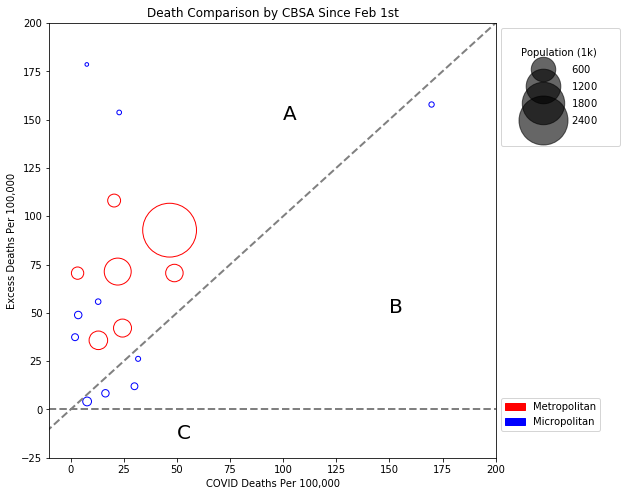

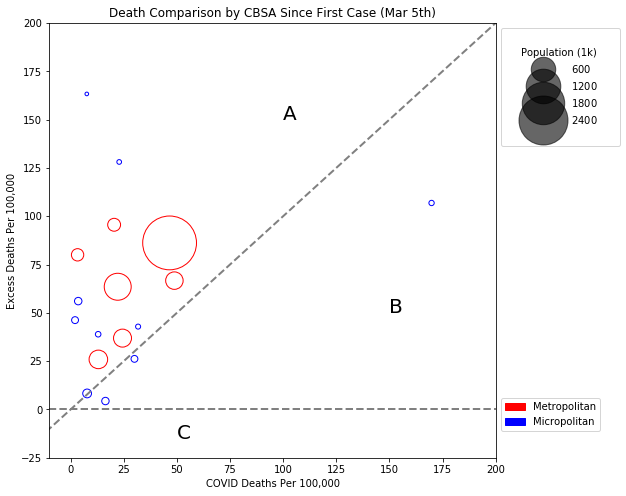

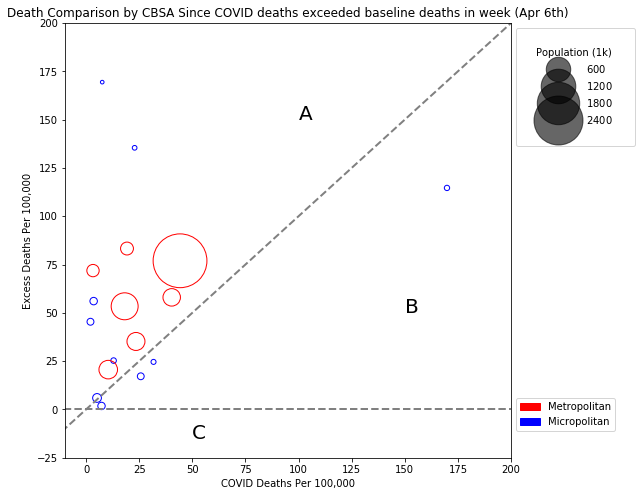

In [47]:
# Micropolitan vs Metropolitan Designation
color = []
for element in cumPop:
    if element > 1.45:
        color.append('r')
    else:
        color.append('b')
    
red_patch = mpatches.Patch(color='red', label='Metropolitan')
blue_patch = mpatches.Patch(color='blue', label='Micropolitan')

# Figures for Excess Mortality vs COVID Deaths
fig, ax = plt.subplots(figsize = (8,8))
scatter = ax.scatter(covidCBSAPop, excessDeathCBSAPop, edgecolor = color, s = np.array(cumPop) * 100, facecolors='none')
# for i, txt in enumerate(dictCBSA.keys()):
#     if covidCBSAPop[i] > 35 or excessDeathCBSAPop[i] >50:
#         if txt == 'Steamboat Springs, CO':
#             ax.annotate(txt, (covidCBSAPop[i], excessDeathCBSAPop[i]), textcoords="offset points", xytext=(5,-12))
#         elif txt == 'Fort Morgan, CO':
#             ax.annotate(txt, (covidCBSAPop[i], excessDeathCBSAPop[i]), textcoords="offset points", xytext=(-25,-15))
#         else:
#             ax.annotate(txt, (covidCBSAPop[i], excessDeathCBSAPop[i]), textcoords="offset points", xytext=(2,5))
ax.hlines(y=0, xmin=-100, xmax=500, linewidth=2, color='grey', linestyle= '--')
xpoints = ypoints = range(int(ax.get_xlim()[0]), int(ax.get_xlim()[1]))
ax.plot(xpoints, ypoints, linestyle='--', color='grey', lw=2, scalex=False, scaley=False)
handles, labelsSize = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)

legend2 = ax.legend(handles, labelsSize, title="Population (1k) ", loc='upper left', bbox_to_anchor=(1, 1), borderpad = 2)
for t in legend2.get_texts():
    t.set_ha('left')
    t.set_position((10,0))
    
ax.add_artist(legend2)
plt.xlabel('COVID Deaths Per 100,000')
plt.ylabel('Excess Deaths Per 100,000')
plt.xlim(-10, 200)
plt.ylim(-25, 200)
plt.title('Death Comparison by CBSA Since Feb 1st')
plt.annotate('A', (100, 150), fontsize=20)
plt.annotate('B', (150, 50), fontsize=20)
plt.annotate('C', (50, -15), fontsize=20)
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(1, 0.15))
plt.show()

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(covidCBSAPop, excessDeathCBSAMarAprPop, edgecolor = color, s = np.array(cumPop) * 100, facecolor = 'none')
# for i, txt in enumerate(dictCBSA.keys()):
#     if covidCBSAPop[i] > 40 or excessDeathCBSAMarAprPop[i] > 70:
#         if txt == 'Steamboat Springs, CO':
#             ax.annotate(txt, (covidCBSAPop[i], excessDeathCBSAMarAprPop[i]), textcoords="offset points", xytext=(5,-12))
#         elif txt == 'Fort Morgan, CO':
#             ax.annotate(txt, (covidCBSAPop[i], excessDeathCBSAMarAprPop[i]), textcoords="offset points", xytext=(-25,-15))
#         else:
#             ax.annotate(txt, (covidCBSAPop[i], excessDeathCBSAMarAprPop[i]), textcoords="offset points", xytext=(2,5))
ax.hlines(y=0.2, xmin=-100, xmax=500, linewidth=2, color='grey', linestyle= '--')
xpoints = ypoints = range(int(ax.get_xlim()[0]), int(ax.get_xlim()[1]))
ax.plot(xpoints, ypoints, linestyle='--', color='grey', lw=2, scalex=False, scaley=False)

handles, labelsSize = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)

legend2 = ax.legend(handles, labelsSize, title="Population (1k) ", loc='upper left', bbox_to_anchor=(1, 1), borderpad = 2)
for t in legend2.get_texts():
    t.set_ha('left')
    t.set_position((10,0))
    
ax.add_artist(legend2)

plt.xlabel('COVID Deaths Per 100,000')
plt.ylabel('Excess Deaths Per 100,000')
plt.xlim(-10, 200)
plt.ylim(-25, 200)
plt.title('Death Comparison by CBSA Since First Case (Mar 5th)')
plt.annotate('A', (100, 150), fontsize=20)
plt.annotate('B', (150, 50), fontsize=20)
plt.annotate('C', (50, -15), fontsize=20)
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(1, 0.15))
plt.show()

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(covidAprEndCBSAPop, excessDeathCBSAPosPop, edgecolor = color, s= np.array(cumPop) * 100, facecolors='none')
# for i, txt in enumerate(dictCBSA.keys()):
#     if covidAprEndCBSAPop[i] > 50 or excessDeathCBSAPosPop[i] > 40:
#         if txt == 'Steamboat Springs, CO':
#             ax.annotate(txt, (covidAprEndCBSAPop[i], excessDeathCBSAPosPop[i]), textcoords="offset points", xytext=(5,-12))
#         elif txt == 'Fort Morgan, CO':
#             ax.annotate(txt, (covidAprEndCBSAPop[i], excessDeathCBSAPosPop[i]), textcoords="offset points", xytext=(-25,-15))
#         else:
#             ax.annotate(txt, (covidAprEndCBSAPop[i], excessDeathCBSAPosPop[i]), textcoords="offset points", xytext=(2,5))
ax.hlines(y=0.2, xmin=-100, xmax=500, linewidth=2, color='grey', linestyle= '--')
xpoints = ypoints = range(int(ax.get_xlim()[0]), int(ax.get_xlim()[1]))
ax.plot(xpoints, ypoints, linestyle='--', color='grey', lw=2, scalex=False, scaley=False)

handles, labelsSize = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)

legend2 = ax.legend(handles, labelsSize, title="Population (1k) ", loc='upper left', bbox_to_anchor=(1, 1), borderpad = 2)
for t in legend2.get_texts():
    t.set_ha('left')
    t.set_position((10,0))
    
ax.add_artist(legend2)

plt.xlabel('COVID Deaths Per 100,000')
plt.ylabel('Excess Deaths Per 100,000')
plt.xlim(-10, 200)
plt.ylim(-25, 200)
plt.annotate('A', (100, 150), fontsize=20)
plt.annotate('B', (150, 50), fontsize=20)
plt.annotate('C', (50, -15), fontsize=20)
plt.title('Death Comparison by CBSA Since COVID deaths exceeded baseline deaths in week (Apr 6th)')
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(1, 0.15))
plt.show()

In [48]:
# Creates a Dataframe with CBSA Excess Death Data
dictCBSAExcel = dict(zip(list(dictCBSA.keys()), excessDeathCBSAMarAprPop))
Struct = pd.DataFrame.from_dict(dictCBSAExcel, orient='index', columns=['First Case'])
Struct.insert(1, column = 'Feb 1', value = excessDeathCBSAPop)
Struct.insert(2, column = 'Since Apr 6th', value = excessDeathCBSAPosPop)
Struct.insert(3, column = "Population", value = cumPop)

writer = pd.ExcelWriter('Excess_Mortality_CBSA.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Struct.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [49]:
# Creates a Dataframe with CBSA COVID Death Data
dictCOVIDCExcel = dict(zip(list(dictCBSA.keys()), covidCBSAPop))
Struct = pd.DataFrame.from_dict(dictCOVIDCExcel, orient='index', columns=['JHU'])
Struct.insert(1, column = 'JHU April 6th Onwards', value = covidAprEndCBSAPop)
Struct.insert(2, column = 'Death_Cert', value = covid2020CBSAPop)

writer = pd.ExcelWriter('COVID_CBSA.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Struct.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

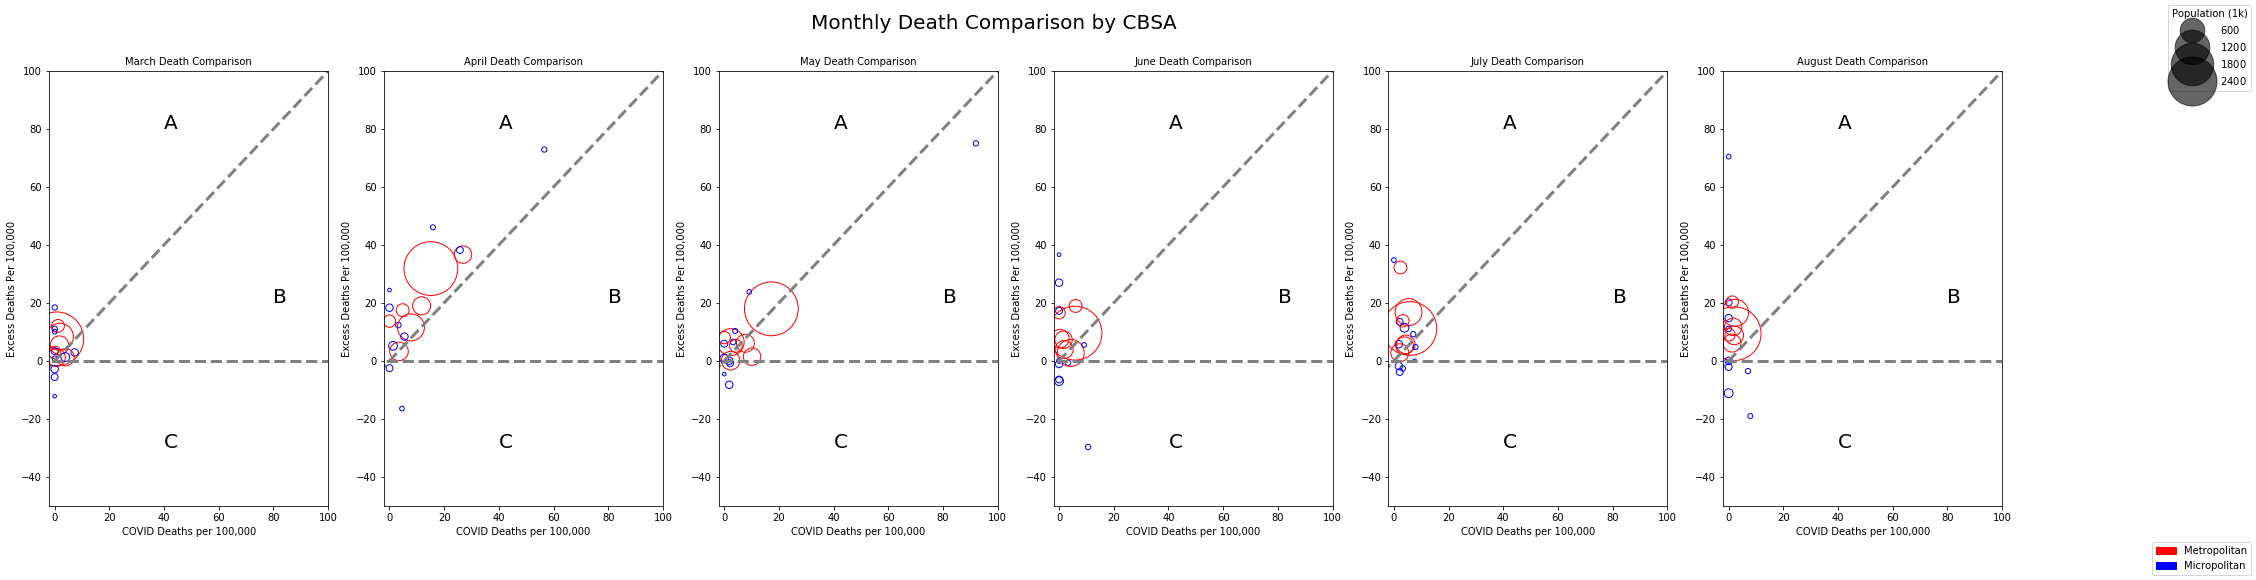

In [50]:
# Monthly CBSA Excess Mortality vs COVID Deaths 
combinedCOVID = [marCOVIDCBSAPop, aprCOVIDCBSAPop, mayCOVIDCBSAPop, juneCOVIDCBSAPop, julyCOVIDCBSAPop, augCOVIDCBSAPop]
combinedExcess = [excessDeathCBSAMarPop, excessDeathCBSAAprPop, excessDeathCBSAMayPop, excessDeathCBSAJunePop, excessDeathCBSAJulyPop, excessDeathCBSAAugPop]
red_patch = mpatches.Patch(color='red', label='Metropolitan')
blue_patch = mpatches.Patch(color='blue', label='Micropolitan')
Months = ['March', 'April', 'May', 'June', 'July', 'August']
# Graphs COVID Deaths vs Excess Deaths in March
def MarPlot (part, shade):
    fig, ax= plt.subplots(nrows = 1, ncols = 6, figsize = (35, 8))
    k = 0
    for col in ax:
        scatter = col.scatter(combinedCOVID [k], combinedExcess[k], edgecolors = color, facecolors='none', s = np.array(cumPop) * 100)
        col.hlines(y=0, xmin=-100, xmax=500, linewidth=3, color='grey', linestyle= '--')
        xpoints = ypoints = col.get_xlim()
        col.plot(xpoints, ypoints, linestyle='--', color='grey', lw=3, scalex=False, scaley=False)
        if shade:
            if part == 1:
                col.fill_between(xpoints, 0, -1000, facecolor='g', alpha=0.2)
            elif part == 2:
                col.fill_between(xpoints, 0, ypoints, facecolor='g', alpha=0.2)
            elif part == 3:
                col.fill_between(xpoints, ypoints, 1000, facecolor='g', alpha=0.2)
        col.set_title(Months[k] + ' Death Comparison', fontsize = 10)
        col.set(xlim = (-2, 100), ylim = (-50, 100))
        col.set_xlabel("COVID Deaths per 100,000", fontsize = 10)
        col.set_ylabel('Excess Deaths Per 100,000', fontsize = 10)
        col.tick_params(axis='both', which='major', labelsize=10)
        col.annotate('A', (40, 80), fontsize=20)
        col.annotate('B', (80, 20), fontsize=20)
        col.annotate('C', (40, -30), fontsize=20)
        handles, labelsSize = scatter.legend_elements(prop="sizes", alpha=0.6, num=5) 
        k += 1

    fig.suptitle("Monthly Death Comparison by CBSA", fontsize = 20)
    plt.savefig('Monthly Excess Deaths.png')
    legend2 = fig.legend(handles, labelsSize, loc='upper right', title = 'Population (1k)')
    for t in legend2.get_texts():
        t.set_ha('left')
        t.set_position((10,0))
    fig.legend(handles=[red_patch, blue_patch], loc='lower right')
    plt.show(fig)

MarPlot(3, False)

In [51]:
# Creates a Dataframe with CBSA Monthly COVID Data
dictCOVIDLong = dict(zip(list(dictCBSA.keys()), marCOVIDCBSAPop))
Struct = pd.DataFrame.from_dict(dictCOVIDLong, orient='index', columns=['March'])
for i, item in enumerate(combinedCOVID[1:]):
    Struct.insert(i + 1, column = Months[i + 1], value = item)

writer = pd.ExcelWriter('COVID_Long_CBSA.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Struct.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [52]:
# Creates a Dataframe with CBSA Monthly Excess Death Data
dictExcessLong = dict(zip(list(dictCBSA.keys()), excessDeathCBSAMarPop))
Struct = pd.DataFrame.from_dict(dictExcessLong, orient='index', columns=['March'])
for i, item in enumerate(combinedExcess[1:]):
    Struct.insert(i + 1, column = Months[i + 1], value = item)

writer = pd.ExcelWriter('Excess_Long_CBSA.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
Struct.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [53]:
# Naive Correlation Analysis with CCVI Indicators at the CBSA Level
CCVI = pd.read_excel(url)
overallCCVI = CCVI['Theme 4'].values.astype(float)
testCorr = []
for key in dictCBSA:
    testCorr.append(sum ([overallCCVI[j] for j in dictCBSA[key]]) / len(dictCBSA[key]))
result = scipy.stats.spearmanr(testCorr, excessDeathCBSAMarApr)
result2 = scipy.stats.kendalltau(testCorr, excessDeathCBSAMarApr)
result3 = scipy.stats.linregress(testCorr, excessDeathCBSAMarApr)

In [54]:
# Automation of above correlation analysis for the different columns
url = 'csv_data/CCVI.xlsx'
CCVI = pd.read_excel(url)
Track = []
Lin = []
Spearman = []
Kendall = []

CCVIAgg = []
for i in range (4, len(CCVI.columns)):
    for key in dictCBSA:
        CCVIAgg.append(sum ([CCVI.iloc[j, i] for j in dictCBSA[key]]) / len(dictCBSA[key]))
CCVIAgg = np.array(CCVIAgg).reshape(7, 17)

for i in range (7):
    Lin.append((round(scipy.stats.linregress(CCVIAgg[i, :], excessDeathCBSAMarApr).rvalue, 3), 
               round(scipy.stats.linregress(CCVIAgg[i, :], excessDeathCBSAMarApr).pvalue, 3)))
    Spearman.append((round(scipy.stats.spearmanr(CCVIAgg[i, :], excessDeathCBSAMarApr)[0], 3), 
               round(scipy.stats.spearmanr(CCVIAgg[i, :], excessDeathCBSAMarApr)[1], 3)))
    Kendall.append((round(scipy.stats.kendalltau(CCVIAgg[i, :], excessDeathCBSAMarApr)[0], 3), 
               round(scipy.stats.kendalltau(CCVIAgg[i, :], excessDeathCBSAMarApr)[1], 3)))

corr = { 
        'Index': list(CCVI.columns.values)[4:],
        'Linear Correlation, p-value': Lin,
        'Spearman Rank Correlation, p-value': Spearman,
        'Kendall Tau Correlation, p-value': Kendall
        }

dfCorr = pd.DataFrame.from_dict(corr)
writer = pd.ExcelWriter('CorrelationCBSA.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
dfCorr.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# Age-Based Results

In [55]:
# Population by Age
fullYear = [2014, 2015, 2016, 2017, 2018, 2019]
path = 'csv_data/county_popAge_data2.csv'
raw = pd.read_csv(path, error_bad_lines=False)
raw['MALE'] = np.array([p.replace(',', '') for p in raw['MALE']])
raw['FEMALE'] = np.array([p.replace(',', '') for p in raw['FEMALE']])
sum_gender = raw["MALE"].astype(int) + raw["FEMALE"].astype(int)
raw['sumPop'] = sum_gender

# Population from 2014 to 2019
popOArr = np.zeros((numCounty, numYears))
popYArr = np.zeros((numCounty, numYears))
for i, year in enumerate(fullYear):
    raw2 = raw[raw['YEAR'] == year]
    popY = raw2.loc[raw2['AGE'] == '0 to 65']
    popO = raw2.loc[raw2['AGE'] == '65 to 110']
    popY = popY['sumPop'].values.astype(float)
    popO = popO['sumPop'].values.astype(float)
    popY = popY /100000
    popO = popO /100000
    popOArr[:, i] = popO
    popYArr[:, i] = popY

# 2017 fixed population
popO = popOArr[:, 3]
popY = popYArr[:, 3]

In [56]:
#Pop for All Age Groups
path = 'csv_data/age_data1V2.csv'
raw = pd.read_csv(path, error_bad_lines=False)
ageUnique = sorted(list(set(raw['AGE'].values)))
ageUnique.pop(1)
ageUnique.insert(2, ageUnique[6])
ageUnique.pop(7)
ageUnique.pop(len(ageUnique) - 1)
ageUnique.append('85 to 110')
raw['MALE'] = np.array([p.replace(',', '') for p in raw['MALE']])
raw['FEMALE'] = np.array([p.replace(',', '') for p in raw['FEMALE']])
sum_gender = raw["MALE"].astype(int) + raw["FEMALE"].astype(int)
raw['sumPop'] = sum_gender
popAll = []
for age in ageUnique:
    popInd = raw.loc[raw['AGE'] == age]
    popInd = popInd['sumPop'].values.astype(float)
    popAll.append(popInd /100000)
popAll = np.array(popAll)

In [57]:
#Pop for Sex
path = 'csv_data/county_popSex_data2.csv'
popMaleArr = np.zeros((numCounty, numYears))
popFeArr = np.zeros((numCounty, numYears))
for i, year in enumerate(fullYear):
    raw = pd.read_csv(path, error_bad_lines=False)
    raw = raw[raw['YEAR'] == year]
    raw['MALE'] = np.array([p.replace(',', '') for p in raw['MALE']]).astype(float)
    raw['FEMALE'] = np.array([p.replace(',', '') for p in raw['FEMALE']]).astype(float)
    popM = raw['MALE'].values/100000
    popF = raw['FEMALE'].values/100000
    popMaleArr[:, i] = popM
    popFeArr[:, i] = popF
popM = popMaleArr[:, 3]
popM = popMaleArr[:, 3]

In [58]:
# Age-based
path = 'csv_data/co_deaths_daysum_20 2.csv'
raw = pd.read_csv(path, error_bad_lines=False)

# Ensures that all counties are represented even if they have no deaths
for i in list(labelsDict.keys()) + [8000]:
    raw = raw.append({'fips': i, 'year':'2020', 'dday': 500, 'sexgr': 'Total - Both Sexes', 'racegr': 'All races', 
                 'hispgr': 'All ethnicities', 'agegr': '65-74', 'd': 0, 'mva': 0, 'wrk': 0, 'uod': 0, 'sui': 0,
                 'hom': 0, 'flu': 0, 'pne': 0, 'covid': 0, 'can': 0, 'hd': 0, 'cvd': 0, 'copd': 0, 'diab': 0, 
                 'alz': 0}, ignore_index=True)
    raw = raw.append({'fips': i, 'year':'2020', 'dday': 500, 'sexgr': 'Total - Both Sexes', 'racegr': 'All races', 
                 'hispgr': 'All ethnicities', 'agegr': '0', 'd': 0, 'mva': 0, 'wrk': 0, 'uod': 0, 'sui': 0,
                 'hom': 0, 'flu': 0, 'pne': 0, 'covid': 0, 'can': 0, 'hd': 0, 'cvd': 0, 'copd': 0, 'diab': 0, 
                 'alz': 0}, ignore_index=True)

# Sums all races, sex, and ethnicity
raw = raw.loc[raw['sexgr'] == 'Total - Both Sexes']
raw = raw.loc[raw['racegr'] == 'All races']
raw = raw.loc[raw['hispgr'] == 'All ethnicities']

# Age group definition
oldList = ['65-74', '75-84', '85+']
youngList = ['0', '1-4', '5-14', '15-24', '25-34', '35-44', '45-54', '55-64']
raw = raw[raw.dday != 'Annual total']
raw['dday'] = raw['dday'].astype(int)
raw['d'] = raw['d'].astype(int)

# Deaths by time range
rawHigh = raw[raw['agegr'].isin(oldList)]
rawLow = raw[raw['agegr'].isin (youngList)]
rawLow = rawLow[rawLow['dday'].isin(list(range(32, 253)) + [500])]
rawHigh = rawHigh[rawHigh['dday'].isin(list(range(32, 253))+ [500])]
marAprRawLow = rawLow[rawLow['dday'].isin(list(range(66, 253))+ [500])]
marAprRawHigh = rawHigh[rawHigh['dday'].isin(list(range(66, 253))+ [500])]
death2020Low = rawLow.groupby('fips')['d'].sum().values.astype(int)[1:]
death2020High = rawHigh.groupby('fips')['d'].sum().values.astype(int)[1:]
marApr2020Low = marAprRawLow.groupby('fips')['d'].sum().values.astype(int)[1:]
marApr2020High = marAprRawHigh.groupby('fips')['d'].sum().values.astype(int)[1:]

# Weekly Deaths by Age Group
weekDeath2020Low = np.zeros ((numCounty, 31))
weekDeath2020High = np.zeros ((numCounty, 31))
for i in range (31):
    raw2Low = rawLow[rawLow['dday'].isin(list(range((32 + (i*7)), (32 + ((i+1)*7))))+ [500])]
    bop = raw2Low['fips'].values
    raw2High = rawHigh[rawHigh['dday'].isin(list(range((32 + (i*7)), (32 + ((i+1)*7))))+ [500])]
    weekDeathLow = raw2Low.groupby('fips')['d'].sum().values.astype(int)[1:]
    weekDeathHigh = raw2High.groupby('fips')['d'].sum().values.astype(int)[1:]
    weekDeath2020Low [:, i] = weekDeathLow
    weekDeath2020High[:, i] = weekDeathHigh

In [59]:
# Age-based baselines 2015-2019
baselineLow = np.zeros(numCounty)
baselineHigh = np.zeros(numCounty)
baselineMarAprLow = np.zeros(numCounty)
baselineMarAprHigh = np.zeros(numCounty)
baselineWeekHigh = np.zeros ((numCounty, 31))
baselineWeekLow = np.zeros ((numCounty, 31))
overallO = []
overallY = []

# Deaths each year
years = ['15', '16', '17', '18', '19']
for year in years:    
    path = 'csv_data/co_deaths_daysum_' + year + '.csv'
    raw = pd.read_csv(path, error_bad_lines=False)
    
    # Sums based on sex (no ethnicity or race in these datasets)
    raw = raw.loc[raw['sexgr'] == 'Total - Both Sexes']
    raw = raw[raw.dday != 'Annual total']
    
    # converts data to ints
    raw['dday'] = raw['dday'].astype(int)
    raw['d'] = raw['d'].astype(int)
    
    # Age Deaths by timerange
    rawHigh = raw[raw['agegr'].isin(oldList)]
    rawLow = raw[raw['agegr'].isin (youngList)]
    rawLow = rawLow[rawLow['dday'].isin(list(range(32, 253)))]
    rawHigh = rawHigh[rawHigh['dday'].isin(list(range(32, 253)))]
    marAprRawLow = rawLow[rawLow['dday'].isin(list(range(66, 253)))]
    marAprRawHigh = rawHigh[rawHigh['dday'].isin(list(range(66, 253)))]
    deathLow = rawLow.groupby('fips')['d'].sum().values.astype(int)[1:]
    deathHigh = rawHigh.groupby('fips')['d'].sum().values.astype(int)[1:]
    marAprLow = marAprRawLow.groupby('fips')['d'].sum().values.astype(int)[1:]
    marAprHigh = marAprRawHigh.groupby('fips')['d'].sum().values.astype(int)[1:]
    
    # Adds deaths to the 2015-2019 list 
    overallO.append(sum(deathHigh))
    overallY.append(sum(deathLow))
    
    # Weekly deaths by age
    weekDeathLow = np.zeros ((numCounty, 31))
    weekDeathHigh = np.zeros ((numCounty, 31))
    for i in range (31):
        raw2Low = rawLow[rawLow['dday'].isin(list(range((32 + (i*7)), (32 + ((i+1)*7)))))]
        raw2High = rawHigh[rawHigh['dday'].isin(list(range((32 + (i*7)), (32 + ((i+1)*7)))))]
        weekDeathLow [:, i] = raw2Low.groupby('fips')['d'].sum().values.astype(int)[1:]
        weekDeathHigh[:, i] = raw2High.groupby('fips')['d'].sum().values.astype(int)[1:]
    
    # Adds each year for averaging
    baselineLow += deathLow
    baselineHigh += deathHigh
    baselineMarAprLow += marAprLow
    baselineMarAprHigh += marAprHigh
    baselineWeekHigh += weekDeathHigh
    baselineWeekLow += weekDeathLow

# Average deaths for the two age groups 
baselineLow /= len(years)
baselineHigh /= len(years)
baselineMarAprLow /= len(years)
baselineMarAprHigh /= len(years)
baselineWeekHigh /= len(years)
baselineWeekLow /= len(years)

# Adds the 2020 deaths to the 2015-2019 list 
overallO.append(sum(death2020High))
overallY.append(sum(death2020Low))

/Users/JayChandra/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


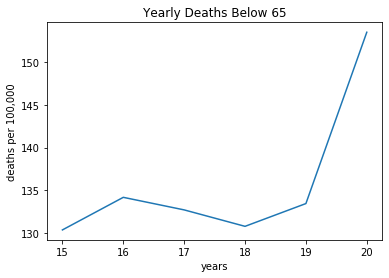

In [60]:
# Deaths from 2015-2020 per age group
overallOPop = overallO / np.sum(popOArr, axis = 0)
overallYPop = overallY / np.sum(popYArr, axis = 0)
years2 = ['15', '16', '17', '18', '19', '20']
plt.title('Yearly Deaths Below 65')
plt.xlabel('years')
plt.ylabel('deaths per 100,000')
plt.plot(years2, overallYPop)
plt.show()

In [61]:
# Excess Deaths calc for low and high age groups
excessDeathsHigh = (death2020High - baselineHigh)/popO
excessDeathsLow = (death2020Low - baselineLow)/popY
excessDeathsMarAprHigh = (marApr2020High - baselineMarAprHigh)/popO
excessDeathsMarAprLow = (marApr2020Low - baselineMarAprLow)/popY
excessDeathsWeekLow = ((weekDeath2020Low - baselineWeekLow).T/popY).T
excessDeathsWeekHigh = ((weekDeath2020High - baselineWeekHigh).T/popO).T

# Excess Deaths over the entire state
sumExcessDeathsHigh = sum(death2020High - baselineHigh)/sum(popO)
sumExcessDeathsLow = sum(death2020Low - baselineLow)/sum(popY)
sumExcessDeathsMarAprHigh = sum(marApr2020High - baselineMarAprHigh)/sum(popO)
sumExcessDeathsMarAprLow = sum(marApr2020Low - baselineMarAprLow)/sum(popY)
sumExcessDeathsWeekLow = sum(weekDeath2020Low - baselineWeekLow)/sum(popY)
sumExcessDeathsWeekHigh = sum(weekDeath2020High - baselineWeekHigh)/sum(popO)

# Dictionary of excess deaths
dictExcessLow = dict(zip(labels, excessDeathsLow))
dictExcessHigh = dict(zip(labels, excessDeathsHigh))
dictExcessMarAprLow = dict(zip(labels, excessDeathsMarAprLow))
dictExcessMarAprHigh = dict(zip(labels, excessDeathsMarAprHigh))

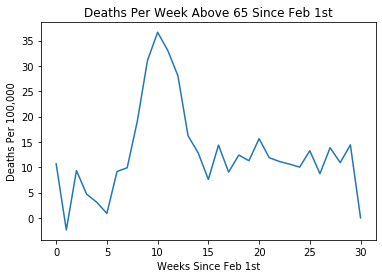

In [62]:
# Expected deaths based on 2015-2019
referenceO = sum(sum(baselineWeekHigh)) / (sum(popO) * 17)

# Weekly Deaths for above 65
plt.plot(sumExcessDeathsWeekHigh, label = 'Excess Above 65')
plt.xlabel('Weeks Since Feb 1st')
plt.ylabel('Deaths Per 100,000')
plt.title('Deaths Per Week Above 65 Since Feb 1st')
plt.show()

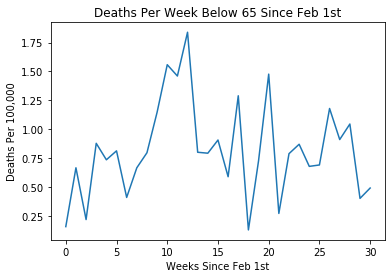

In [63]:
# Expected deaths based on 2015-2019
referenceY = sum(sum(baselineWeekLow)) / (sum(popY) * 17)

# Weekly Deaths for below 65
plt.plot(sumExcessDeathsWeekLow, label = "Excess Below 65")
plt.xlabel('Weeks Since Feb 1st')
plt.ylabel('Deaths Per 100,000')
plt.title('Deaths Per Week Below 65 Since Feb 1st')
plt.show()

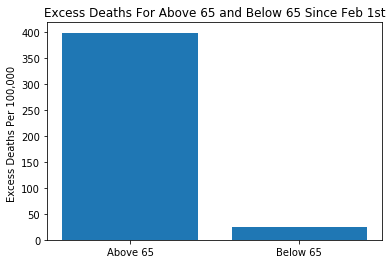

In [64]:
# Excess Deaths by Age Group Since Feb 1st
y_pos = np.arange(2)
plt.bar(y_pos, [sumExcessDeathsHigh, sumExcessDeathsLow], align='center')
plt.xticks(y_pos, ['Above 65', 'Below 65'])
plt.ylabel('Excess Deaths Per 100,000 ')
plt.title('Excess Deaths For Above 65 and Below 65 Since Feb 1st')
plt.show()

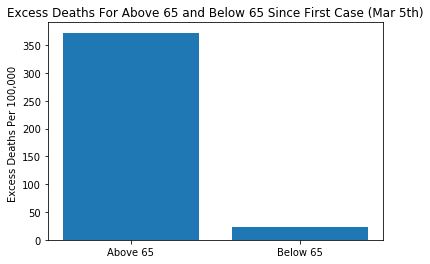

In [65]:
# Excess Deaths by Age Group Since First Case
y_pos = np.arange(2)
plt.bar(y_pos, [sumExcessDeathsMarAprHigh, sumExcessDeathsMarAprLow], align='center')
plt.xticks(y_pos, ['Above 65', 'Below 65'])
plt.ylabel('Excess Deaths Per 100,000 ')
plt.title('Excess Deaths For Above 65 and Below 65 Since First Case (Mar 5th)')
plt.show()

In [66]:
# Age-based All Ages
fullList = youngList + oldList
death2020Age = np.zeros((len(fullList), numCounty))
marApr2020Age = np.zeros((len(fullList), numCounty))
path = 'csv_data/co_deaths_daysum_20 2.csv'
raw = pd.read_csv(path, error_bad_lines=False)
for i in list(labelsDict.keys()) + [8000]:
    for j in fullList:
        raw = raw.append({'fips': i, 'year':'2020', 'dday': 500, 'sexgr': 'Total - Both Sexes', 'racegr': 'All races', 
                     'hispgr': 'All ethnicities', 'agegr': j, 'd': 0, 'mva': 0, 'wrk': 0, 'uod': 0, 'sui': 0,
                     'hom': 0, 'flu': 0, 'pne': 0, 'covid': 0, 'can': 0, 'hd': 0, 'cvd': 0, 'copd': 0, 'diab': 0, 
                     'alz': 0}, ignore_index=True) 

# All sexes, races, eths
raw = raw.loc[raw['sexgr'] == 'Total - Both Sexes']
raw = raw.loc[raw['racegr'] == 'All races']
raw = raw.loc[raw['hispgr'] == 'All ethnicities']
raw = raw[raw.dday != 'Annual total']

# Int conversion
raw['dday'] = raw['dday'].astype(int)
raw['d'] = raw['d'].astype(int)
for i, age in enumerate(fullList):
    # Each age for two time ranges
    rawHigh = raw[raw['agegr'].isin([age])]
    rawHigh = rawHigh[rawHigh['dday'].isin(list(range(32, 253)) + [500])]
    marAprRawHigh = rawHigh[rawHigh['dday'].isin(list(range(66, 253)) + [500])]
    death2020Age[i, :] = (rawHigh.groupby('fips')['d'].sum().values.astype(int)[1:])
    marApr2020Age[i, :] = (marAprRawHigh.groupby('fips')['d'].sum().values.astype(int)[1:])

In [67]:
# Age-based All Ages baselines
baselineDeathAge = np.zeros((len(fullList), numCounty))
baselineMarAprAge = np.zeros((len(fullList), numCounty))
years = ['15', '16', '17', '18', '19']

# Adds 2015-2019 deaths
for year in years:    
    path = 'csv_data/co_deaths_daysum_' + year + '.csv'
    raw = pd.read_csv(path, error_bad_lines=False)
    # Sex and year (no race/eth)
    raw = raw.loc[raw['sexgr'] == 'Total - Both Sexes']
    raw = raw[raw.dday != 'Annual total']
    
    # Convert to int
    raw['dday'] = raw['dday'].astype(int)
    raw['d'] = raw['d'].astype(int)
    
    for i, age in enumerate(fullList):
        # All ages two time ranges
        rawHigh = raw[raw['agegr'].isin([age])]
        rawHigh = rawHigh[rawHigh['dday'].isin(list(range(32, 253)))]
        marAprRawHigh = rawHigh[rawHigh['dday'].isin(list(range(66, 253)))]
        deathHigh = rawHigh.groupby('fips')['d'].sum().values.astype(int)[1:]
        marAprHigh = marAprRawHigh.groupby('fips')['d'].sum().values.astype(int)[1:]
        
        # Adds to baseline
        baselineDeathAge[i, :] += deathHigh
        baselineMarAprAge[i, :] += marAprHigh

# Average all ages death for 2015-2019
baselineDeathAge /= len(years)
baselineMarAprAge /= len(years)

/Users/JayChandra/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
# Excess Deaths All Ages
excessDeathsAll = (death2020Age - baselineDeathAge)/popAll
excessDeathsMarAprAll = (marApr2020Age - baselineMarAprAge)/popAll

# Excess Deaths over the entire state
sumExcessDeathsAll = np.sum(death2020Age - baselineDeathAge, axis = 1)/np.sum(popAll, axis = 1)
sumExcessDeathsMarAprAll = np.sum(marApr2020Age - baselineMarAprAge, axis = 1)/np.sum(popAll, axis = 1)
multiplierAge = np.sum(death2020Age, axis = 1) / np.sum(baselineDeathAge, axis = 1)
multiplierAgeMarApr = np.sum(marApr2020Age, axis = 1) / np.sum(baselineMarAprAge, axis = 1)

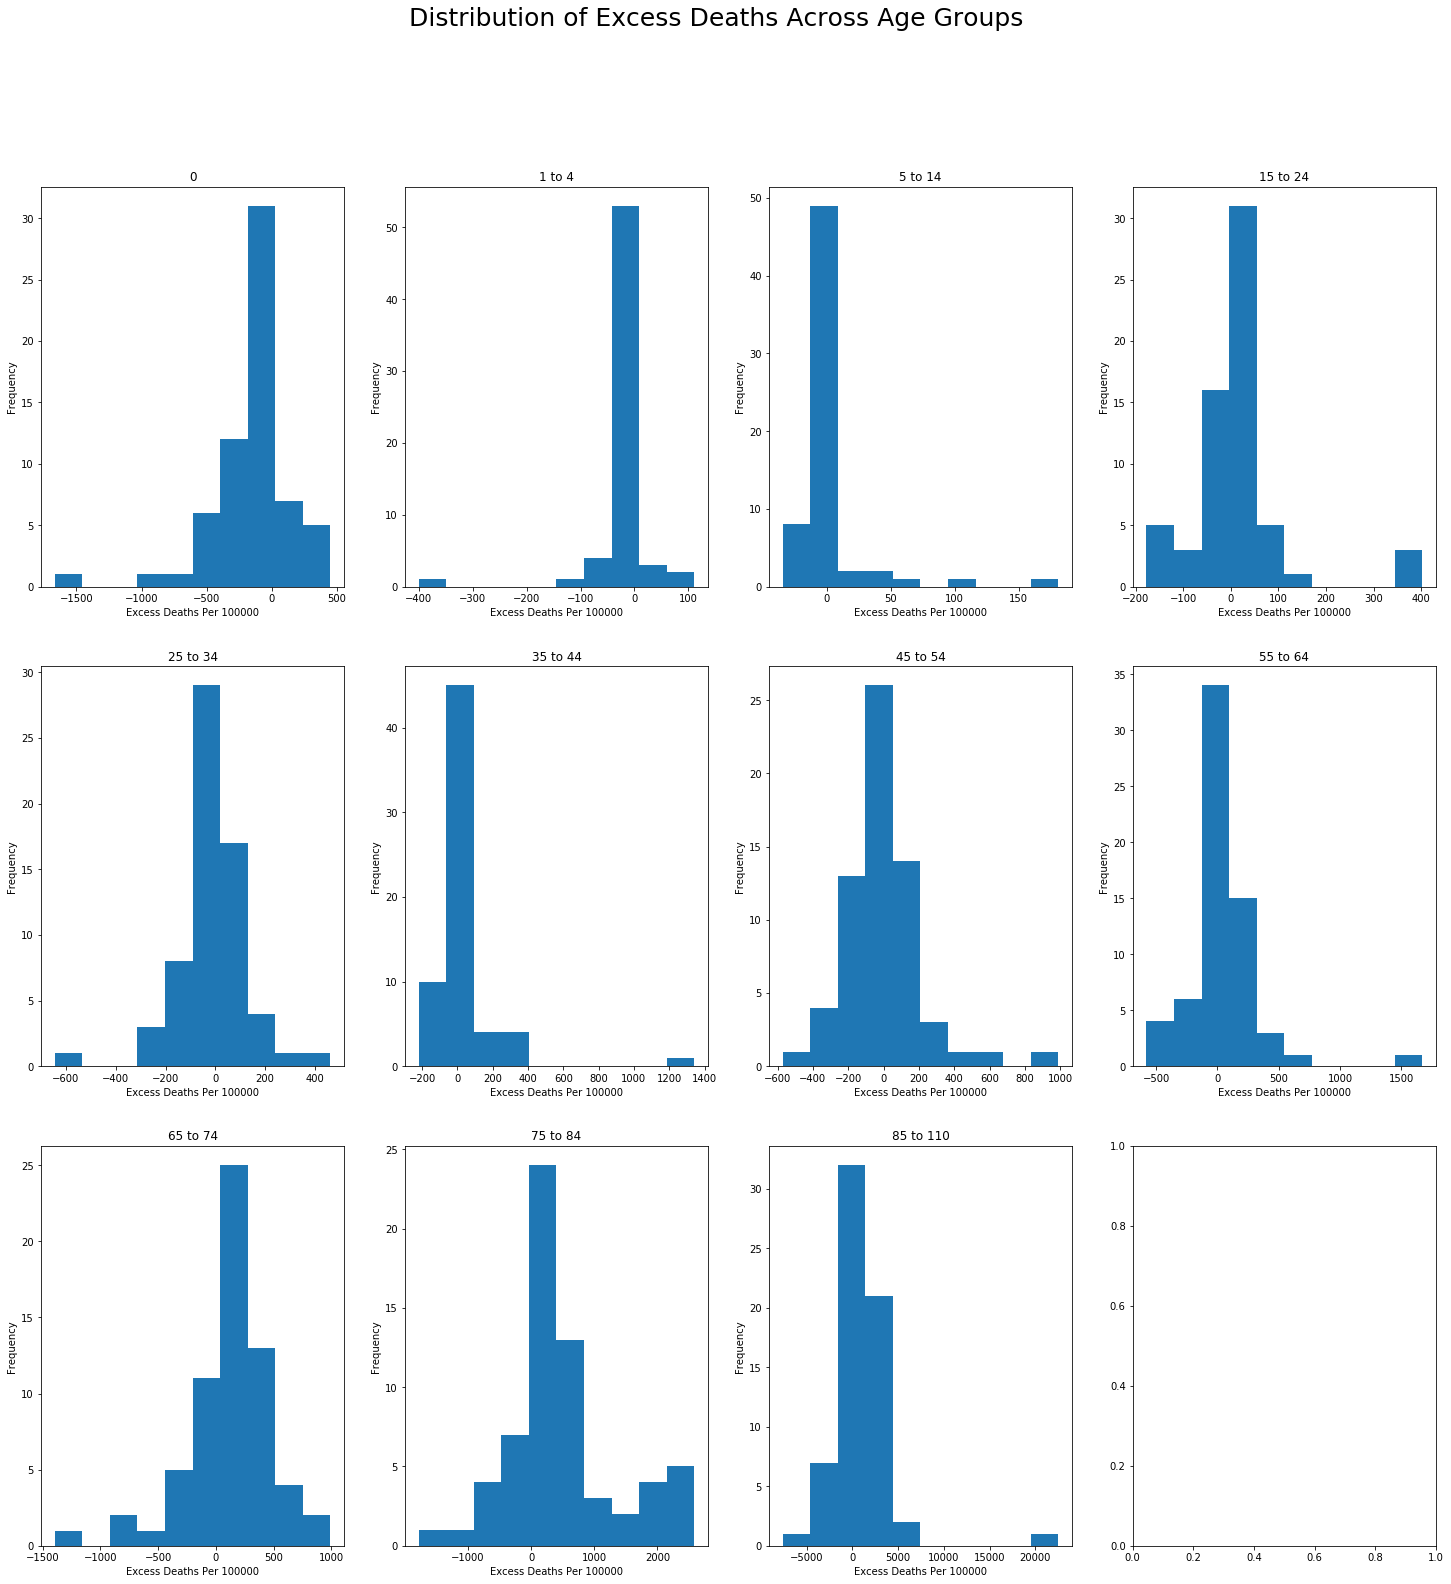

<Figure size 432x288 with 0 Axes>

In [69]:
# Histogram for 64 counties. Histogram per age group
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (25, 25))
index = 0
for row in ax:
    for col in row:
        if index == 11:
            break
        col.hist(excessDeathsMarAprAll[index, :])
        col.set_title(ageUnique[index])
        col.set(xlabel='Excess Deaths Per 100000', ylabel='Frequency')
        index += 1
fig.suptitle("Distribution of Excess Deaths Across Age Groups", fontsize = 25)
plt.show(fig)
plt.savefig('row_col_age.png')

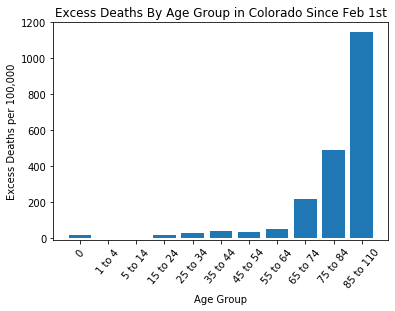

In [70]:
# Excess Deaths by Age Group Since Feb 1st
y_pos = np.arange(len(ageUnique))
ageBar = plt.bar(y_pos, sumExcessDeathsAll, align='center')
plt.xticks(y_pos, ageUnique)
plt.xticks(rotation=50)
plt.ylabel('Excess Deaths per 100,000')
plt.xlabel('Age Group')
plt.title('Excess Deaths By Age Group in Colorado Since Feb 1st')
plt.ylim(-10, 1200)  
plt.show()

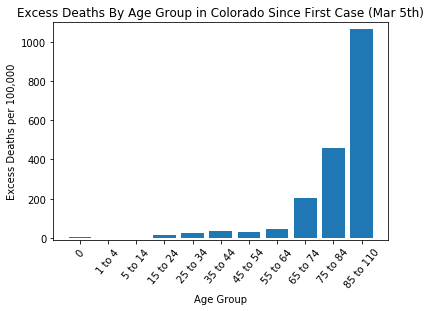

In [71]:
# Excess Deaths Since First Case
y_pos = np.arange(len(ageUnique))
marAprAgeBar = plt.bar(y_pos, sumExcessDeathsMarAprAll, align='center')
plt.xticks(y_pos, ageUnique)
plt.xticks(rotation=50)
plt.ylabel('Excess Deaths per 100,000')
plt.xlabel('Age Group')
plt.title('Excess Deaths By Age Group in Colorado Since First Case (Mar 5th)')
plt.ylim(-10, 1100)
plt.show()

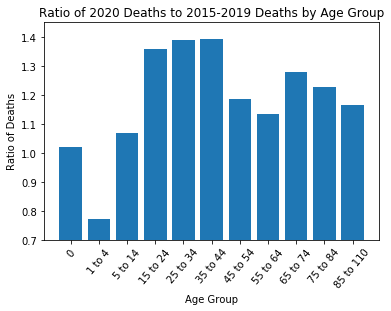

In [72]:
# Ratio of 2020 deaths to 2015 deaths by age group
y_pos = np.arange(len(ageUnique))
marAprAgeBar = plt.bar(y_pos, multiplierAgeMarApr, align='center')
plt.xticks(y_pos, ageUnique)
plt.xticks(rotation=50)
plt.ylabel('Ratio of Deaths')
plt.xlabel('Age Group')
plt.title('Ratio of 2020 Deaths to 2015-2019 Deaths by Age Group')
plt.ylim((0.7, 1.45))
plt.show()

In [73]:
# Export Age based results
AgeStruct= pd.DataFrame.from_dict(dictExcessMarAprLow, orient='index', columns=['MarAprMay 0-65'])
AgeStruct['MarAprMay 65+'] = excessDeathsMarAprHigh
AgeStruct['0-65'] = excessDeathsLow
AgeStruct['65+'] = excessDeathsHigh

writer = pd.ExcelWriter('Excess_Mortality_Age.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
AgeStruct.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

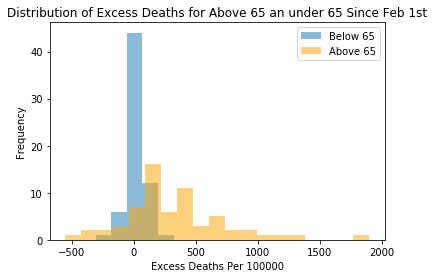

In [74]:
# Histogram of deaths below and obove age 65 for the 64 counties Feb 1
factor = (max(excessDeathsHigh) - min(excessDeathsHigh)) / (max(excessDeathsLow) - min(excessDeathsLow))
bins = 5
plt.hist(excessDeathsLow, bins, alpha=0.5, label='Below 65')
plt.hist(excessDeathsHigh, int(round(bins * factor)), alpha=0.5, label='Above 65', color = 'orange')
plt.title ('Distribution of Excess Deaths for Above 65 an under 65 Since Feb 1st')
plt.xlabel ('Excess Deaths Per 100000')
plt.ylabel ('Frequency')
plt.legend(loc='upper right')
plt.show()

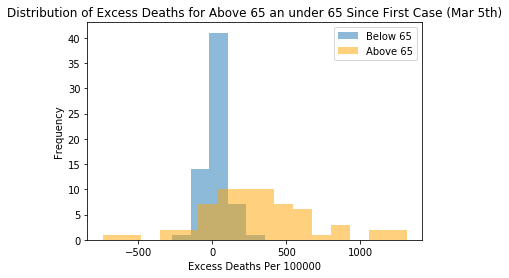

In [75]:
# Histogram of deaths below and obove age 65 for the 64 counties First Case
factor = (max(excessDeathsMarAprHigh) - min(excessDeathsMarAprHigh)) / (max(excessDeathsMarAprLow) - min(excessDeathsMarAprLow))
bins = 5
plt.hist(excessDeathsMarAprLow, bins, alpha=0.5, label='Below 65')
plt.hist(excessDeathsMarAprHigh, int(round(bins * factor)), alpha=0.5, label='Above 65', color = 'orange')
plt.title ('Distribution of Excess Deaths for Above 65 an under 65 Since First Case (Mar 5th)')
plt.xlabel ('Excess Deaths Per 100000')
plt.ylabel ('Frequency')
plt.legend(loc='upper right')
plt.show()

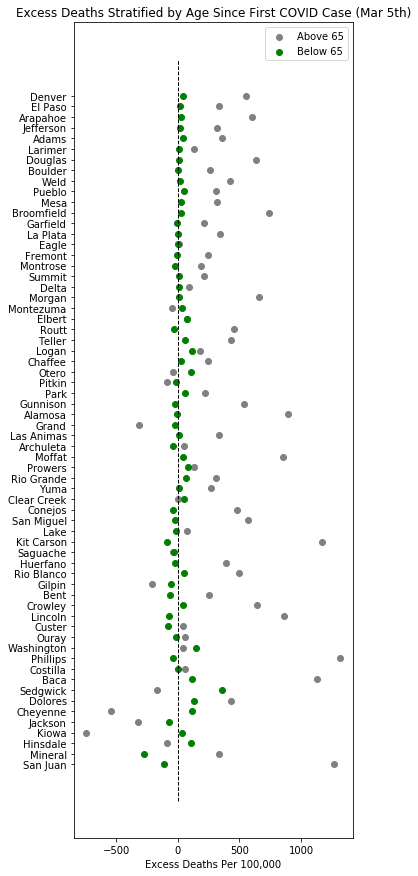

In [76]:
# Dumbell chart for excess deaths by age group in each county
plt.figure(figsize = (5, 15))
dictExcessPopSortAge = dict(zip(labels, tuple(zip(excessDeathsMarAprHigh, excessDeathsMarAprLow, pop))))
sorted_deathsAge = sorted(dictExcessPopSortAge.items(), key=lambda kv: kv[1][2])
x = [i[0] for i in sorted_deathsAge]
y = [j[1][0] for j in sorted_deathsAge]
y2 = [k[1][1] for k in sorted_deathsAge]
plt.scatter(y, x, c= 'grey', label = 'Above 65')
plt.scatter (y2, x, c = 'green', label = 'Below 65')
plt.xlabel('Excess Deaths Per 100,000')
plt.title('Excess Deaths Stratified by Age Since First COVID Case (Mar 5th)')
xmin, xmax, ymin, ymax = plt.axis()
plt.vlines (0, ymin, ymax, linestyle= '--', lw = 1)
plt.legend()
plt.show()

# Sex-Based Results

In [77]:
# Sex-Based
path = 'csv_data/co_deaths_daysum_20 2.csv'
raw = pd.read_csv(path, error_bad_lines=False)

# Ensures that all counties are included in the results
for i in list(labelsDict.keys()) + [8000]:
    raw = raw.append({'fips': i, 'year':'2020', 'dday': 500, 'sexgr': 'Female', 'racegr': 'All races', 
                 'hispgr': 'All ethnicities', 'agegr': 'All Ages', 'd': 0, 'mva': 0, 'wrk': 0, 'uod': 0, 'sui': 0,
                 'hom': 0, 'flu': 0, 'pne': 0, 'covid': 0, 'can': 0, 'hd': 0, 'cvd': 0, 'copd': 0, 'diab': 0, 
                 'alz': 0}, ignore_index=True)
    raw = raw.append({'fips': i, 'year':'2020', 'dday': 500, 'sexgr': 'Male', 'racegr': 'All races', 
                 'hispgr': 'All ethnicities', 'agegr': 'All Ages', 'd': 0, 'mva': 0, 'wrk': 0, 'uod': 0, 'sui': 0,
                 'hom': 0, 'flu': 0, 'pne': 0, 'covid': 0, 'can': 0, 'hd': 0, 'cvd': 0, 'copd': 0, 'diab': 0, 
                 'alz': 0}, ignore_index=True)
    
# Sum rows with all ages, sex, eth
raw = raw.loc[raw['agegr'] == 'All Ages']
raw = raw[raw.dday != 'Annual total']
raw = raw[raw.sexgr != 'Total - Both Sexes']
raw = raw.loc[raw['racegr'] == 'All races']
raw = raw.loc[raw['hispgr'] == 'All ethnicities']

# Male and Female Deaths 2020 First Case and Feb 1st
raw['dday'] = raw['dday'].astype(int)
raw['d'] = raw['d'].astype(int)
rawMale = raw[raw['sexgr'] == 'Male']
rawFe = raw[raw['sexgr'] == 'Female']
rawMale = rawMale[rawMale['dday'].isin(list(range(32, 253)) + [500])]
rawFe = rawFe[rawFe['dday'].isin(list(range(32, 253)) + [500])]
marAprRawMale = rawMale[rawMale['dday'].isin(list(range(66, 253)) + [500])]
marAprRawFe = rawFe[rawFe['dday'].isin(list(range(66, 253)) + [500])]
death2020Male = rawMale.groupby('fips')['d'].sum().values.astype(int)[1:]
death2020Fe = rawFe.groupby('fips')['d'].sum().values.astype(int)[1:]
marApr2020Male = marAprRawMale.groupby('fips')['d'].sum().values.astype(int)[1:]
marApr2020Fe = marAprRawFe.groupby('fips')['d'].sum().values.astype(int)[1:]

# Weekly Deaths 2020 Female and Male
weekDeath2020Male = np.zeros((numCounty, 31))
weekDeath2020Fe = np.zeros((numCounty, 31))
for i in range (31):
    raw2Male = rawMale[rawMale['dday'].isin(list(range((32 + (i*7)), (32 + ((i+1)*7)))) + [500])]
    raw2Fe = rawFe[rawFe['dday'].isin(list(range((32 + (i*7)), (32 + ((i+1)*7)))) + [500])]
    weekDeath2020Male [:, i] = raw2Male.groupby('fips')['d'].sum().values.astype(int)[1:]
    weekDeath2020Fe[:, i] = raw2Fe.groupby('fips')['d'].sum().values.astype(int)[1:]

In [78]:
# Sex-Based Baseline Deaths
baselineMale = np.zeros(numCounty)
baselineFe = np.zeros(numCounty)
baselineMarAprMale = np.zeros(numCounty)
baselineMarAprFe = np.zeros(numCounty)
baselineWeekMale = np.zeros((numCounty, 31))
baselineWeekFe = np.zeros((numCounty, 31))
overallM = []
overallF = []
years = ['15', '16', '17', '18', '19']
for year in years:    
    path = 'csv_data/co_deaths_daysum_' + year + '.csv'
    raw = pd.read_csv(path, error_bad_lines=False)
    # All Ages and not both sex
    raw = raw.loc[raw['agegr'] == 'All Ages']
    raw = raw[raw.dday != 'Annual total']
    raw = raw[raw.sexgr != 'Total - Both Sexes']
    # Int for important data
    raw['dday'] = raw['dday'].astype(int)
    raw['d'] = raw['d'].astype(int)
    
    # Male and Female Deaths for 2015-2019 First Case and Feb 1st
    rawMale = raw[raw['sexgr'] == 'Male']
    rawFe = raw[raw['sexgr'] == 'Female']
    rawMale = rawMale[rawMale['dday'].isin(list(range(32, 253)))]
    rawFe = rawFe[rawFe['dday'].isin(list(range(32, 253)))]
    marAprRawMale = rawMale[rawMale['dday'].isin(list(range(66, 253)))]
    marAprRawFe = rawFe[rawFe['dday'].isin(list(range(66, 253)))]
    deathMale = rawMale.groupby('fips')['d'].sum().values.astype(int)[1:]
    deathFe = rawFe.groupby('fips')['d'].sum().values.astype(int)[1:]
    marAprMale = marAprRawMale.groupby('fips')['d'].sum().values.astype(int)[1:]
    marAprFe = marAprRawFe.groupby('fips')['d'].sum().values.astype(int)[1:]
    
    # Yearly Male and Female
    overallM.append(sum(deathMale))
    overallF.append(sum(deathFe))
    
    # Weekly Deaths Male and Female
    weekDeathMale = np.zeros((numCounty, 31))
    weekDeathFe = np.zeros((numCounty, 31))
    for i in range (31):
        raw2Male = rawMale[rawMale['dday'].isin(list(range((32 + (i*7)), (32 + ((i+1)*7)))))]
        raw2Fe = rawFe[rawFe['dday'].isin(list(range((32 + (i*7)), (32 + ((i+1)*7)))))]
        weekDeathMale [:, i] = raw2Male.groupby('fips')['d'].sum().values.astype(int)[1:]
        weekDeathFe[:, i] = raw2Fe.groupby('fips')['d'].sum().values.astype(int)[1:]
    
    # Adding to baseline deaths
    baselineMale += deathMale
    baselineFe += deathFe
    baselineMarAprMale += marAprMale
    baselineMarAprFe += marAprFe
    baselineWeekMale += weekDeathMale
    baselineWeekFe += weekDeathFe
    
# Expected Deaths
baselineMale/= len(years)
baselineFe /= len(years)
baselineMarAprMale /= len(years)
baselineMarAprFe /= len(years)
baselineWeekMale /= len(years)
baselineWeekFe /= len(years)

# Add 2020 deaths male female
overallM.append(sum(death2020Male))
overallF.append(sum(death2020Fe))

In [79]:
# Excess Deaths Calculation
excessDeathsMale = (death2020Male - baselineMale)/popM
excessDeathsFe = (death2020Fe - baselineFe)/popF
excessDeathsMarAprMale = (marApr2020Male - baselineMarAprMale)/popM
excessDeathsMarAprFe = (marApr2020Fe - baselineMarAprFe)/popF
excessDeathWeekMale = ((weekDeath2020Male - baselineWeekMale).T/popM).T
excessDeathWeekFe = ((weekDeath2020Fe - baselineWeekFe).T/popF).T

# Over the entire state
sumExcessDeathsMale = sum(death2020Male - baselineMale)/sum(popM)
sumExcessDeathsFe = sum(death2020Fe - baselineFe)/sum(popF)
sumExcessDeathsMarAprMale = sum(marApr2020Male - baselineMarAprMale)/sum(popM)
sumExcessDeathsMarAprFe = sum(marApr2020Fe - baselineMarAprFe)/sum(popF)
sumExcessDeathsWeekMale = sum(weekDeath2020Male - baselineWeekFe)/sum(popM)
sumExcessDeathsWeekFe = sum(weekDeath2020Fe - baselineWeekFe)/sum(popF)

dictExcessMale = dict(zip(labels, excessDeathsMale))
dictExcessFe = dict(zip(labels, excessDeathsFe))
dictExcessMarAprMale = dict(zip(labels, excessDeathsMarAprMale))
dictExcessMarAprFe = dict(zip(labels, excessDeathsMarAprFe))

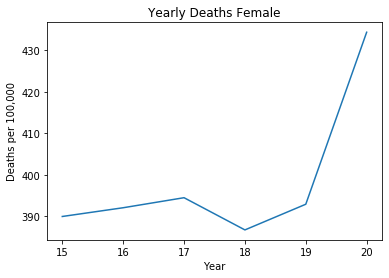

In [80]:
# Year by Year Deaths Either Male or Female Plot
overallFPop = overallF / np.sum(popFeArr, axis = 0)
overallMPop = overallM / np.sum(popMaleArr, axis = 0)
years2 = ['15', '16', '17', '18', '19', '20']
plt.title('Yearly Deaths Female')
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000')
plt.plot(years2, overallFPop)
plt.show()

In [81]:
# Export Male and Female Deaths
SexStruct= pd.DataFrame.from_dict(dictExcessMarAprMale, orient='index', columns=['MarApr Male'])
SexStruct['MarApr Female'] = excessDeathsMarAprFe
SexStruct['Male'] = excessDeathsMale
SexStruct['Female'] = excessDeathsFe


writer = pd.ExcelWriter('Excess_Mortality_Sex.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
SexStruct.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

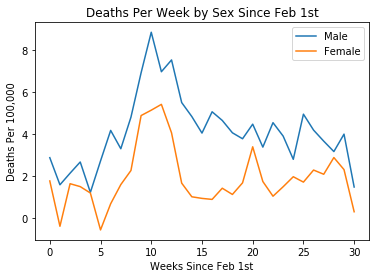

In [82]:
# Baseline Deaths per week for male and female
referenceMale = sum(sum(baselineWeekMale)) / (sum(popM) * 25)
referenceFe = sum(sum(baselineWeekFe)) / (sum(popF) * 25)

# Plot of Weekly Excess Deaths by Sex
plt.plot(sumExcessDeathsWeekMale, label = "Male")
plt.plot(sumExcessDeathsWeekFe, label = "Female")
plt.xlabel('Weeks Since Feb 1st')
plt.ylabel('Deaths Per 100,000')
plt.title('Deaths Per Week by Sex Since Feb 1st')
plt.legend()
plt.show()

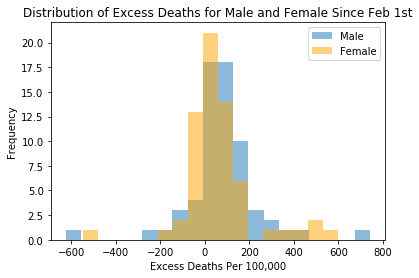

In [83]:
# Histogram (64 counties) of Deaths Since Feb 1st Male and Female
factor = (max(excessDeathsFe) - min(excessDeathsFe)) / (max(excessDeathsMale) - min(excessDeathsMale))
bins = 20
plt.hist(excessDeathsMale, bins, alpha=0.5, label='Male')
plt.hist(excessDeathsFe, int(round(bins * factor)), alpha=0.5, label='Female', color = 'orange')
plt.title ('Distribution of Excess Deaths for Male and Female Since Feb 1st')
plt.xlabel ('Excess Deaths Per 100,000')
plt.ylabel ('Frequency')
plt.legend(loc='upper right')
plt.show()

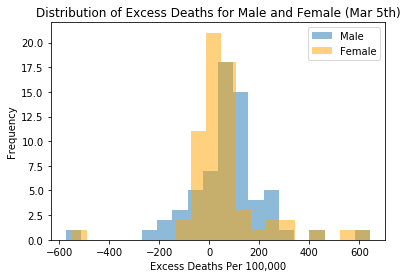

In [84]:
# Histogram (64 counties) of Deaths Since First Case Male and Female
factor = (max(excessDeathsMarAprFe) - min(excessDeathsMarAprFe)) / (max(excessDeathsMarAprMale) - min(excessDeathsMarAprMale))
bins = 20
plt.hist(excessDeathsMarAprMale, bins, alpha=0.5, label='Male')
plt.hist(excessDeathsMarAprFe, int(round(bins * factor)), alpha=0.5, label='Female', color = 'orange')
plt.title ('Distribution of Excess Deaths for Male and Female (Mar 5th)')
plt.xlabel ('Excess Deaths Per 100,000')
plt.ylabel ('Frequency')
plt.legend(loc='upper right')
plt.show()

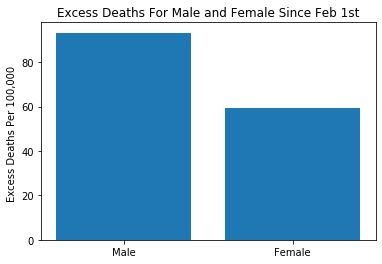

In [85]:
# Comparison of Male and Female Deaths in the State Since Feb 1st
y_pos = np.arange(2)
plt.bar(y_pos, [sumExcessDeathsMale, sumExcessDeathsFe], align='center')
plt.xticks(y_pos, ['Male', 'Female'])
plt.ylabel('Excess Deaths Per 100,000 ')
plt.title('Excess Deaths For Male and Female Since Feb 1st')
plt.show()

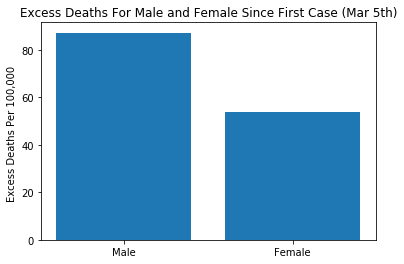

In [86]:
# Comparison of Male and Female Deaths in the State Since Mar 5th
y_pos = np.arange(2)
plt.bar(y_pos, [sumExcessDeathsMarAprMale, sumExcessDeathsMarAprFe], align='center')
plt.xticks(y_pos, ['Male', 'Female'])
plt.ylabel('Excess Deaths Per 100,000 ')
plt.title('Excess Deaths For Male and Female Since First Case (Mar 5th)')
plt.show()

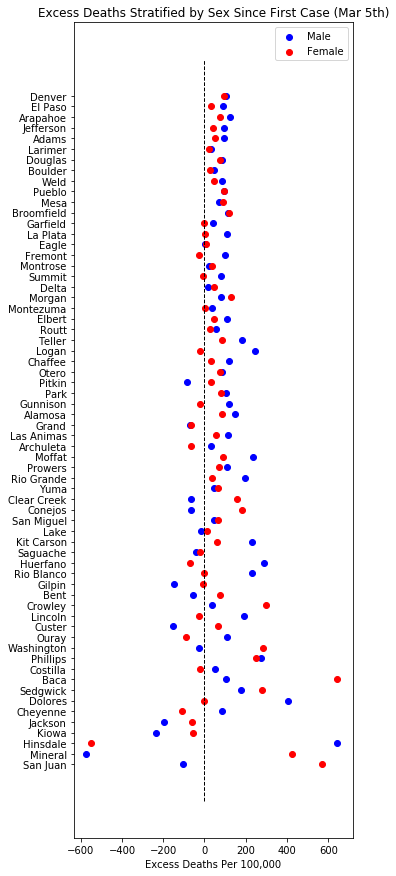

In [87]:
# Dumbell chart for Excess Deaths by Sex for all Colorado Counties
plt.figure(figsize = (5, 15))
dictExcessPopSort = dict(zip(labels, tuple(zip(excessDeathsMarAprMale, excessDeathsMarAprFe, pop))))
sorted_deathsSex = sorted(dictExcessPopSort.items(), key=lambda kv: kv[1][2])
x = [i[0] for i in sorted_deathsSex]
y = [j[1][0] for j in sorted_deathsSex]
y2 = [k[1][1] for k in sorted_deathsSex]
plt.scatter(y, x, c= 'b', label = 'Male')
plt.scatter (y2, x, c = 'r', label = 'Female')
plt.xlabel('Excess Deaths Per 100,000')
plt.title('Excess Deaths Stratified by Sex Since First Case (Mar 5th)')
xmin, xmax, ymin, ymax = plt.axis()
plt.vlines (0, ymin, ymax, linestyle= '--', lw = 1)
plt.legend()
plt.show()